# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpnfovkpmk


[d3graph] INFO> Writing /local/scratch/tmp/tmpnfovkpmk/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
"fibroblast",
"endothelial cell",
"myofibroblast cell",
"glial cell",
"pericyte",
"lymphocyte",
"stromal cell",
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 23061 × 70116
    obs: 'biosample_id', 'n_genes', 'n_counts', 'Type', 'donor_id', 'Layer', 'Celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'age group', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'cell_culture'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbo

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']
adata = adata[adata.obs.disease=="normal"]
adata.obs.cell_type.value_counts()

cell_type
fibroblast            3480
endothelial cell       792
myofibroblast cell     690
glial cell             379
pericyte               250
lymphocyte             228
stromal cell            33
Name: count, dtype: int64


  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [00:02<01:26,  2.77s/it]


  6%|▋         | 2/32 [00:03<00:51,  1.70s/it]


  9%|▉         | 3/32 [00:04<00:39,  1.36s/it]


 12%|█▎        | 4/32 [00:05<00:32,  1.17s/it]


 16%|█▌        | 5/32 [00:06<00:30,  1.14s/it]


 19%|█▉        | 6/32 [00:07<00:27,  1.07s/it]


 22%|██▏       | 7/32 [00:08<00:25,  1.01s/it]


 25%|██▌       | 8/32 [00:09<00:24,  1.02s/it]


 28%|██▊       | 9/32 [00:10<00:22,  1.02it/s]


 31%|███▏      | 10/32 [00:11<00:21,  1.01it/s]


 34%|███▍      | 11/32 [00:13<00:26,  1.26s/it]


 38%|███▊      | 12/32 [00:15<00:33,  1.69s/it]


 41%|████      | 13/32 [00:16<00:27,  1.46s/it]


 44%|████▍     | 14/32 [00:17<00:23,  1.30s/it]


 47%|████▋     | 15/32 [00:18<00:19,  1.16s/it]


 50%|█████     | 16/32 [00:19<00:17,  1.08s/it]


 53%|█████▎    | 17/32 [00:20<00:16,  1.07s/it]


 56%|█████▋    | 18/32 [00:21<00:14,  1.02s/it]


 59%|█████▉    | 19/32 [00:22<00:14,  1.14s/it]


 62%|██████▎   | 20/32 [00:23<00:12,  1.07s/it]


 66%|██████▌   | 21/32 [00:24<00:11,  1.02s/it]


 69%|██████▉   | 22/32 [00:25<00:09,  1.01it/s]


 72%|███████▏  | 23/32 [00:26<00:08,  1.05it/s]


 75%|███████▌  | 24/32 [00:27<00:07,  1.06it/s]


 78%|███████▊  | 25/32 [00:28<00:06,  1.07it/s]


 81%|████████▏ | 26/32 [00:29<00:05,  1.08it/s]


 84%|████████▍ | 27/32 [00:30<00:04,  1.09it/s]


 88%|████████▊ | 28/32 [00:31<00:03,  1.09it/s]


 91%|█████████ | 29/32 [00:31<00:02,  1.11it/s]


 94%|█████████▍| 30/32 [00:32<00:01,  1.14it/s]


 97%|█████████▋| 31/32 [00:33<00:00,  1.14it/s]


100%|██████████| 32/32 [00:34<00:00,  1.15it/s]


100%|██████████| 32/32 [00:34<00:00,  1.08s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


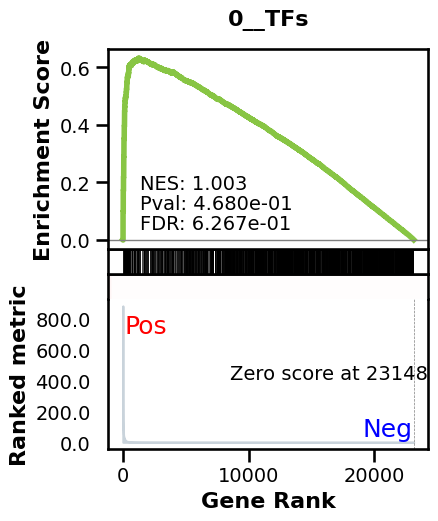

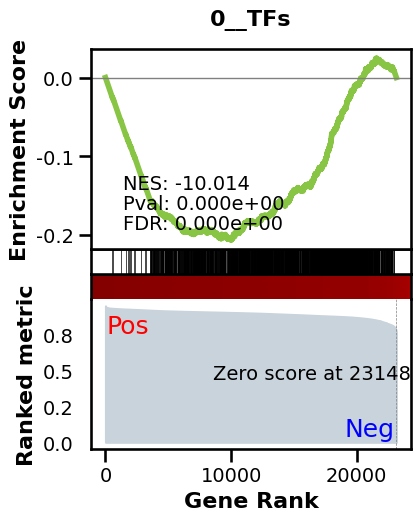

_________________________________________
TF specific enrichment


found some significant results for  44.642857142857146 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:42,  3.00it/s]


  2%|▏         | 2/128 [00:00<00:43,  2.87it/s]


  2%|▏         | 3/128 [00:01<00:45,  2.76it/s]


  3%|▎         | 4/128 [00:01<00:44,  2.77it/s]


  4%|▍         | 5/128 [00:01<00:43,  2.83it/s]


  5%|▍         | 6/128 [00:02<00:42,  2.86it/s]


  5%|▌         | 7/128 [00:02<00:42,  2.84it/s]


  6%|▋         | 8/128 [00:02<00:43,  2.78it/s]


  7%|▋         | 9/128 [00:03<00:43,  2.77it/s]


  8%|▊         | 10/128 [00:03<00:42,  2.80it/s]


  9%|▊         | 11/128 [00:03<00:40,  2.88it/s]


  9%|▉         | 12/128 [00:04<00:40,  2.89it/s]


 10%|█         | 13/128 [00:04<00:40,  2.83it/s]


 11%|█         | 14/128 [00:04<00:40,  2.79it/s]


 12%|█▏        | 15/128 [00:05<00:41,  2.74it/s]


 12%|█▎        | 16/128 [00:05<00:39,  2.82it/s]


 13%|█▎        | 17/128 [00:06<00:38,  2.85it/s]


 14%|█▍        | 18/128 [00:06<00:38,  2.84it/s]


 15%|█▍        | 19/128 [00:06<00:38,  2.83it/s]


 16%|█▌        | 20/128 [00:07<00:38,  2.79it/s]


 16%|█▋        | 21/128 [00:07<00:37,  2.82it/s]


 17%|█▋        | 22/128 [00:07<00:39,  2.65it/s]


 18%|█▊        | 23/128 [00:08<00:38,  2.72it/s]


 19%|█▉        | 24/128 [00:08<00:38,  2.72it/s]


 20%|█▉        | 25/128 [00:08<00:37,  2.75it/s]


 20%|██        | 26/128 [00:09<00:36,  2.79it/s]


 21%|██        | 27/128 [00:09<00:35,  2.83it/s]


 22%|██▏       | 28/128 [00:09<00:34,  2.86it/s]


 23%|██▎       | 29/128 [00:10<00:34,  2.83it/s]


 23%|██▎       | 30/128 [00:10<00:34,  2.81it/s]


 24%|██▍       | 31/128 [00:11<00:34,  2.82it/s]


 25%|██▌       | 32/128 [00:11<00:33,  2.88it/s]


 26%|██▌       | 33/128 [00:11<00:32,  2.89it/s]


 27%|██▋       | 34/128 [00:12<00:32,  2.87it/s]


 27%|██▋       | 35/128 [00:12<00:32,  2.88it/s]


 28%|██▊       | 36/128 [00:12<00:31,  2.88it/s]


 29%|██▉       | 37/128 [00:13<00:31,  2.89it/s]


 30%|██▉       | 38/128 [00:13<00:31,  2.87it/s]


 30%|███       | 39/128 [00:13<00:31,  2.87it/s]


 31%|███▏      | 40/128 [00:14<00:30,  2.91it/s]


 32%|███▏      | 41/128 [00:14<00:30,  2.89it/s]


 33%|███▎      | 42/128 [00:14<00:29,  2.91it/s]


 34%|███▎      | 43/128 [00:15<00:29,  2.89it/s]


 34%|███▍      | 44/128 [00:15<00:29,  2.85it/s]


 35%|███▌      | 45/128 [00:15<00:29,  2.86it/s]


 36%|███▌      | 46/128 [00:16<00:28,  2.86it/s]


 37%|███▋      | 47/128 [00:16<00:28,  2.87it/s]


 38%|███▊      | 48/128 [00:16<00:27,  2.88it/s]


 38%|███▊      | 49/128 [00:17<00:27,  2.84it/s]


 39%|███▉      | 50/128 [00:17<00:27,  2.87it/s]


 40%|███▉      | 51/128 [00:17<00:27,  2.85it/s]


 41%|████      | 52/128 [00:18<00:26,  2.88it/s]


 41%|████▏     | 53/128 [00:18<00:26,  2.88it/s]


 42%|████▏     | 54/128 [00:19<00:25,  2.93it/s]


 43%|████▎     | 55/128 [00:19<00:24,  2.93it/s]


 44%|████▍     | 56/128 [00:19<00:24,  2.97it/s]


 45%|████▍     | 57/128 [00:19<00:23,  3.03it/s]


 45%|████▌     | 58/128 [00:20<00:23,  3.04it/s]


 46%|████▌     | 59/128 [00:20<00:23,  2.98it/s]


 47%|████▋     | 60/128 [00:20<00:22,  3.03it/s]


 48%|████▊     | 61/128 [00:21<00:22,  3.01it/s]


 48%|████▊     | 62/128 [00:21<00:21,  3.06it/s]


 49%|████▉     | 63/128 [00:21<00:21,  3.06it/s]


 50%|█████     | 64/128 [00:22<00:20,  3.05it/s]


 51%|█████     | 65/128 [00:22<00:20,  3.03it/s]


 52%|█████▏    | 66/128 [00:22<00:20,  3.04it/s]


 52%|█████▏    | 67/128 [00:23<00:19,  3.08it/s]


 53%|█████▎    | 68/128 [00:23<00:19,  3.09it/s]


 54%|█████▍    | 69/128 [00:23<00:19,  3.09it/s]


 55%|█████▍    | 70/128 [00:24<00:18,  3.05it/s]


 55%|█████▌    | 71/128 [00:24<00:18,  3.08it/s]


 56%|█████▋    | 72/128 [00:24<00:18,  3.07it/s]


 57%|█████▋    | 73/128 [00:25<00:17,  3.10it/s]


 58%|█████▊    | 74/128 [00:25<00:17,  3.10it/s]


 59%|█████▊    | 75/128 [00:25<00:17,  3.11it/s]


 59%|█████▉    | 76/128 [00:26<00:16,  3.08it/s]


 60%|██████    | 77/128 [00:26<00:16,  3.05it/s]


 61%|██████    | 78/128 [00:26<00:16,  3.07it/s]


 62%|██████▏   | 79/128 [00:27<00:15,  3.11it/s]


 62%|██████▎   | 80/128 [00:27<00:15,  3.13it/s]


 63%|██████▎   | 81/128 [00:27<00:15,  3.10it/s]


 64%|██████▍   | 82/128 [00:28<00:15,  3.06it/s]


 65%|██████▍   | 83/128 [00:28<00:14,  3.03it/s]


 66%|██████▌   | 84/128 [00:28<00:14,  3.10it/s]


 66%|██████▋   | 85/128 [00:29<00:13,  3.09it/s]


 67%|██████▋   | 86/128 [00:29<00:13,  3.07it/s]


 68%|██████▊   | 87/128 [00:29<00:13,  3.08it/s]


 69%|██████▉   | 88/128 [00:30<00:13,  3.05it/s]


 70%|██████▉   | 89/128 [00:30<00:12,  3.06it/s]


 70%|███████   | 90/128 [00:30<00:12,  3.11it/s]


 71%|███████   | 91/128 [00:31<00:11,  3.11it/s]


 72%|███████▏  | 92/128 [00:31<00:11,  3.13it/s]


 73%|███████▎  | 93/128 [00:31<00:11,  3.06it/s]


 73%|███████▎  | 94/128 [00:32<00:11,  3.08it/s]


 74%|███████▍  | 95/128 [00:32<00:10,  3.11it/s]


 75%|███████▌  | 96/128 [00:32<00:10,  3.15it/s]


 76%|███████▌  | 97/128 [00:32<00:09,  3.15it/s]


 77%|███████▋  | 98/128 [00:33<00:09,  3.12it/s]


 77%|███████▋  | 99/128 [00:33<00:09,  3.08it/s]


 78%|███████▊  | 100/128 [00:33<00:09,  3.10it/s]


 79%|███████▉  | 101/128 [00:34<00:08,  3.16it/s]


 80%|███████▉  | 102/128 [00:34<00:08,  3.19it/s]


 80%|████████  | 103/128 [00:34<00:07,  3.18it/s]


 81%|████████▏ | 104/128 [00:35<00:07,  3.14it/s]


 82%|████████▏ | 105/128 [00:35<00:07,  3.12it/s]


 83%|████████▎ | 106/128 [00:35<00:06,  3.17it/s]


 84%|████████▎ | 107/128 [00:36<00:06,  3.19it/s]


 84%|████████▍ | 108/128 [00:36<00:06,  3.16it/s]


 85%|████████▌ | 109/128 [00:36<00:06,  3.16it/s]


 86%|████████▌ | 110/128 [00:37<00:05,  3.15it/s]


 87%|████████▋ | 111/128 [00:37<00:05,  3.15it/s]


 88%|████████▊ | 112/128 [00:37<00:05,  3.14it/s]


 88%|████████▊ | 113/128 [00:38<00:04,  3.10it/s]


 89%|████████▉ | 114/128 [00:38<00:04,  3.11it/s]


 90%|████████▉ | 115/128 [00:38<00:04,  3.08it/s]


 91%|█████████ | 116/128 [00:39<00:03,  3.11it/s]


 91%|█████████▏| 117/128 [00:39<00:03,  3.12it/s]


 92%|█████████▏| 118/128 [00:39<00:03,  3.12it/s]


 93%|█████████▎| 119/128 [00:39<00:02,  3.12it/s]


 94%|█████████▍| 120/128 [00:40<00:02,  3.12it/s]


 95%|█████████▍| 121/128 [00:40<00:02,  3.15it/s]


 95%|█████████▌| 122/128 [00:40<00:01,  3.03it/s]


 96%|█████████▌| 123/128 [00:41<00:01,  2.92it/s]


 97%|█████████▋| 124/128 [00:41<00:01,  2.88it/s]


 98%|█████████▊| 125/128 [00:42<00:01,  2.92it/s]


 98%|█████████▊| 126/128 [00:42<00:00,  2.98it/s]


 99%|█████████▉| 127/128 [00:42<00:00,  2.96it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:43<00:00,  2.88it/s]


100%|██████████| 128/128 [00:43<00:00,  2.97it/s]

Average Precision (AP):  0.0006553132539019206
Area Under Precision-Recall Curve (AUPRC):  0.0006551670063546767


EPR: 1.1056448976975124


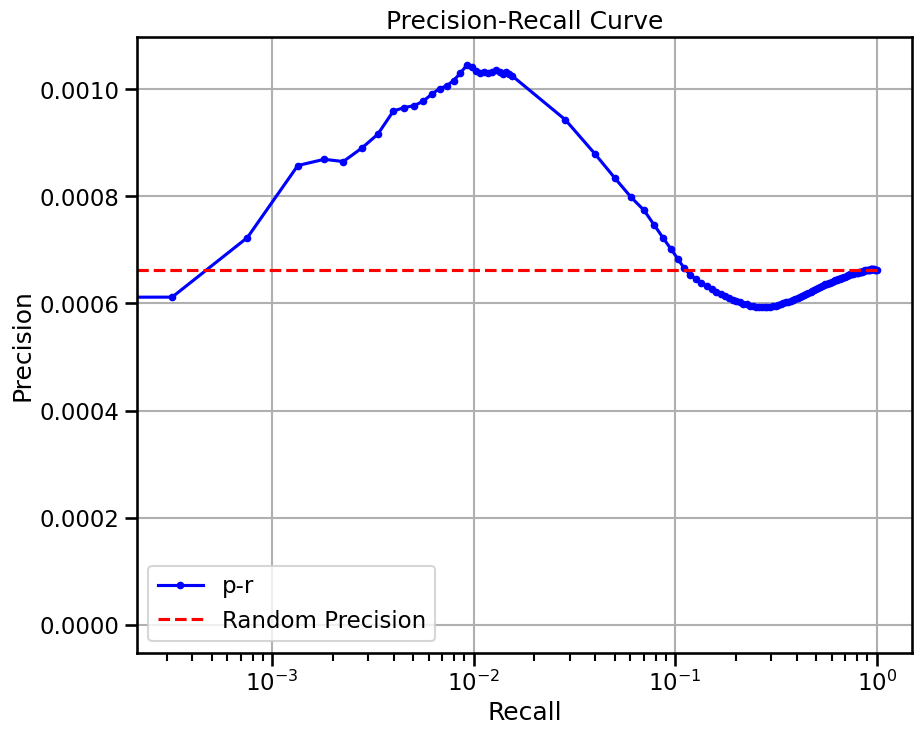


  0%|          | 0/64 [00:00<?, ?it/s]


  2%|▏         | 1/64 [00:02<02:56,  2.80s/it]


  3%|▎         | 2/64 [00:04<01:59,  1.92s/it]


  5%|▍         | 3/64 [00:05<01:40,  1.65s/it]


  6%|▋         | 4/64 [00:06<01:33,  1.56s/it]


  8%|▊         | 5/64 [00:08<01:25,  1.45s/it]


  9%|▉         | 6/64 [00:09<01:19,  1.37s/it]


 11%|█         | 7/64 [00:10<01:15,  1.32s/it]


 12%|█▎        | 8/64 [00:11<01:12,  1.29s/it]


 14%|█▍        | 9/64 [00:12<01:08,  1.25s/it]


 16%|█▌        | 10/64 [00:14<01:05,  1.22s/it]


 17%|█▋        | 11/64 [00:15<01:04,  1.21s/it]


 19%|█▉        | 12/64 [00:16<01:02,  1.21s/it]


 20%|██        | 13/64 [00:17<01:00,  1.18s/it]


 22%|██▏       | 14/64 [00:18<00:58,  1.17s/it]


 23%|██▎       | 15/64 [00:19<00:57,  1.17s/it]


 25%|██▌       | 16/64 [00:21<00:55,  1.16s/it]


 27%|██▋       | 17/64 [00:22<00:54,  1.16s/it]


 28%|██▊       | 18/64 [00:23<00:52,  1.15s/it]


 30%|██▉       | 19/64 [00:25<01:04,  1.42s/it]


 31%|███▏      | 20/64 [00:26<01:03,  1.44s/it]


 33%|███▎      | 21/64 [00:28<00:59,  1.38s/it]


 34%|███▍      | 22/64 [00:29<00:55,  1.33s/it]


 36%|███▌      | 23/64 [00:30<00:54,  1.32s/it]


 38%|███▊      | 24/64 [00:31<00:50,  1.27s/it]


 39%|███▉      | 25/64 [00:33<00:52,  1.35s/it]


 41%|████      | 26/64 [00:34<00:51,  1.35s/it]


 42%|████▏     | 27/64 [00:36<00:51,  1.39s/it]


 44%|████▍     | 28/64 [00:37<00:51,  1.42s/it]


 45%|████▌     | 29/64 [00:40<01:03,  1.82s/it]


 47%|████▋     | 30/64 [00:41<00:57,  1.68s/it]


 48%|████▊     | 31/64 [00:43<00:51,  1.56s/it]


 50%|█████     | 32/64 [00:44<00:46,  1.46s/it]


 52%|█████▏    | 33/64 [00:45<00:43,  1.40s/it]


 53%|█████▎    | 34/64 [00:46<00:40,  1.36s/it]


 55%|█████▍    | 35/64 [00:48<00:38,  1.34s/it]


 56%|█████▋    | 36/64 [00:49<00:37,  1.35s/it]


 58%|█████▊    | 37/64 [00:50<00:36,  1.34s/it]


 59%|█████▉    | 38/64 [00:52<00:34,  1.31s/it]


 61%|██████    | 39/64 [00:53<00:32,  1.32s/it]


 62%|██████▎   | 40/64 [00:54<00:31,  1.33s/it]


 64%|██████▍   | 41/64 [00:55<00:29,  1.28s/it]


 66%|██████▌   | 42/64 [00:57<00:28,  1.28s/it]


 67%|██████▋   | 43/64 [00:58<00:26,  1.25s/it]


 69%|██████▉   | 44/64 [00:59<00:25,  1.25s/it]


 70%|███████   | 45/64 [01:00<00:24,  1.27s/it]


 72%|███████▏  | 46/64 [01:02<00:22,  1.24s/it]


 73%|███████▎  | 47/64 [01:03<00:21,  1.28s/it]


 75%|███████▌  | 48/64 [01:04<00:19,  1.24s/it]


 77%|███████▋  | 49/64 [01:05<00:18,  1.23s/it]


 78%|███████▊  | 50/64 [01:06<00:16,  1.21s/it]


 80%|███████▉  | 51/64 [01:08<00:15,  1.21s/it]


 81%|████████▏ | 52/64 [01:09<00:14,  1.18s/it]


 83%|████████▎ | 53/64 [01:10<00:13,  1.23s/it]


 84%|████████▍ | 54/64 [01:11<00:12,  1.21s/it]


 86%|████████▌ | 55/64 [01:12<00:10,  1.19s/it]


 88%|████████▊ | 56/64 [01:14<00:09,  1.21s/it]


 89%|████████▉ | 57/64 [01:15<00:08,  1.19s/it]


 91%|█████████ | 58/64 [01:16<00:07,  1.21s/it]


 92%|█████████▏| 59/64 [01:17<00:06,  1.23s/it]


 94%|█████████▍| 60/64 [01:19<00:04,  1.21s/it]


 95%|█████████▌| 61/64 [01:20<00:03,  1.24s/it]


 97%|█████████▋| 62/64 [01:21<00:02,  1.22s/it]


 98%|█████████▊| 63/64 [01:22<00:01,  1.22s/it]


100%|██████████| 64/64 [01:23<00:00,  1.23s/it]


100%|██████████| 64/64 [01:24<00:00,  1.32s/it]

(1024, 5000) fibroblast


base enrichment


Top central genes: []
The DataFrame contains only the same values.


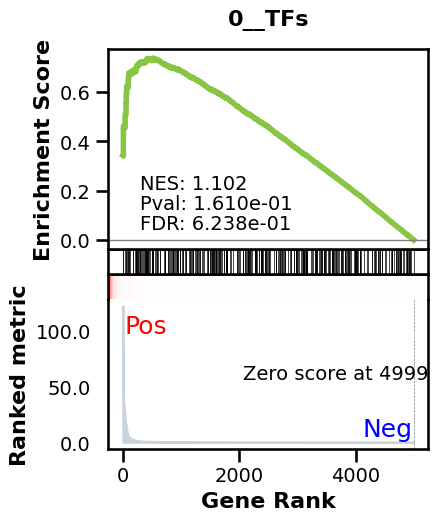

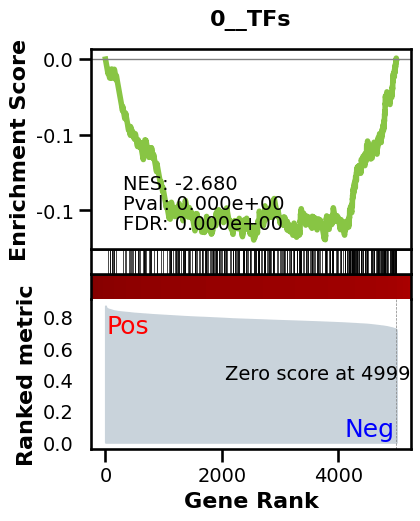

_________________________________________
TF specific enrichment


found some significant results for  36.111111111111114 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0012460602944679446 
recall:  1.0 
random precision: 0.0012464244266404952



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.04it/s]


  9%|▉         | 12/128 [00:00<00:02, 51.63it/s]


 14%|█▍        | 18/128 [00:00<00:02, 51.15it/s]


 19%|█▉        | 24/128 [00:00<00:02, 51.66it/s]


 23%|██▎       | 30/128 [00:00<00:01, 51.55it/s]


 28%|██▊       | 36/128 [00:00<00:01, 51.35it/s]


 33%|███▎      | 42/128 [00:00<00:01, 51.03it/s]


 38%|███▊      | 48/128 [00:00<00:01, 48.46it/s]


 41%|████▏     | 53/128 [00:01<00:01, 46.66it/s]


 45%|████▌     | 58/128 [00:01<00:01, 46.48it/s]


 49%|████▉     | 63/128 [00:01<00:01, 46.88it/s]


 54%|█████▍    | 69/128 [00:01<00:01, 47.83it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 48.96it/s]


 63%|██████▎   | 81/128 [00:01<00:00, 49.68it/s]


 67%|██████▋   | 86/128 [00:01<00:00, 49.43it/s]


 71%|███████   | 91/128 [00:01<00:00, 47.39it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 46.17it/s]


 79%|███████▉  | 101/128 [00:02<00:00, 45.83it/s]


 83%|████████▎ | 106/128 [00:02<00:00, 45.07it/s]


 87%|████████▋ | 111/128 [00:02<00:00, 45.48it/s]


 91%|█████████ | 116/128 [00:02<00:00, 44.21it/s]


 95%|█████████▍| 121/128 [00:02<00:00, 41.70it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 40.86it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 46.70it/s]

Average Precision (AP):  0.0015508892071508518
Area Under Precision-Recall Curve (AUPRC):  0.0015492695639396418


EPR: 0.4939416534868757


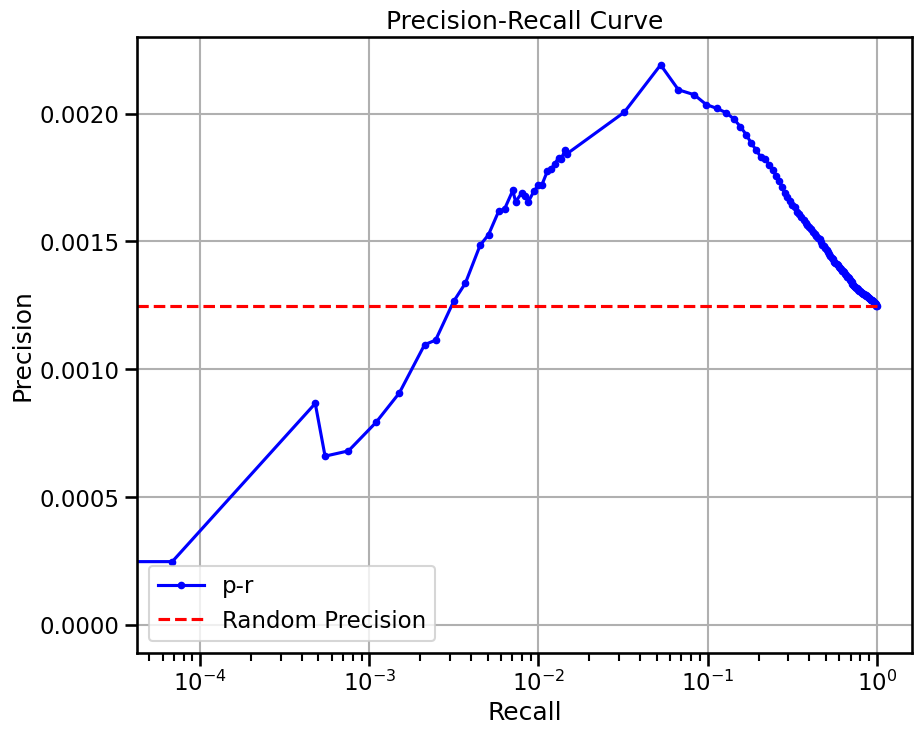

base enrichment


Top central genes: []


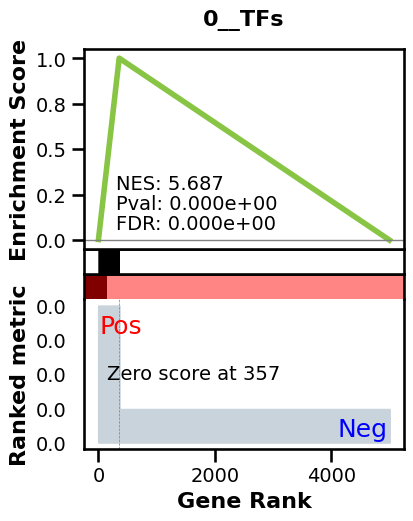

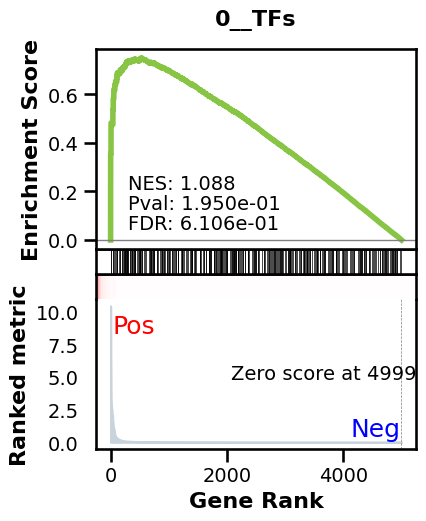

_________________________________________
TF specific enrichment


found some significant results for  11.11111111111111 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.009027741976136058 
recall:  0.6476712328767124 
random precision: 0.0012464244266404952



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 52.73it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.19it/s]


 14%|█▍        | 18/128 [00:00<00:02, 52.28it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.03it/s]


 23%|██▎       | 30/128 [00:00<00:01, 52.85it/s]


 28%|██▊       | 36/128 [00:00<00:01, 52.31it/s]


 33%|███▎      | 42/128 [00:00<00:01, 52.70it/s]


 38%|███▊      | 48/128 [00:00<00:01, 52.27it/s]


 42%|████▏     | 54/128 [00:01<00:01, 52.33it/s]


 47%|████▋     | 60/128 [00:01<00:01, 52.42it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 52.07it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 51.43it/s]


 61%|██████    | 78/128 [00:01<00:00, 51.14it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 51.19it/s]


 70%|███████   | 90/128 [00:01<00:00, 51.51it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 51.89it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 52.35it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 52.85it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.06it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.05it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.09it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 52.04it/s]

Average Precision (AP):  0.008758562915952638
Area Under Precision-Recall Curve (AUPRC):  0.00830413293125008
EPR: 13.6577931636639


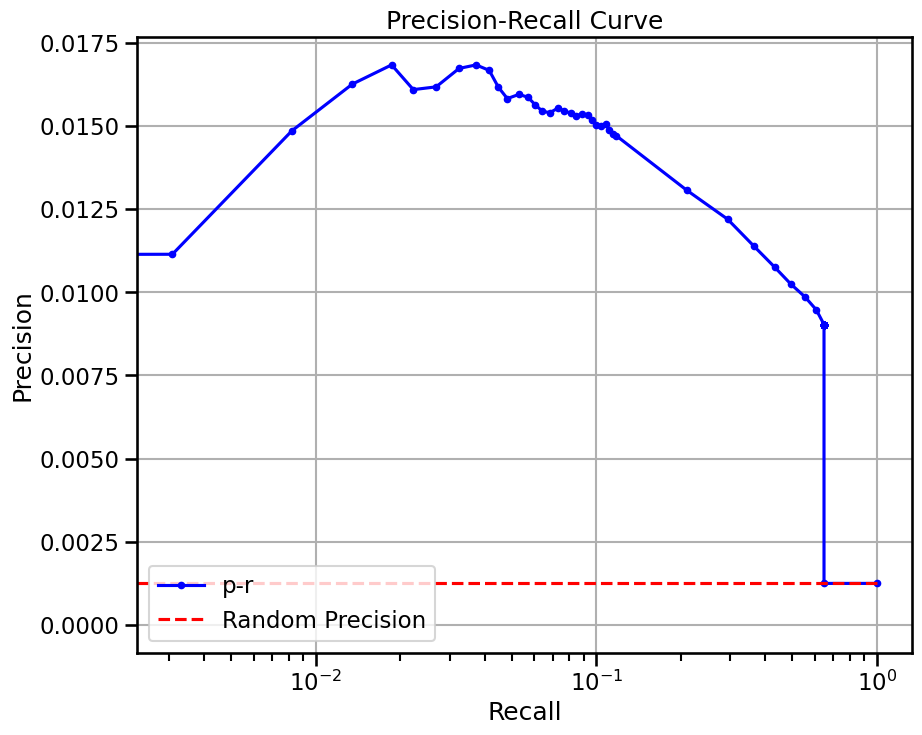

true elem 14600 ...


doing classification....


metrics {'used_heads': 9, 'precision': 0.0012686770340012274, 'random_precision': 0.0012686770340012274, 'recall': 1.0, 'predicted_true': 4686772.0, 'number_of_true': 5946.0}


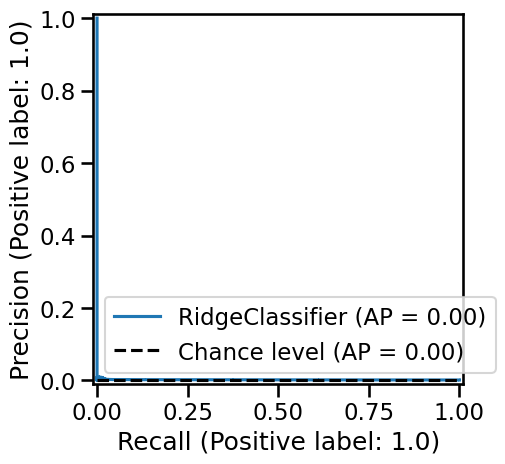

base enrichment


Top central genes: []
The DataFrame contains only the same values.


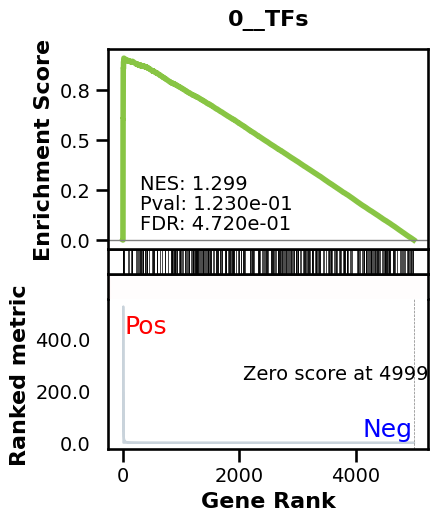

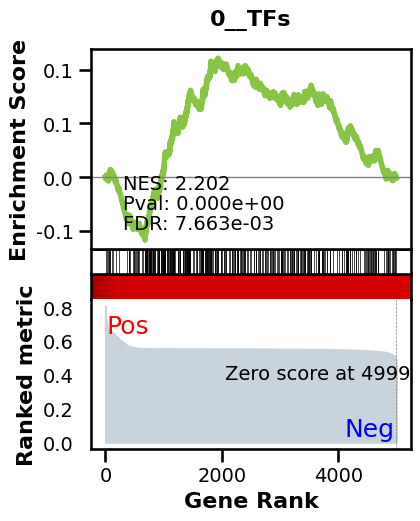

_________________________________________
TF specific enrichment


found some significant results for  30.555555555555557 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0012460602944679446 
recall:  1.0 
random precision: 0.0012464244266404952



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 49.90it/s]


  9%|▊         | 11/128 [00:00<00:02, 50.14it/s]


 13%|█▎        | 17/128 [00:00<00:02, 51.07it/s]


 18%|█▊        | 23/128 [00:00<00:02, 51.89it/s]


 23%|██▎       | 29/128 [00:00<00:01, 53.04it/s]


 27%|██▋       | 35/128 [00:00<00:01, 53.91it/s]


 32%|███▏      | 41/128 [00:00<00:01, 54.56it/s]


 37%|███▋      | 47/128 [00:00<00:01, 54.04it/s]


 41%|████▏     | 53/128 [00:00<00:01, 54.15it/s]


 46%|████▌     | 59/128 [00:01<00:01, 53.33it/s]


 51%|█████     | 65/128 [00:01<00:01, 53.14it/s]


 55%|█████▌    | 71/128 [00:01<00:01, 52.65it/s]


 60%|██████    | 77/128 [00:01<00:00, 51.77it/s]


 65%|██████▍   | 83/128 [00:01<00:00, 51.13it/s]


 70%|██████▉   | 89/128 [00:01<00:00, 50.73it/s]


 74%|███████▍  | 95/128 [00:01<00:00, 50.56it/s]


 79%|███████▉  | 101/128 [00:01<00:00, 50.45it/s]


 84%|████████▎ | 107/128 [00:02<00:00, 50.05it/s]


 88%|████████▊ | 113/128 [00:02<00:00, 50.08it/s]


 93%|█████████▎| 119/128 [00:02<00:00, 50.50it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 50.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 51.69it/s]

Average Precision (AP):  0.0018793100046347975
Area Under Precision-Recall Curve (AUPRC):  0.0018754748643695987


EPR: 7.766515917392918


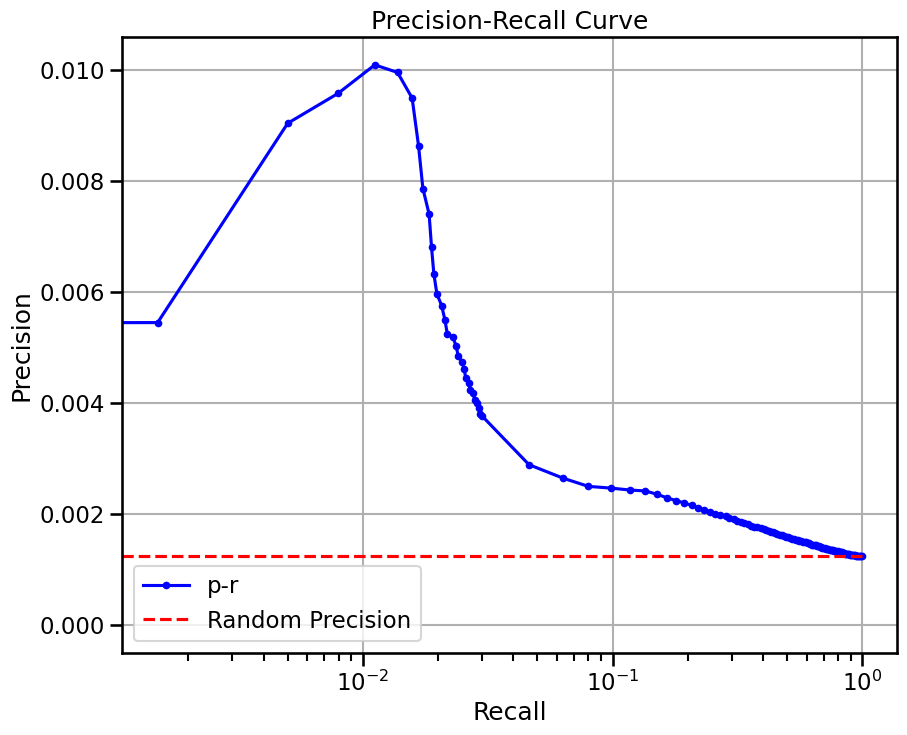

base enrichment


Top central genes: []


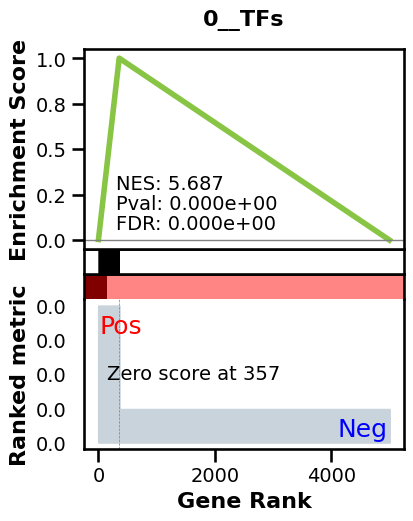

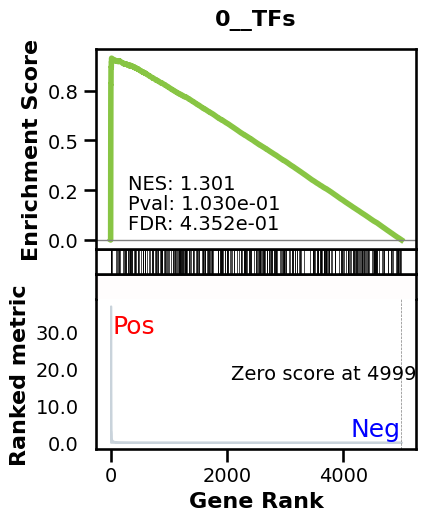

_________________________________________
TF specific enrichment


found some significant results for  5.555555555555555 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.009027741976136058 
recall:  0.6476712328767124 
random precision: 0.0012464244266404952



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 44.43it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.19it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.39it/s]


 16%|█▌        | 20/128 [00:00<00:02, 46.04it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.96it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.70it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.94it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.73it/s]


 35%|███▌      | 45/128 [00:00<00:01, 46.14it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.99it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.78it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.47it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.33it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.83it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.46it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.92it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 45.75it/s]


 70%|███████   | 90/128 [00:01<00:00, 45.68it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.02it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.23it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 46.19it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.90it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.86it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.65it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.63it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.65it/s]

Average Precision (AP):  0.010163934255623322
Area Under Precision-Recall Curve (AUPRC):  0.009230741983139952
EPR: 21.047203984401033


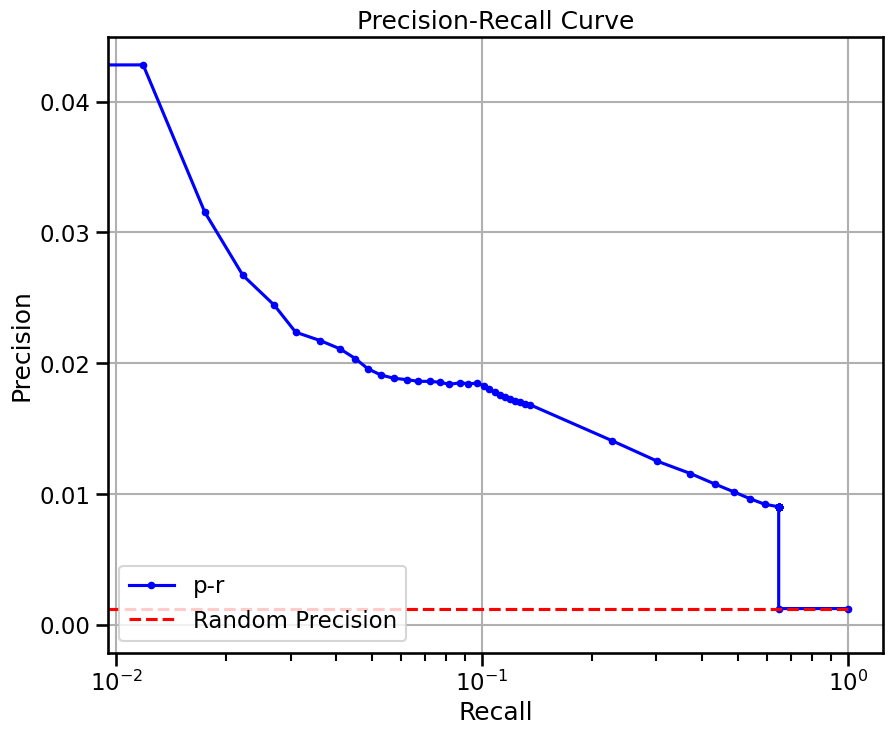


  0%|          | 0/25 [00:00<?, ?it/s]


  4%|▍         | 1/25 [00:04<01:58,  4.93s/it]


  8%|▊         | 2/25 [00:05<00:59,  2.60s/it]


 12%|█▏        | 3/25 [00:06<00:41,  1.89s/it]


 16%|█▌        | 4/25 [00:07<00:31,  1.50s/it]


 20%|██        | 5/25 [00:08<00:26,  1.33s/it]


 24%|██▍       | 6/25 [00:09<00:22,  1.19s/it]


 28%|██▊       | 7/25 [00:10<00:20,  1.13s/it]


 32%|███▏      | 8/25 [00:11<00:18,  1.06s/it]


 36%|███▌      | 9/25 [00:12<00:16,  1.04s/it]


 40%|████      | 10/25 [00:13<00:15,  1.00s/it]


 44%|████▍     | 11/25 [00:14<00:13,  1.01it/s]


 48%|████▊     | 12/25 [00:17<00:18,  1.43s/it]


 52%|█████▏    | 13/25 [00:18<00:15,  1.32s/it]


 56%|█████▌    | 14/25 [00:19<00:13,  1.24s/it]


 60%|██████    | 15/25 [00:20<00:11,  1.17s/it]


 64%|██████▍   | 16/25 [00:21<00:11,  1.31s/it]


 68%|██████▊   | 17/25 [00:22<00:09,  1.24s/it]


 72%|███████▏  | 18/25 [00:23<00:08,  1.16s/it]


 76%|███████▌  | 19/25 [00:24<00:06,  1.13s/it]


 80%|████████  | 20/25 [00:25<00:05,  1.07s/it]


 84%|████████▍ | 21/25 [00:26<00:04,  1.06s/it]


 88%|████████▊ | 22/25 [00:27<00:03,  1.04s/it]


 92%|█████████▏| 23/25 [00:28<00:02,  1.03s/it]


 96%|█████████▌| 24/25 [00:30<00:01,  1.07s/it]


100%|██████████| 25/25 [00:30<00:00,  1.03it/s]


100%|██████████| 25/25 [00:30<00:00,  1.24s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


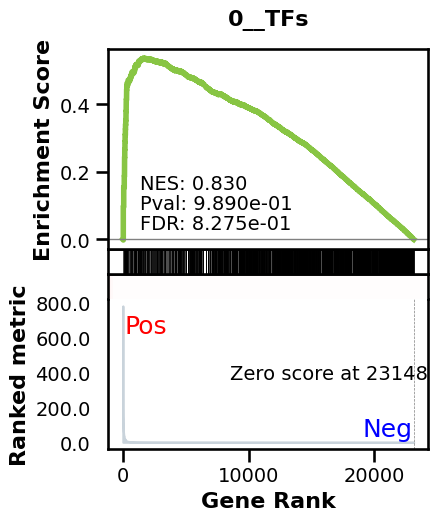

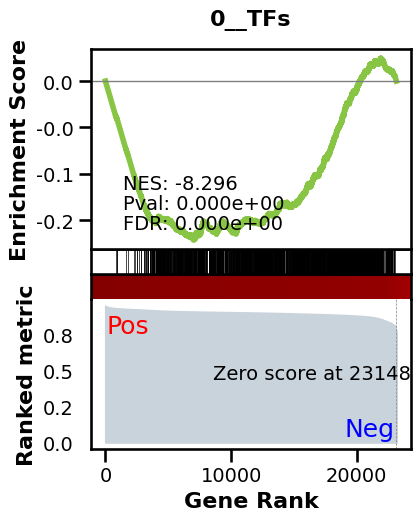

_________________________________________
TF specific enrichment


found some significant results for  58.92857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:43,  2.91it/s]


  2%|▏         | 2/128 [00:00<00:42,  2.99it/s]


  2%|▏         | 3/128 [00:01<00:41,  3.01it/s]


  3%|▎         | 4/128 [00:01<00:40,  3.06it/s]


  4%|▍         | 5/128 [00:01<00:39,  3.08it/s]


  5%|▍         | 6/128 [00:01<00:40,  3.01it/s]


  5%|▌         | 7/128 [00:02<00:41,  2.95it/s]


  6%|▋         | 8/128 [00:02<00:39,  3.01it/s]


  7%|▋         | 9/128 [00:02<00:39,  3.02it/s]


  8%|▊         | 10/128 [00:03<00:39,  2.96it/s]


  9%|▊         | 11/128 [00:03<00:39,  2.95it/s]


  9%|▉         | 12/128 [00:04<00:39,  2.95it/s]


 10%|█         | 13/128 [00:04<00:38,  3.01it/s]


 11%|█         | 14/128 [00:04<00:37,  3.03it/s]


 12%|█▏        | 15/128 [00:04<00:37,  3.02it/s]


 12%|█▎        | 16/128 [00:05<00:36,  3.06it/s]


 13%|█▎        | 17/128 [00:05<00:35,  3.10it/s]


 14%|█▍        | 18/128 [00:05<00:35,  3.11it/s]


 15%|█▍        | 19/128 [00:06<00:35,  3.11it/s]


 16%|█▌        | 20/128 [00:06<00:34,  3.11it/s]


 16%|█▋        | 21/128 [00:06<00:33,  3.15it/s]


 17%|█▋        | 22/128 [00:07<00:33,  3.15it/s]


 18%|█▊        | 23/128 [00:07<00:33,  3.12it/s]


 19%|█▉        | 24/128 [00:07<00:33,  3.13it/s]


 20%|█▉        | 25/128 [00:08<00:32,  3.13it/s]


 20%|██        | 26/128 [00:08<00:32,  3.14it/s]


 21%|██        | 27/128 [00:08<00:32,  3.13it/s]


 22%|██▏       | 28/128 [00:09<00:32,  3.10it/s]


 23%|██▎       | 29/128 [00:09<00:32,  3.09it/s]


 23%|██▎       | 30/128 [00:09<00:31,  3.10it/s]


 24%|██▍       | 31/128 [00:10<00:31,  3.12it/s]


 25%|██▌       | 32/128 [00:10<00:30,  3.13it/s]


 26%|██▌       | 33/128 [00:10<00:30,  3.13it/s]


 27%|██▋       | 34/128 [00:11<00:29,  3.15it/s]


 27%|██▋       | 35/128 [00:11<00:29,  3.15it/s]


 28%|██▊       | 36/128 [00:11<00:29,  3.15it/s]


 29%|██▉       | 37/128 [00:12<00:28,  3.15it/s]


 30%|██▉       | 38/128 [00:12<00:28,  3.15it/s]


 30%|███       | 39/128 [00:12<00:28,  3.16it/s]


 31%|███▏      | 40/128 [00:12<00:28,  3.05it/s]


 32%|███▏      | 41/128 [00:13<00:30,  2.85it/s]


 33%|███▎      | 42/128 [00:13<00:31,  2.73it/s]


 34%|███▎      | 43/128 [00:14<00:31,  2.74it/s]


 34%|███▍      | 44/128 [00:14<00:30,  2.79it/s]


 35%|███▌      | 45/128 [00:14<00:29,  2.79it/s]


 36%|███▌      | 46/128 [00:15<00:29,  2.75it/s]


 37%|███▋      | 47/128 [00:15<00:29,  2.70it/s]


 38%|███▊      | 48/128 [00:16<00:30,  2.63it/s]


 38%|███▊      | 49/128 [00:16<00:30,  2.63it/s]


 39%|███▉      | 50/128 [00:16<00:29,  2.69it/s]


 40%|███▉      | 51/128 [00:17<00:28,  2.72it/s]


 41%|████      | 52/128 [00:17<00:28,  2.67it/s]


 41%|████▏     | 53/128 [00:17<00:28,  2.60it/s]


 42%|████▏     | 54/128 [00:18<00:28,  2.60it/s]


 43%|████▎     | 55/128 [00:18<00:27,  2.61it/s]


 44%|████▍     | 56/128 [00:19<00:26,  2.69it/s]


 45%|████▍     | 57/128 [00:19<00:26,  2.72it/s]


 45%|████▌     | 58/128 [00:19<00:26,  2.64it/s]


 46%|████▌     | 59/128 [00:20<00:26,  2.62it/s]


 47%|████▋     | 60/128 [00:20<00:26,  2.57it/s]


 48%|████▊     | 61/128 [00:20<00:25,  2.59it/s]


 48%|████▊     | 62/128 [00:21<00:25,  2.64it/s]


 49%|████▉     | 63/128 [00:21<00:24,  2.68it/s]


 50%|█████     | 64/128 [00:22<00:24,  2.66it/s]


 51%|█████     | 65/128 [00:22<00:24,  2.61it/s]


 52%|█████▏    | 66/128 [00:22<00:23,  2.61it/s]


 52%|█████▏    | 67/128 [00:23<00:23,  2.59it/s]


 53%|█████▎    | 68/128 [00:23<00:22,  2.68it/s]


 54%|█████▍    | 69/128 [00:23<00:21,  2.69it/s]


 55%|█████▍    | 70/128 [00:24<00:21,  2.66it/s]


 55%|█████▌    | 71/128 [00:24<00:21,  2.60it/s]


 56%|█████▋    | 72/128 [00:25<00:21,  2.58it/s]


 57%|█████▋    | 73/128 [00:25<00:20,  2.62it/s]


 58%|█████▊    | 74/128 [00:25<00:20,  2.65it/s]


 59%|█████▊    | 75/128 [00:26<00:19,  2.70it/s]


 59%|█████▉    | 76/128 [00:26<00:19,  2.63it/s]


 60%|██████    | 77/128 [00:27<00:19,  2.61it/s]


 61%|██████    | 78/128 [00:27<00:19,  2.62it/s]


 62%|██████▏   | 79/128 [00:27<00:18,  2.60it/s]


 62%|██████▎   | 80/128 [00:28<00:18,  2.61it/s]


 63%|██████▎   | 81/128 [00:28<00:17,  2.66it/s]


 64%|██████▍   | 82/128 [00:28<00:17,  2.65it/s]


 65%|██████▍   | 83/128 [00:29<00:17,  2.63it/s]


 66%|██████▌   | 84/128 [00:29<00:16,  2.63it/s]


 66%|██████▋   | 85/128 [00:30<00:16,  2.66it/s]


 67%|██████▋   | 86/128 [00:30<00:15,  2.68it/s]


 68%|██████▊   | 87/128 [00:30<00:15,  2.66it/s]


 69%|██████▉   | 88/128 [00:31<00:14,  2.72it/s]


 70%|██████▉   | 89/128 [00:31<00:14,  2.73it/s]


 70%|███████   | 90/128 [00:31<00:14,  2.67it/s]


 71%|███████   | 91/128 [00:32<00:13,  2.67it/s]


 72%|███████▏  | 92/128 [00:32<00:13,  2.74it/s]


 73%|███████▎  | 93/128 [00:32<00:12,  2.73it/s]


 73%|███████▎  | 94/128 [00:33<00:12,  2.70it/s]


 74%|███████▍  | 95/128 [00:33<00:12,  2.64it/s]


 75%|███████▌  | 96/128 [00:34<00:12,  2.62it/s]


 76%|███████▌  | 97/128 [00:34<00:11,  2.65it/s]


 77%|███████▋  | 98/128 [00:34<00:11,  2.67it/s]


 77%|███████▋  | 99/128 [00:35<00:10,  2.64it/s]


 78%|███████▊  | 100/128 [00:35<00:10,  2.59it/s]


 79%|███████▉  | 101/128 [00:36<00:10,  2.58it/s]


 80%|███████▉  | 102/128 [00:36<00:09,  2.62it/s]


 80%|████████  | 103/128 [00:36<00:09,  2.62it/s]


 81%|████████▏ | 104/128 [00:37<00:09,  2.59it/s]


 82%|████████▏ | 105/128 [00:37<00:08,  2.57it/s]


 83%|████████▎ | 106/128 [00:38<00:08,  2.57it/s]


 84%|████████▎ | 107/128 [00:38<00:08,  2.59it/s]


 84%|████████▍ | 108/128 [00:38<00:07,  2.59it/s]


 85%|████████▌ | 109/128 [00:39<00:07,  2.62it/s]


 86%|████████▌ | 110/128 [00:39<00:06,  2.58it/s]


 87%|████████▋ | 111/128 [00:39<00:06,  2.56it/s]


 88%|████████▊ | 112/128 [00:40<00:06,  2.54it/s]


 88%|████████▊ | 113/128 [00:40<00:05,  2.56it/s]


 89%|████████▉ | 114/128 [00:41<00:05,  2.57it/s]


 90%|████████▉ | 115/128 [00:41<00:05,  2.57it/s]


 91%|█████████ | 116/128 [00:41<00:04,  2.61it/s]


 91%|█████████▏| 117/128 [00:42<00:04,  2.61it/s]


 92%|█████████▏| 118/128 [00:42<00:03,  2.59it/s]


 93%|█████████▎| 119/128 [00:43<00:03,  2.57it/s]


 94%|█████████▍| 120/128 [00:43<00:03,  2.58it/s]


 95%|█████████▍| 121/128 [00:43<00:02,  2.58it/s]


 95%|█████████▌| 122/128 [00:44<00:02,  2.63it/s]


 96%|█████████▌| 123/128 [00:44<00:01,  2.60it/s]


 97%|█████████▋| 124/128 [00:44<00:01,  2.59it/s]


 98%|█████████▊| 125/128 [00:45<00:01,  2.53it/s]


 98%|█████████▊| 126/128 [00:45<00:00,  2.55it/s]


 99%|█████████▉| 127/128 [00:46<00:00,  2.55it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:46<00:00,  2.51it/s]


100%|██████████| 128/128 [00:46<00:00,  2.75it/s]

Average Precision (AP):  0.0006874998088143946
Area Under Precision-Recall Curve (AUPRC):  0.0006874438385350613


EPR: 1.1494995041171794


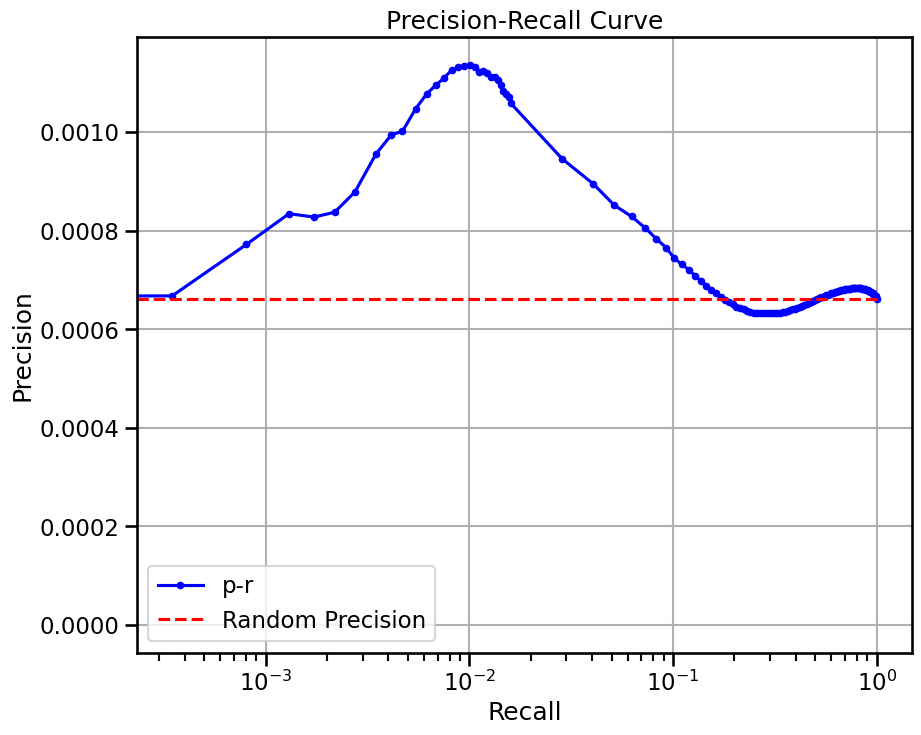


  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:03<02:35,  3.16s/it]


  4%|▍         | 2/50 [00:05<02:01,  2.52s/it]


  6%|▌         | 3/50 [00:07<01:43,  2.20s/it]


  8%|▊         | 4/50 [00:08<01:27,  1.91s/it]


 10%|█         | 5/50 [00:10<01:29,  1.99s/it]


 12%|█▏        | 6/50 [00:12<01:22,  1.88s/it]


 14%|█▍        | 7/50 [00:14<01:19,  1.85s/it]


 16%|█▌        | 8/50 [00:15<01:16,  1.83s/it]


 18%|█▊        | 9/50 [00:17<01:13,  1.78s/it]


 20%|██        | 10/50 [00:19<01:09,  1.73s/it]


 22%|██▏       | 11/50 [00:20<01:07,  1.72s/it]


 24%|██▍       | 12/50 [00:22<01:04,  1.69s/it]


 26%|██▌       | 13/50 [00:24<01:01,  1.67s/it]


 28%|██▊       | 14/50 [00:26<01:03,  1.75s/it]


 30%|███       | 15/50 [00:27<00:59,  1.70s/it]


 32%|███▏      | 16/50 [00:29<00:55,  1.64s/it]


 34%|███▍      | 17/50 [00:30<00:53,  1.62s/it]


 36%|███▌      | 18/50 [00:32<00:51,  1.61s/it]


 38%|███▊      | 19/50 [00:33<00:48,  1.55s/it]


 40%|████      | 20/50 [00:35<00:46,  1.54s/it]


 42%|████▏     | 21/50 [00:36<00:42,  1.48s/it]


 44%|████▍     | 22/50 [00:37<00:40,  1.44s/it]


 46%|████▌     | 23/50 [00:39<00:37,  1.40s/it]


 48%|████▊     | 24/50 [00:40<00:34,  1.33s/it]


 50%|█████     | 25/50 [00:41<00:33,  1.32s/it]


 52%|█████▏    | 26/50 [00:43<00:32,  1.34s/it]


 54%|█████▍    | 27/50 [00:44<00:31,  1.35s/it]


 56%|█████▌    | 28/50 [00:45<00:29,  1.34s/it]


 58%|█████▊    | 29/50 [00:47<00:28,  1.35s/it]


 60%|██████    | 30/50 [00:48<00:26,  1.34s/it]


 62%|██████▏   | 31/50 [00:49<00:25,  1.33s/it]


 64%|██████▍   | 32/50 [00:51<00:25,  1.42s/it]


 66%|██████▌   | 33/50 [00:53<00:25,  1.48s/it]


 68%|██████▊   | 34/50 [00:54<00:23,  1.47s/it]


 70%|███████   | 35/50 [00:55<00:22,  1.47s/it]


 72%|███████▏  | 36/50 [00:57<00:20,  1.46s/it]


 74%|███████▍  | 37/50 [00:58<00:18,  1.44s/it]


 76%|███████▌  | 38/50 [01:00<00:17,  1.46s/it]


 78%|███████▊  | 39/50 [01:01<00:15,  1.45s/it]


 80%|████████  | 40/50 [01:03<00:14,  1.43s/it]


 82%|████████▏ | 41/50 [01:04<00:13,  1.45s/it]


 84%|████████▍ | 42/50 [01:06<00:11,  1.45s/it]


 86%|████████▌ | 43/50 [01:07<00:09,  1.40s/it]


 88%|████████▊ | 44/50 [01:08<00:08,  1.43s/it]


 90%|█████████ | 45/50 [01:10<00:07,  1.46s/it]


 92%|█████████▏| 46/50 [01:11<00:05,  1.41s/it]


 94%|█████████▍| 47/50 [01:12<00:04,  1.38s/it]


 96%|█████████▌| 48/50 [01:14<00:02,  1.35s/it]


 98%|█████████▊| 49/50 [01:15<00:01,  1.32s/it]


100%|██████████| 50/50 [01:16<00:00,  1.12s/it]


100%|██████████| 50/50 [01:16<00:00,  1.53s/it]

(792, 5000) endothelial cell


base enrichment


Top central genes: []
The DataFrame contains only the same values.


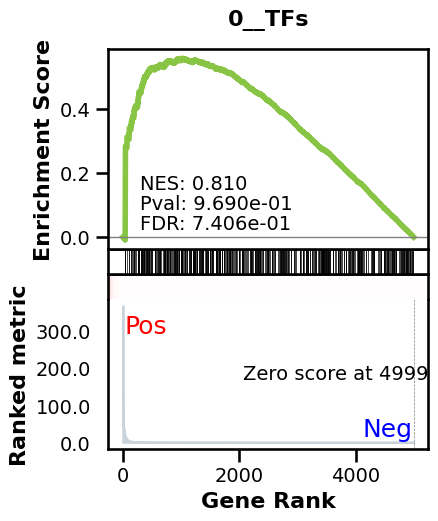

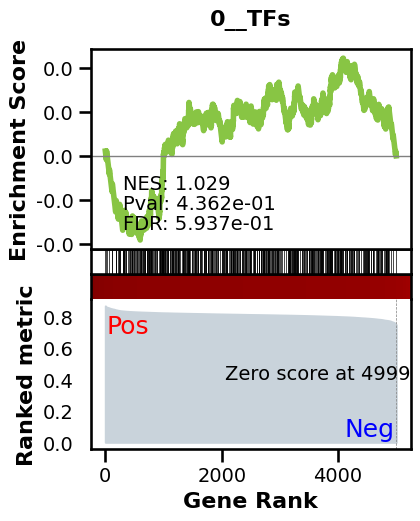

_________________________________________
TF specific enrichment


found some significant results for  28.571428571428573 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.0015901492455931698 
recall:  1.0 
random precision: 0.0015905976802365973



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 49.31it/s]


  9%|▊         | 11/128 [00:00<00:02, 50.39it/s]


 13%|█▎        | 17/128 [00:00<00:02, 50.09it/s]


 18%|█▊        | 23/128 [00:00<00:02, 48.47it/s]


 22%|██▏       | 28/128 [00:00<00:02, 47.12it/s]


 26%|██▌       | 33/128 [00:00<00:02, 46.37it/s]


 30%|██▉       | 38/128 [00:00<00:01, 46.70it/s]


 34%|███▎      | 43/128 [00:00<00:01, 46.65it/s]


 38%|███▊      | 48/128 [00:01<00:01, 46.20it/s]


 41%|████▏     | 53/128 [00:01<00:01, 46.11it/s]


 45%|████▌     | 58/128 [00:01<00:01, 46.21it/s]


 49%|████▉     | 63/128 [00:01<00:01, 46.09it/s]


 53%|█████▎    | 68/128 [00:01<00:01, 45.93it/s]


 57%|█████▋    | 73/128 [00:01<00:01, 45.78it/s]


 61%|██████    | 78/128 [00:01<00:01, 45.82it/s]


 65%|██████▍   | 83/128 [00:01<00:00, 46.64it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 47.18it/s]


 73%|███████▎  | 93/128 [00:01<00:00, 47.67it/s]


 77%|███████▋  | 98/128 [00:02<00:00, 47.80it/s]


 80%|████████  | 103/128 [00:02<00:00, 47.86it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 48.13it/s]


 88%|████████▊ | 113/128 [00:02<00:00, 48.45it/s]


 92%|█████████▏| 118/128 [00:02<00:00, 48.29it/s]


 96%|█████████▌| 123/128 [00:02<00:00, 47.92it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 47.16it/s]


100%|██████████| 128/128 [00:02<00:00, 47.19it/s]

Average Precision (AP):  0.0017633733578335167
Area Under Precision-Recall Curve (AUPRC):  0.0017617928059436622
EPR: 1.2896230587349549


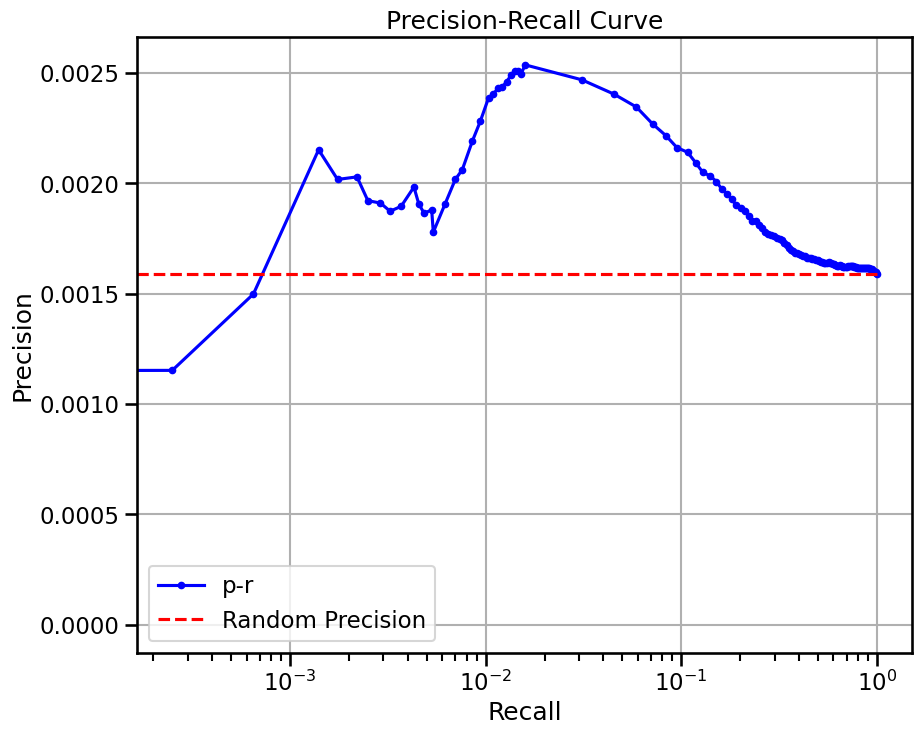

base enrichment


Top central genes: []


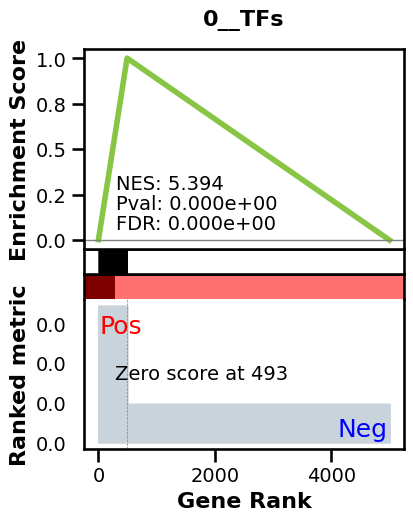

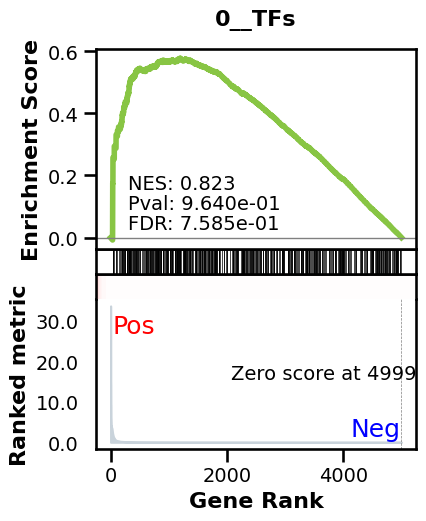

_________________________________________
TF specific enrichment


found some significant results for  14.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.006406149061914498 
recall:  0.48725382385284416 
random precision: 0.0015905976802365973



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.70it/s]


  8%|▊         | 10/128 [00:00<00:02, 46.32it/s]


 12%|█▏        | 15/128 [00:00<00:02, 46.01it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.92it/s]


 20%|█▉        | 25/128 [00:00<00:02, 46.10it/s]


 23%|██▎       | 30/128 [00:00<00:02, 46.74it/s]


 27%|██▋       | 35/128 [00:00<00:01, 47.20it/s]


 31%|███▏      | 40/128 [00:00<00:01, 47.48it/s]


 35%|███▌      | 45/128 [00:00<00:01, 47.23it/s]


 39%|███▉      | 50/128 [00:01<00:01, 46.00it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.09it/s]


 47%|████▋     | 60/128 [00:01<00:01, 44.70it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.91it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.87it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.41it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 46.11it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 46.51it/s]


 70%|███████   | 90/128 [00:01<00:00, 46.75it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.98it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.77it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 47.40it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 47.52it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 47.71it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 47.67it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 46.81it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 46.36it/s]

Average Precision (AP):  0.00490069356407933
Area Under Precision-Recall Curve (AUPRC):  0.00451958338904427
EPR: 8.525755976704975


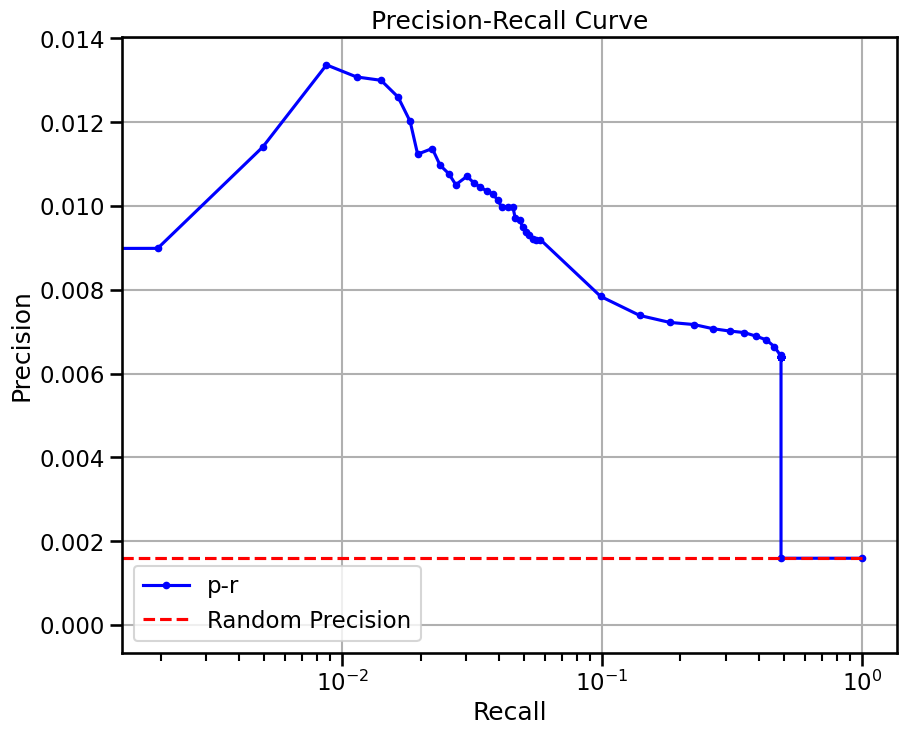

base enrichment


Top central genes: []
The DataFrame contains only the same values.


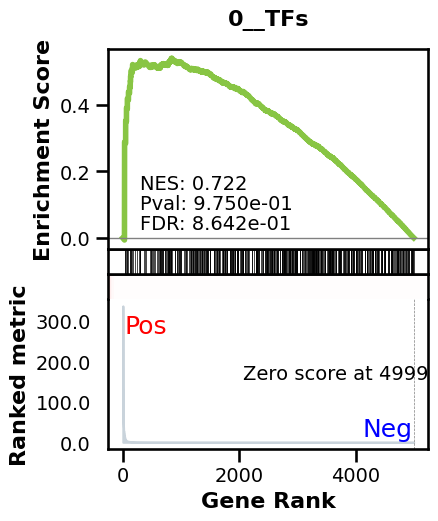

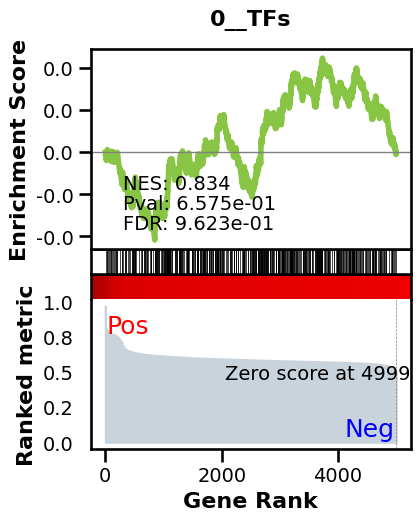

_________________________________________
TF specific enrichment


found some significant results for  30.357142857142858 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.0015901492455931698 
recall:  1.0 
random precision: 0.0015905976802365973



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 49.00it/s]


  8%|▊         | 10/128 [00:00<00:02, 49.23it/s]


 12%|█▏        | 15/128 [00:00<00:02, 48.88it/s]


 16%|█▌        | 20/128 [00:00<00:02, 47.07it/s]


 20%|█▉        | 25/128 [00:00<00:02, 46.56it/s]


 23%|██▎       | 30/128 [00:00<00:02, 46.92it/s]


 27%|██▋       | 35/128 [00:00<00:01, 46.52it/s]


 31%|███▏      | 40/128 [00:00<00:01, 46.06it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.64it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.73it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.70it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.65it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.44it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.30it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.95it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 46.36it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 46.50it/s]


 70%|███████   | 90/128 [00:01<00:00, 46.33it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.91it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 47.54it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 47.78it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 47.84it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 48.18it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 47.78it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 47.11it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 46.71it/s]

Average Precision (AP):  0.0020339067272519057
Area Under Precision-Recall Curve (AUPRC):  0.002032604206593234
EPR: 2.2717588288165436


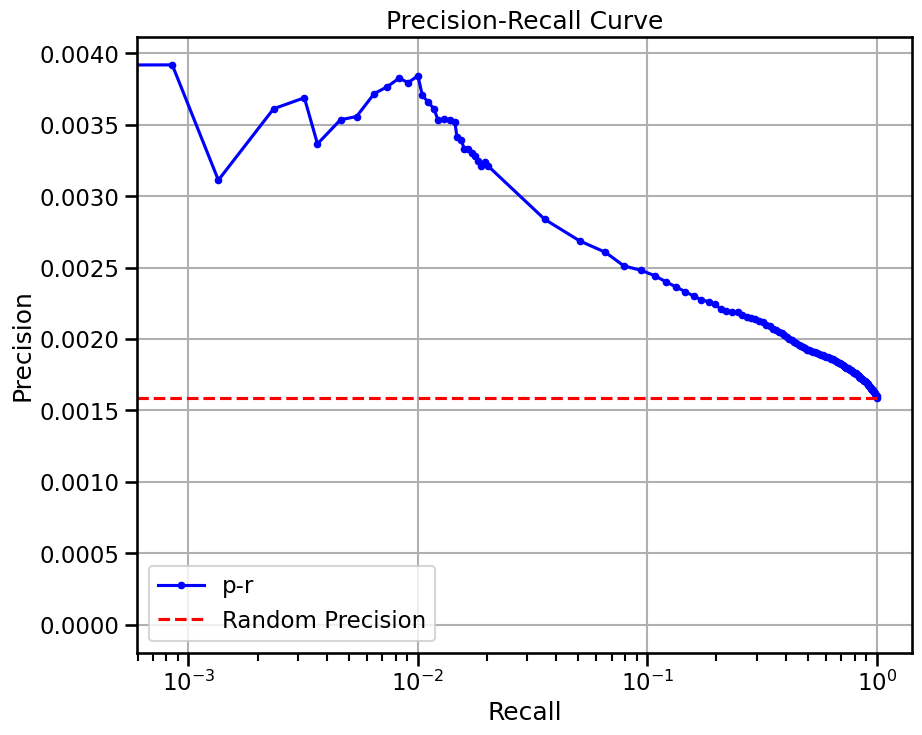

base enrichment


Top central genes: []


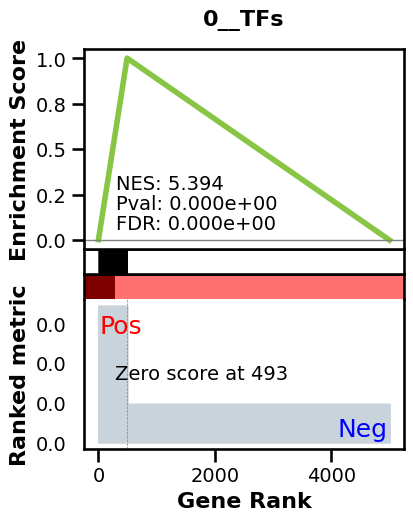

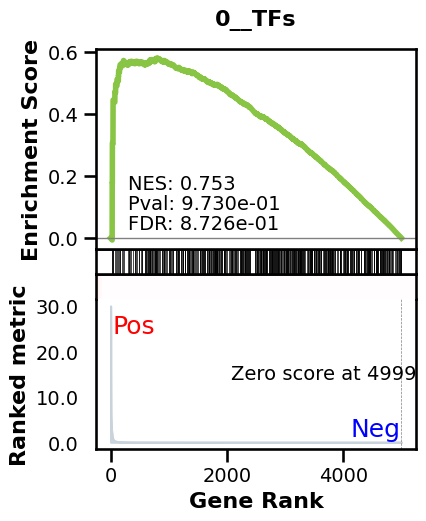

_________________________________________
TF specific enrichment


found some significant results for  14.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.006406149061914498 
recall:  0.48725382385284416 
random precision: 0.0015905976802365973



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.41it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.31it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.17it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.25it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.32it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.44it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.77it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.82it/s]


 42%|████▏     | 54/128 [00:01<00:01, 53.83it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.78it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.69it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.82it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.84it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.69it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.50it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.34it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.33it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.30it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.24it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.36it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.73it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.54it/s]

Average Precision (AP):  0.005496918326938673
Area Under Precision-Recall Curve (AUPRC):  0.00507452320752314
EPR: 8.88956712887026


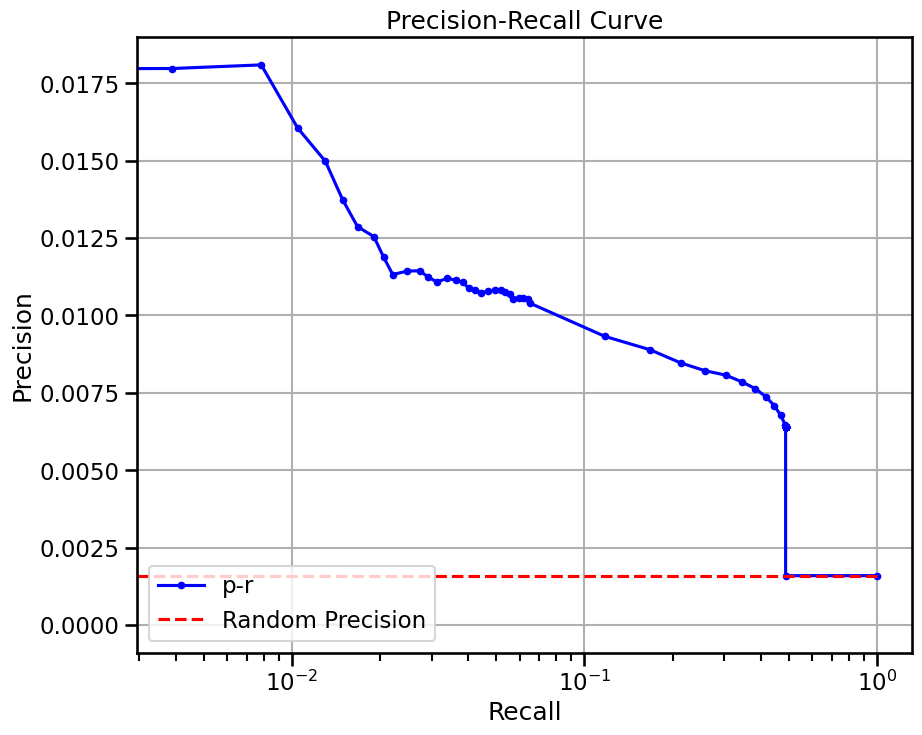


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:06<02:07,  6.09s/it]


  9%|▉         | 2/22 [00:07<01:02,  3.11s/it]


 14%|█▎        | 3/22 [00:08<00:40,  2.14s/it]


 18%|█▊        | 4/22 [00:09<00:30,  1.68s/it]


 23%|██▎       | 5/22 [00:10<00:23,  1.41s/it]


 27%|██▋       | 6/22 [00:10<00:20,  1.27s/it]


 32%|███▏      | 7/22 [00:11<00:17,  1.17s/it]


 36%|███▋      | 8/22 [00:12<00:15,  1.11s/it]


 41%|████      | 9/22 [00:13<00:13,  1.05s/it]


 45%|████▌     | 10/22 [00:14<00:12,  1.04s/it]


 50%|█████     | 11/22 [00:15<00:10,  1.00it/s]


 55%|█████▍    | 12/22 [00:16<00:10,  1.00s/it]


 59%|█████▉    | 13/22 [00:17<00:08,  1.03it/s]


 64%|██████▎   | 14/22 [00:18<00:08,  1.00s/it]


 68%|██████▊   | 15/22 [00:19<00:06,  1.03it/s]


 73%|███████▎  | 16/22 [00:20<00:05,  1.02it/s]


 77%|███████▋  | 17/22 [00:21<00:04,  1.03it/s]


 82%|████████▏ | 18/22 [00:22<00:03,  1.02it/s]


 86%|████████▋ | 19/22 [00:23<00:02,  1.04it/s]


 91%|█████████ | 20/22 [00:24<00:01,  1.03it/s]


 95%|█████████▌| 21/22 [00:25<00:00,  1.04it/s]


100%|██████████| 22/22 [00:26<00:00,  1.18it/s]


100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


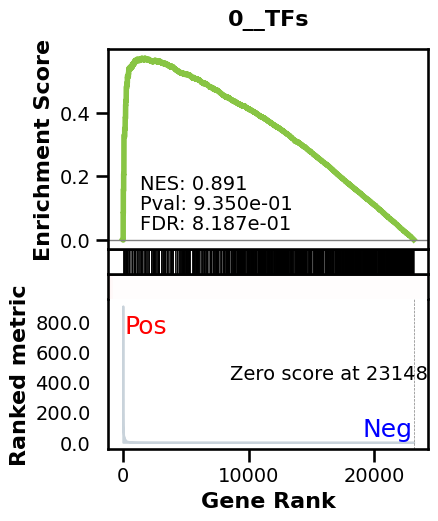

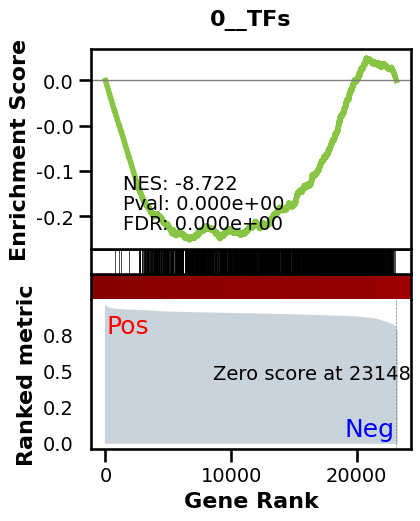

_________________________________________
TF specific enrichment


found some significant results for  51.785714285714285 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:39,  3.22it/s]


  2%|▏         | 2/128 [00:00<00:39,  3.21it/s]


  2%|▏         | 3/128 [00:00<00:40,  3.10it/s]


  3%|▎         | 4/128 [00:01<00:39,  3.11it/s]


  4%|▍         | 5/128 [00:01<00:39,  3.15it/s]


  5%|▍         | 6/128 [00:01<00:38,  3.17it/s]


  5%|▌         | 7/128 [00:02<00:38,  3.17it/s]


  6%|▋         | 8/128 [00:02<00:38,  3.15it/s]


  7%|▋         | 9/128 [00:02<00:37,  3.17it/s]


  8%|▊         | 10/128 [00:03<00:37,  3.18it/s]


  9%|▊         | 11/128 [00:03<00:36,  3.20it/s]


  9%|▉         | 12/128 [00:03<00:36,  3.20it/s]


 10%|█         | 13/128 [00:04<00:36,  3.19it/s]


 11%|█         | 14/128 [00:04<00:35,  3.22it/s]


 12%|█▏        | 15/128 [00:04<00:35,  3.22it/s]


 12%|█▎        | 16/128 [00:05<00:34,  3.23it/s]


 13%|█▎        | 17/128 [00:05<00:34,  3.22it/s]


 14%|█▍        | 18/128 [00:05<00:33,  3.25it/s]


 15%|█▍        | 19/128 [00:05<00:33,  3.28it/s]


 16%|█▌        | 20/128 [00:06<00:33,  3.27it/s]


 16%|█▋        | 21/128 [00:06<00:32,  3.27it/s]


 17%|█▋        | 22/128 [00:06<00:32,  3.29it/s]


 18%|█▊        | 23/128 [00:07<00:31,  3.29it/s]


 19%|█▉        | 24/128 [00:07<00:31,  3.31it/s]


 20%|█▉        | 25/128 [00:07<00:31,  3.32it/s]


 20%|██        | 26/128 [00:08<00:30,  3.31it/s]


 21%|██        | 27/128 [00:08<00:30,  3.32it/s]


 22%|██▏       | 28/128 [00:08<00:30,  3.31it/s]


 23%|██▎       | 29/128 [00:08<00:29,  3.33it/s]


 23%|██▎       | 30/128 [00:09<00:29,  3.33it/s]


 24%|██▍       | 31/128 [00:09<00:29,  3.33it/s]


 25%|██▌       | 32/128 [00:09<00:28,  3.34it/s]


 26%|██▌       | 33/128 [00:10<00:28,  3.34it/s]


 27%|██▋       | 34/128 [00:10<00:28,  3.35it/s]


 27%|██▋       | 35/128 [00:10<00:27,  3.35it/s]


 28%|██▊       | 36/128 [00:11<00:27,  3.35it/s]


 29%|██▉       | 37/128 [00:11<00:27,  3.34it/s]


 30%|██▉       | 38/128 [00:11<00:26,  3.34it/s]


 30%|███       | 39/128 [00:11<00:26,  3.35it/s]


 31%|███▏      | 40/128 [00:12<00:26,  3.34it/s]


 32%|███▏      | 41/128 [00:12<00:26,  3.34it/s]


 33%|███▎      | 42/128 [00:12<00:25,  3.34it/s]


 34%|███▎      | 43/128 [00:13<00:25,  3.32it/s]


 34%|███▍      | 44/128 [00:13<00:25,  3.33it/s]


 35%|███▌      | 45/128 [00:13<00:24,  3.34it/s]


 36%|███▌      | 46/128 [00:14<00:24,  3.34it/s]


 37%|███▋      | 47/128 [00:14<00:24,  3.34it/s]


 38%|███▊      | 48/128 [00:14<00:23,  3.34it/s]


 38%|███▊      | 49/128 [00:14<00:23,  3.34it/s]


 39%|███▉      | 50/128 [00:15<00:23,  3.33it/s]


 40%|███▉      | 51/128 [00:15<00:23,  3.33it/s]


 41%|████      | 52/128 [00:15<00:22,  3.33it/s]


 41%|████▏     | 53/128 [00:16<00:22,  3.32it/s]


 42%|████▏     | 54/128 [00:16<00:23,  3.19it/s]


 43%|████▎     | 55/128 [00:16<00:24,  3.02it/s]


 44%|████▍     | 56/128 [00:17<00:24,  2.93it/s]


 45%|████▍     | 57/128 [00:17<00:23,  2.98it/s]


 45%|████▌     | 58/128 [00:17<00:23,  3.03it/s]


 46%|████▌     | 59/128 [00:18<00:23,  2.99it/s]


 47%|████▋     | 60/128 [00:18<00:22,  2.96it/s]


 48%|████▊     | 61/128 [00:18<00:23,  2.91it/s]


 48%|████▊     | 62/128 [00:19<00:23,  2.85it/s]


 49%|████▉     | 63/128 [00:19<00:22,  2.83it/s]


 50%|█████     | 64/128 [00:19<00:21,  2.92it/s]


 51%|█████     | 65/128 [00:20<00:21,  2.97it/s]


 52%|█████▏    | 66/128 [00:20<00:21,  2.93it/s]


 52%|█████▏    | 67/128 [00:21<00:21,  2.85it/s]


 53%|█████▎    | 68/128 [00:21<00:21,  2.81it/s]


 54%|█████▍    | 69/128 [00:21<00:20,  2.86it/s]


 55%|█████▍    | 70/128 [00:22<00:19,  2.93it/s]


 55%|█████▌    | 71/128 [00:22<00:19,  2.97it/s]


 56%|█████▋    | 72/128 [00:22<00:19,  2.87it/s]


 57%|█████▋    | 73/128 [00:23<00:19,  2.87it/s]


 58%|█████▊    | 74/128 [00:23<00:18,  2.89it/s]


 59%|█████▊    | 75/128 [00:23<00:18,  2.87it/s]


 59%|█████▉    | 76/128 [00:24<00:17,  2.89it/s]


 60%|██████    | 77/128 [00:24<00:17,  2.94it/s]


 61%|██████    | 78/128 [00:24<00:17,  2.90it/s]


 62%|██████▏   | 79/128 [00:25<00:17,  2.88it/s]


 62%|██████▎   | 80/128 [00:25<00:16,  2.87it/s]


 63%|██████▎   | 81/128 [00:25<00:16,  2.85it/s]


 64%|██████▍   | 82/128 [00:26<00:15,  2.91it/s]


 65%|██████▍   | 83/128 [00:26<00:15,  2.95it/s]


 66%|██████▌   | 84/128 [00:26<00:15,  2.91it/s]


 66%|██████▋   | 85/128 [00:27<00:14,  2.90it/s]


 67%|██████▋   | 86/128 [00:27<00:14,  2.89it/s]


 68%|██████▊   | 87/128 [00:27<00:14,  2.86it/s]


 69%|██████▉   | 88/128 [00:28<00:13,  2.91it/s]


 70%|██████▉   | 89/128 [00:28<00:13,  2.91it/s]


 70%|███████   | 90/128 [00:28<00:13,  2.91it/s]


 71%|███████   | 91/128 [00:29<00:12,  2.89it/s]


 72%|███████▏  | 92/128 [00:29<00:12,  2.89it/s]


 73%|███████▎  | 93/128 [00:29<00:12,  2.89it/s]


 73%|███████▎  | 94/128 [00:30<00:11,  2.90it/s]


 74%|███████▍  | 95/128 [00:30<00:11,  2.93it/s]


 75%|███████▌  | 96/128 [00:30<00:10,  2.93it/s]


 76%|███████▌  | 97/128 [00:31<00:10,  2.88it/s]


 77%|███████▋  | 98/128 [00:31<00:10,  2.87it/s]


 77%|███████▋  | 99/128 [00:32<00:10,  2.85it/s]


 78%|███████▊  | 100/128 [00:32<00:09,  2.92it/s]


 79%|███████▉  | 101/128 [00:32<00:09,  2.93it/s]


 80%|███████▉  | 102/128 [00:33<00:08,  2.89it/s]


 80%|████████  | 103/128 [00:33<00:08,  2.88it/s]


 81%|████████▏ | 104/128 [00:33<00:08,  2.86it/s]


 82%|████████▏ | 105/128 [00:34<00:07,  2.88it/s]


 83%|████████▎ | 106/128 [00:34<00:07,  2.92it/s]


 84%|████████▎ | 107/128 [00:34<00:07,  2.91it/s]


 84%|████████▍ | 108/128 [00:35<00:06,  2.87it/s]


 85%|████████▌ | 109/128 [00:35<00:06,  2.86it/s]


 86%|████████▌ | 110/128 [00:35<00:06,  2.88it/s]


 87%|████████▋ | 111/128 [00:36<00:05,  2.92it/s]


 88%|████████▊ | 112/128 [00:36<00:05,  2.85it/s]


 88%|████████▊ | 113/128 [00:36<00:05,  2.83it/s]


 89%|████████▉ | 114/128 [00:37<00:04,  2.85it/s]


 90%|████████▉ | 115/128 [00:37<00:04,  2.91it/s]


 91%|█████████ | 116/128 [00:37<00:04,  2.94it/s]


 91%|█████████▏| 117/128 [00:38<00:03,  2.90it/s]


 92%|█████████▏| 118/128 [00:38<00:03,  2.85it/s]


 93%|█████████▎| 119/128 [00:39<00:03,  2.83it/s]


 94%|█████████▍| 120/128 [00:39<00:02,  2.84it/s]


 95%|█████████▍| 121/128 [00:39<00:02,  2.91it/s]


 95%|█████████▌| 122/128 [00:40<00:02,  2.91it/s]


 96%|█████████▌| 123/128 [00:40<00:01,  2.89it/s]


 97%|█████████▋| 124/128 [00:40<00:01,  2.85it/s]


 98%|█████████▊| 125/128 [00:41<00:01,  2.82it/s]


 98%|█████████▊| 126/128 [00:41<00:00,  2.87it/s]


 99%|█████████▉| 127/128 [00:41<00:00,  2.91it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:42<00:00,  2.90it/s]


100%|██████████| 128/128 [00:42<00:00,  3.04it/s]

Average Precision (AP):  0.0006681262109367616
Area Under Precision-Recall Curve (AUPRC):  0.0006679859432542459


EPR: 1.2152909523460125


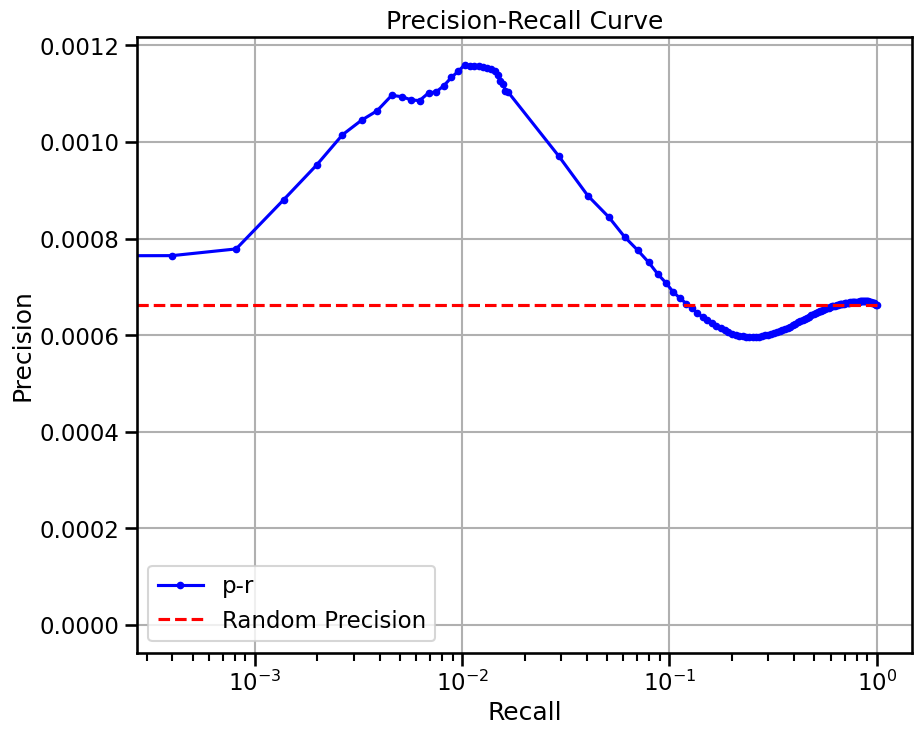


  0%|          | 0/44 [00:00<?, ?it/s]


  2%|▏         | 1/44 [00:02<01:57,  2.74s/it]


  5%|▍         | 2/44 [00:04<01:19,  1.89s/it]


  7%|▋         | 3/44 [00:05<01:05,  1.60s/it]


  9%|▉         | 4/44 [00:06<00:58,  1.46s/it]


 11%|█▏        | 5/44 [00:07<00:54,  1.41s/it]


 14%|█▎        | 6/44 [00:09<00:51,  1.35s/it]


 16%|█▌        | 7/44 [00:10<00:48,  1.31s/it]


 18%|█▊        | 8/44 [00:11<00:45,  1.28s/it]


 20%|██        | 9/44 [00:12<00:44,  1.27s/it]


 23%|██▎       | 10/44 [00:14<00:42,  1.25s/it]


 25%|██▌       | 11/44 [00:15<00:40,  1.22s/it]


 27%|██▋       | 12/44 [00:16<00:38,  1.20s/it]


 30%|██▉       | 13/44 [00:17<00:36,  1.19s/it]


 32%|███▏      | 14/44 [00:18<00:35,  1.18s/it]


 34%|███▍      | 15/44 [00:19<00:34,  1.18s/it]


 36%|███▋      | 16/44 [00:21<00:34,  1.22s/it]


 39%|███▊      | 17/44 [00:22<00:32,  1.21s/it]


 41%|████      | 18/44 [00:23<00:31,  1.23s/it]


 43%|████▎     | 19/44 [00:25<00:32,  1.30s/it]


 45%|████▌     | 20/44 [00:26<00:31,  1.32s/it]


 48%|████▊     | 21/44 [00:28<00:32,  1.42s/it]


 50%|█████     | 22/44 [00:29<00:31,  1.45s/it]


 52%|█████▏    | 23/44 [00:31<00:31,  1.48s/it]


 55%|█████▍    | 24/44 [00:32<00:29,  1.45s/it]


 57%|█████▋    | 25/44 [00:33<00:27,  1.46s/it]


 59%|█████▉    | 26/44 [00:35<00:26,  1.47s/it]


 61%|██████▏   | 27/44 [00:36<00:24,  1.45s/it]


 64%|██████▎   | 28/44 [00:38<00:23,  1.45s/it]


 66%|██████▌   | 29/44 [00:39<00:21,  1.45s/it]


 68%|██████▊   | 30/44 [00:41<00:20,  1.44s/it]


 70%|███████   | 31/44 [00:43<00:21,  1.64s/it]


 73%|███████▎  | 32/44 [00:44<00:18,  1.55s/it]


 75%|███████▌  | 33/44 [00:46<00:18,  1.67s/it]


 77%|███████▋  | 34/44 [00:47<00:15,  1.59s/it]


 80%|███████▉  | 35/44 [00:49<00:13,  1.50s/it]


 82%|████████▏ | 36/44 [00:50<00:11,  1.49s/it]


 84%|████████▍ | 37/44 [00:52<00:10,  1.45s/it]


 86%|████████▋ | 38/44 [00:53<00:08,  1.39s/it]


 89%|████████▊ | 39/44 [00:54<00:07,  1.41s/it]


 91%|█████████ | 40/44 [00:56<00:05,  1.42s/it]


 93%|█████████▎| 41/44 [00:57<00:04,  1.41s/it]


 95%|█████████▌| 42/44 [00:58<00:02,  1.39s/it]


 98%|█████████▊| 43/44 [01:00<00:01,  1.41s/it]


100%|██████████| 44/44 [01:00<00:00,  1.05s/it]


100%|██████████| 44/44 [01:00<00:00,  1.38s/it]

(690, 5000) myofibroblast cell


base enrichment


Top central genes: []
The DataFrame contains only the same values.


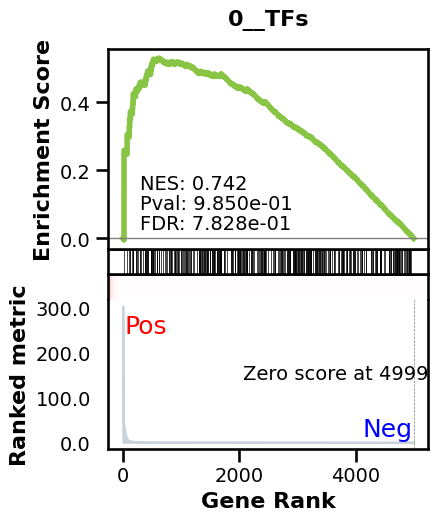

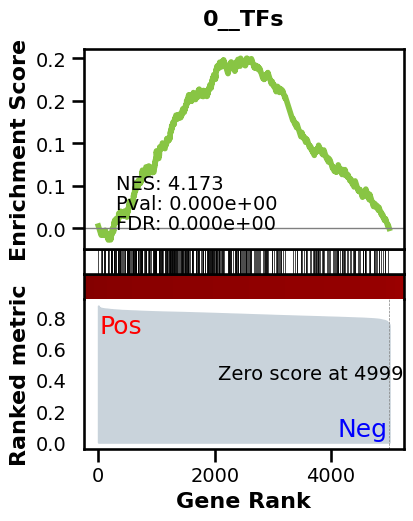

_________________________________________
TF specific enrichment


found some significant results for  17.857142857142858 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0008040620608093005 
recall:  1.0 
random precision: 0.0008042949872463833



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 51.94it/s]


  9%|▉         | 12/128 [00:00<00:02, 52.08it/s]


 14%|█▍        | 18/128 [00:00<00:02, 51.68it/s]


 19%|█▉        | 24/128 [00:00<00:02, 51.52it/s]


 23%|██▎       | 30/128 [00:00<00:01, 51.77it/s]


 28%|██▊       | 36/128 [00:00<00:01, 51.73it/s]


 33%|███▎      | 42/128 [00:00<00:01, 52.70it/s]


 38%|███▊      | 48/128 [00:00<00:01, 52.73it/s]


 42%|████▏     | 54/128 [00:01<00:01, 52.96it/s]


 47%|████▋     | 60/128 [00:01<00:01, 52.61it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 51.75it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 51.40it/s]


 61%|██████    | 78/128 [00:01<00:00, 51.30it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 51.67it/s]


 70%|███████   | 90/128 [00:01<00:00, 51.91it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 51.65it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 51.83it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 52.26it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 52.00it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 51.36it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 50.71it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 51.67it/s]

Average Precision (AP):  0.000928061365459411
Area Under Precision-Recall Curve (AUPRC):  0.0009266000577505981
EPR: 2.078615374620864


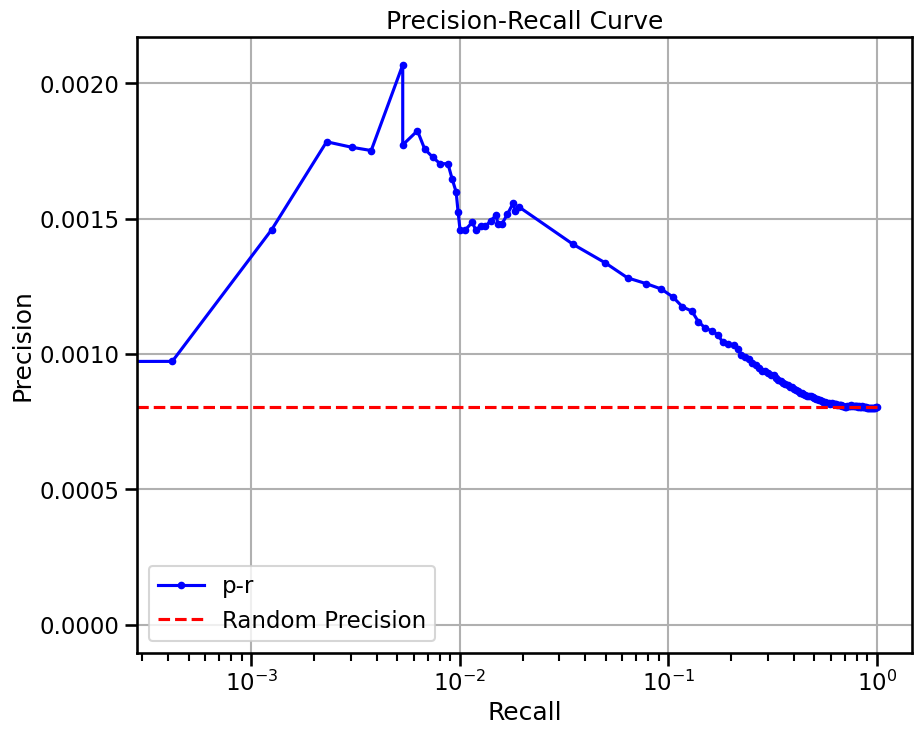

base enrichment


Top central genes: []


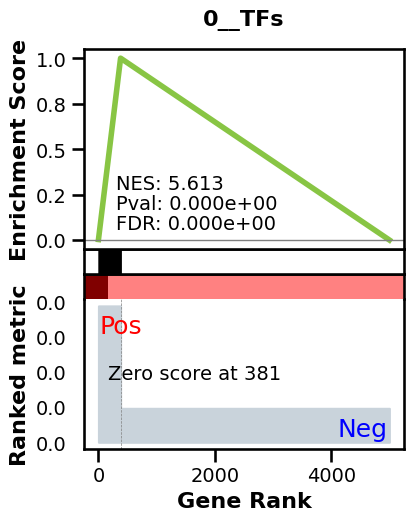

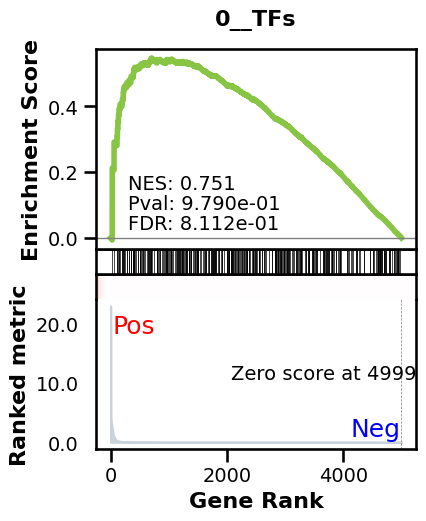

_________________________________________
TF specific enrichment


found some significant results for  10.714285714285714 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0032449520061130707 
recall:  0.3880254511317409 
random precision: 0.0008042949872463833



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.51it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.90it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.99it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.56it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.22it/s]


 28%|██▊       | 36/128 [00:00<00:01, 52.80it/s]


 33%|███▎      | 42/128 [00:00<00:01, 50.59it/s]


 38%|███▊      | 48/128 [00:00<00:01, 49.27it/s]


 41%|████▏     | 53/128 [00:01<00:01, 49.17it/s]


 46%|████▌     | 59/128 [00:01<00:01, 49.80it/s]


 50%|█████     | 64/128 [00:01<00:01, 49.27it/s]


 54%|█████▍    | 69/128 [00:01<00:01, 48.70it/s]


 58%|█████▊    | 74/128 [00:01<00:01, 48.04it/s]


 62%|██████▏   | 79/128 [00:01<00:01, 47.63it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 49.17it/s]


 71%|███████   | 91/128 [00:01<00:00, 50.41it/s]


 76%|███████▌  | 97/128 [00:01<00:00, 50.04it/s]


 80%|████████  | 103/128 [00:02<00:00, 50.62it/s]


 85%|████████▌ | 109/128 [00:02<00:00, 51.32it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 51.88it/s]


 95%|█████████▍| 121/128 [00:02<00:00, 52.41it/s]


 99%|█████████▉| 127/128 [00:02<00:00, 52.38it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 51.12it/s]

Average Precision (AP):  0.0022310567248462697
Area Under Precision-Recall Curve (AUPRC):  0.0019773097151613308
EPR: 6.9389811822055245


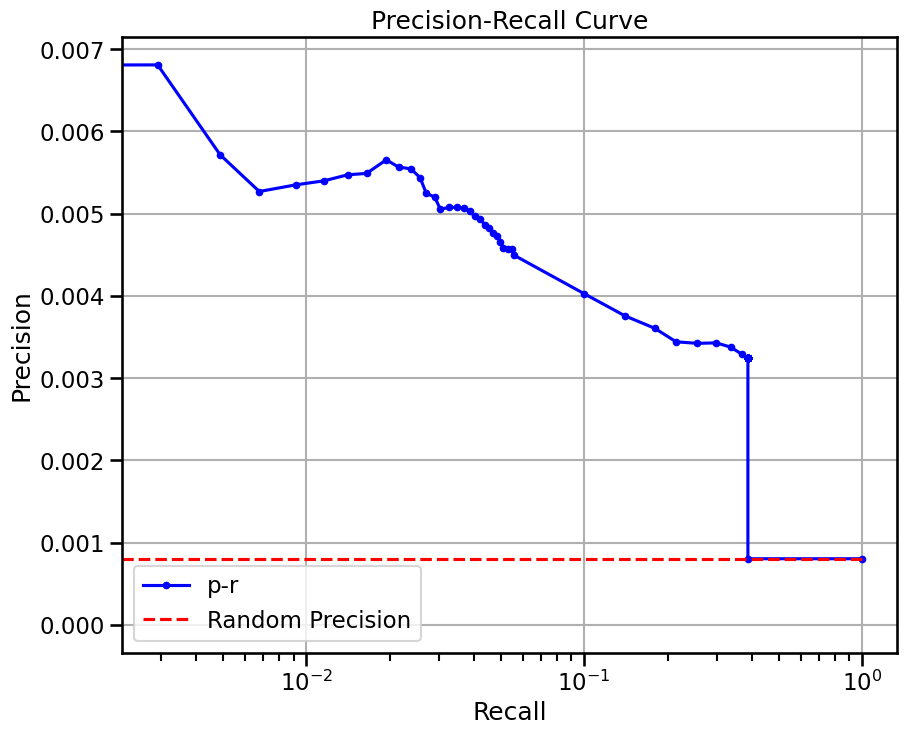

base enrichment


Top central genes: []
The DataFrame contains only the same values.


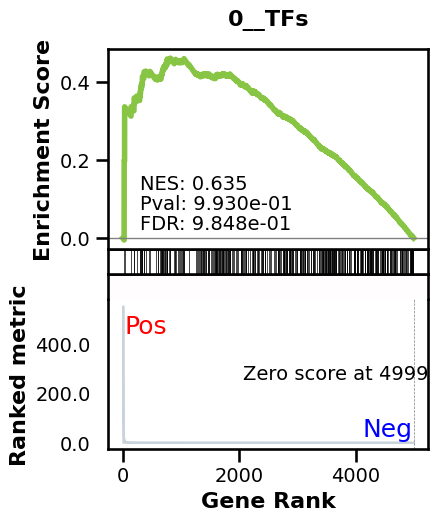

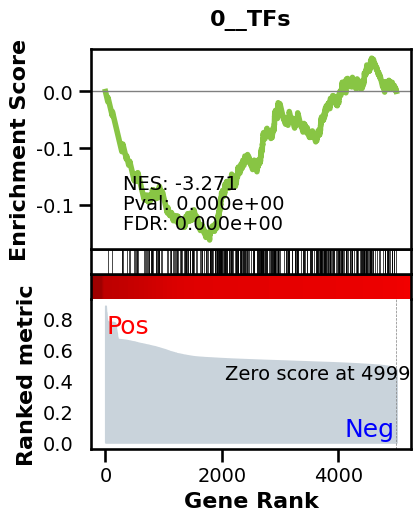

_________________________________________
TF specific enrichment


found some significant results for  17.857142857142858 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0008040620608093005 
recall:  1.0 
random precision: 0.0008042949872463833



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 49.11it/s]


  8%|▊         | 10/128 [00:00<00:02, 49.55it/s]


 12%|█▎        | 16/128 [00:00<00:02, 50.58it/s]


 17%|█▋        | 22/128 [00:00<00:02, 51.37it/s]


 22%|██▏       | 28/128 [00:00<00:01, 52.52it/s]


 27%|██▋       | 34/128 [00:00<00:01, 53.56it/s]


 31%|███▏      | 40/128 [00:00<00:01, 53.99it/s]


 36%|███▌      | 46/128 [00:00<00:01, 53.86it/s]


 41%|████      | 52/128 [00:00<00:01, 54.10it/s]


 45%|████▌     | 58/128 [00:01<00:01, 53.33it/s]


 50%|█████     | 64/128 [00:01<00:01, 52.97it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 52.45it/s]


 59%|█████▉    | 76/128 [00:01<00:01, 51.76it/s]


 64%|██████▍   | 82/128 [00:01<00:00, 51.44it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 51.48it/s]


 73%|███████▎  | 94/128 [00:01<00:00, 51.18it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 51.75it/s]


 83%|████████▎ | 106/128 [00:02<00:00, 52.30it/s]


 88%|████████▊ | 112/128 [00:02<00:00, 52.58it/s]


 92%|█████████▏| 118/128 [00:02<00:00, 52.72it/s]


 97%|█████████▋| 124/128 [00:02<00:00, 52.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 52.40it/s]

Average Precision (AP):  0.0009400230130255209
Area Under Precision-Recall Curve (AUPRC):  0.0009379797835494664
EPR: 4.433725518754921


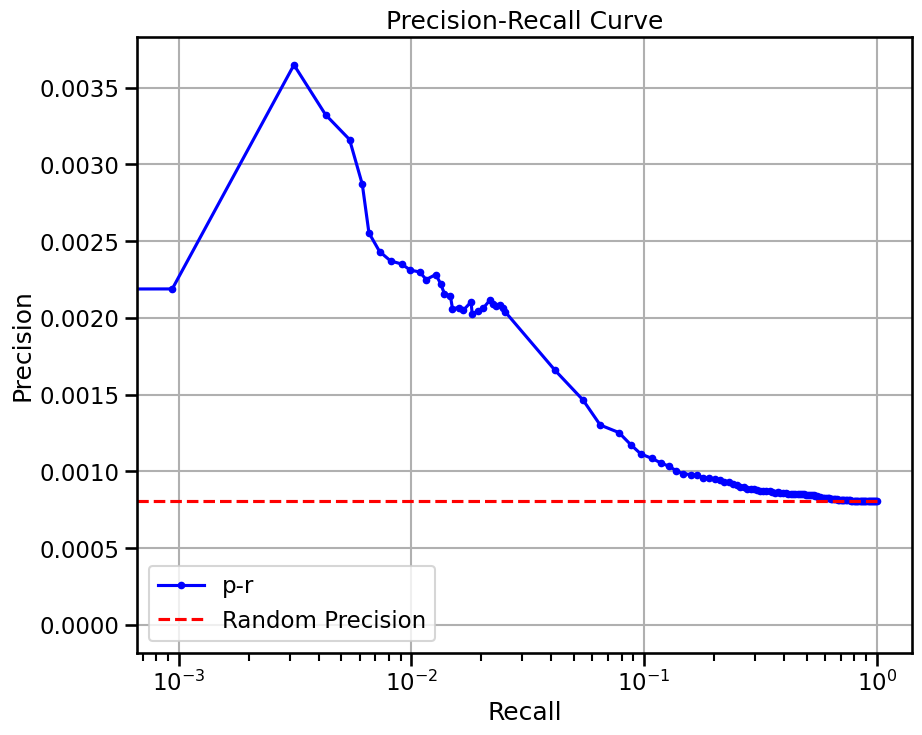

base enrichment


Top central genes: []


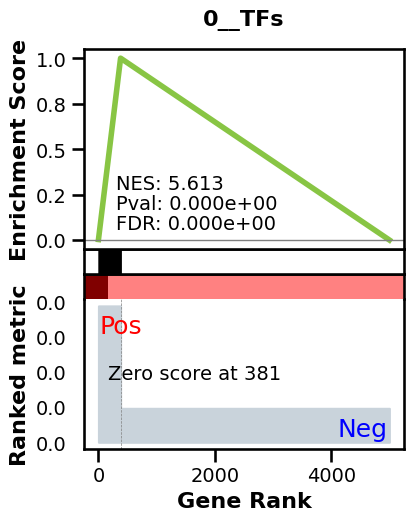

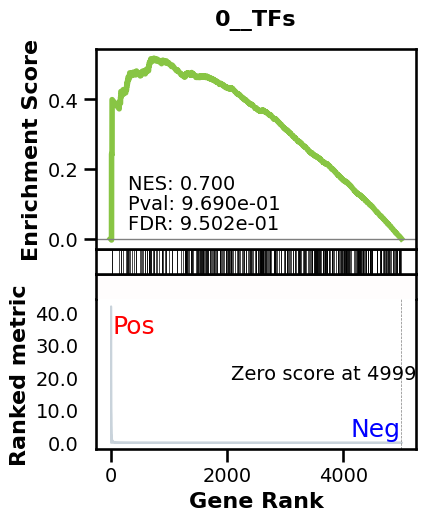

_________________________________________
TF specific enrichment


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0032449520061130707 
recall:  0.3880254511317409 
random precision: 0.0008042949872463833



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 51.19it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.10it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.32it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.97it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.47it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.73it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.67it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.46it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.65it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.13it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 52.90it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 51.87it/s]


 61%|██████    | 78/128 [00:01<00:00, 51.53it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 51.54it/s]


 70%|███████   | 90/128 [00:01<00:00, 51.51it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 51.27it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 51.08it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 50.82it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 51.63it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 52.47it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 52.99it/s]

Average Precision (AP):  0.0021603283105083486
Area Under Precision-Recall Curve (AUPRC):  0.0018856446754858566
EPR: 8.26555987517377


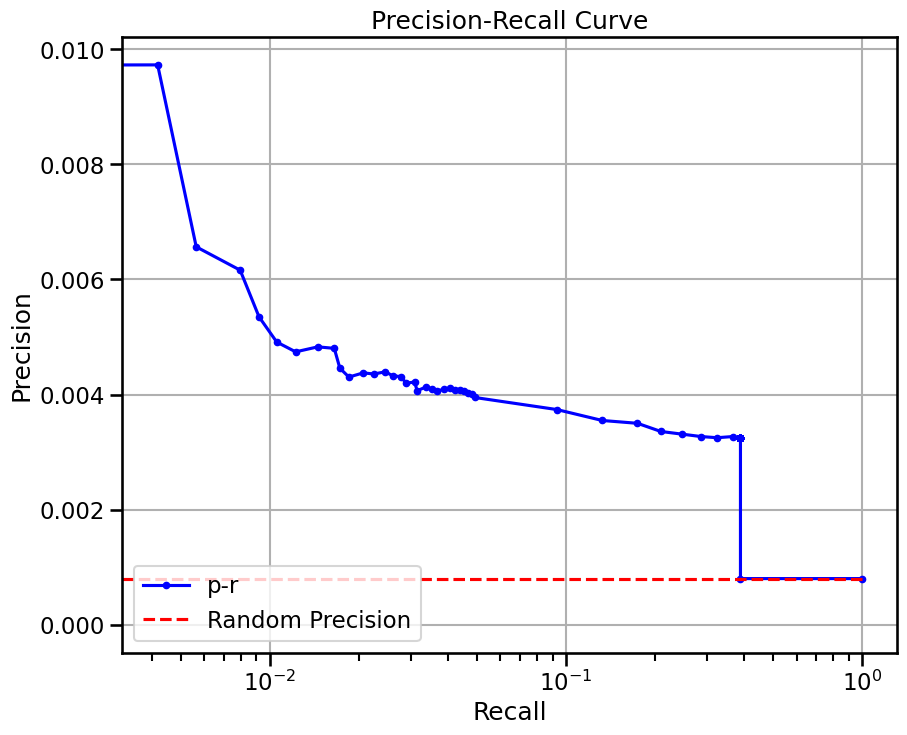


  0%|          | 0/12 [00:00<?, ?it/s]


  8%|▊         | 1/12 [00:02<00:22,  2.04s/it]


 17%|█▋        | 2/12 [00:02<00:13,  1.36s/it]


 25%|██▌       | 3/12 [00:03<00:10,  1.15s/it]


 33%|███▎      | 4/12 [00:04<00:08,  1.04s/it]


 42%|████▏     | 5/12 [00:05<00:06,  1.02it/s]


 50%|█████     | 6/12 [00:06<00:05,  1.07it/s]


 58%|█████▊    | 7/12 [00:07<00:04,  1.09it/s]


 67%|██████▋   | 8/12 [00:08<00:03,  1.11it/s]


 75%|███████▌  | 9/12 [00:09<00:02,  1.12it/s]


 83%|████████▎ | 10/12 [00:09<00:01,  1.12it/s]


 92%|█████████▏| 11/12 [00:10<00:00,  1.14it/s]


100%|██████████| 12/12 [00:11<00:00,  1.19it/s]


100%|██████████| 12/12 [00:11<00:00,  1.02it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


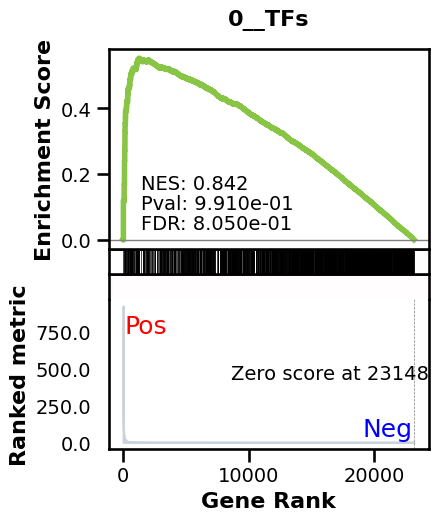

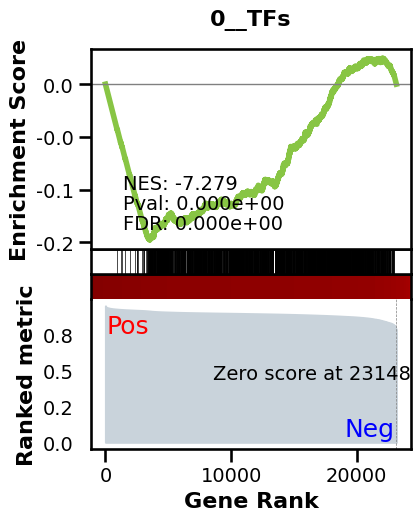

_________________________________________
TF specific enrichment


found some significant results for  60.714285714285715 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:40,  3.14it/s]


  2%|▏         | 2/128 [00:00<00:40,  3.11it/s]


  2%|▏         | 3/128 [00:00<00:42,  2.97it/s]


  3%|▎         | 4/128 [00:01<00:42,  2.95it/s]


  4%|▍         | 5/128 [00:01<00:42,  2.91it/s]


  5%|▍         | 6/128 [00:02<00:41,  2.94it/s]


  5%|▌         | 7/128 [00:02<00:40,  2.95it/s]


  6%|▋         | 8/128 [00:02<00:40,  2.99it/s]


  7%|▋         | 9/128 [00:03<00:40,  2.96it/s]


  8%|▊         | 10/128 [00:03<00:40,  2.88it/s]


  9%|▊         | 11/128 [00:03<00:40,  2.92it/s]


  9%|▉         | 12/128 [00:04<00:39,  2.91it/s]


 10%|█         | 13/128 [00:04<00:38,  2.95it/s]


 11%|█         | 14/128 [00:04<00:38,  2.98it/s]


 12%|█▏        | 15/128 [00:05<00:38,  2.96it/s]


 12%|█▎        | 16/128 [00:05<00:37,  2.99it/s]


 13%|█▎        | 17/128 [00:05<00:37,  2.95it/s]


 14%|█▍        | 18/128 [00:06<00:37,  2.91it/s]


 15%|█▍        | 19/128 [00:06<00:36,  2.97it/s]


 16%|█▌        | 20/128 [00:06<00:36,  2.99it/s]


 16%|█▋        | 21/128 [00:07<00:35,  3.01it/s]


 17%|█▋        | 22/128 [00:07<00:35,  3.00it/s]


 18%|█▊        | 23/128 [00:07<00:35,  2.97it/s]


 19%|█▉        | 24/128 [00:08<00:35,  2.94it/s]


 20%|█▉        | 25/128 [00:08<00:34,  2.97it/s]


 20%|██        | 26/128 [00:08<00:34,  2.95it/s]


 21%|██        | 27/128 [00:09<00:34,  2.97it/s]


 22%|██▏       | 28/128 [00:09<00:33,  2.96it/s]


 23%|██▎       | 29/128 [00:09<00:33,  2.95it/s]


 23%|██▎       | 30/128 [00:10<00:33,  2.94it/s]


 24%|██▍       | 31/128 [00:10<00:32,  2.95it/s]


 25%|██▌       | 32/128 [00:10<00:32,  2.98it/s]


 26%|██▌       | 33/128 [00:11<00:31,  3.01it/s]


 27%|██▋       | 34/128 [00:11<00:31,  2.96it/s]


 27%|██▋       | 35/128 [00:11<00:31,  2.93it/s]


 28%|██▊       | 36/128 [00:12<00:31,  2.92it/s]


 29%|██▉       | 37/128 [00:12<00:30,  2.99it/s]


 30%|██▉       | 38/128 [00:12<00:29,  3.02it/s]


 30%|███       | 39/128 [00:13<00:29,  2.98it/s]


 31%|███▏      | 40/128 [00:13<00:30,  2.91it/s]


 32%|███▏      | 41/128 [00:13<00:30,  2.89it/s]


 33%|███▎      | 42/128 [00:14<00:29,  2.95it/s]


 34%|███▎      | 43/128 [00:14<00:28,  2.98it/s]


 34%|███▍      | 44/128 [00:14<00:27,  3.00it/s]


 35%|███▌      | 45/128 [00:15<00:27,  2.97it/s]


 36%|███▌      | 46/128 [00:15<00:28,  2.93it/s]


 37%|███▋      | 47/128 [00:15<00:27,  2.90it/s]


 38%|███▊      | 48/128 [00:16<00:27,  2.93it/s]


 38%|███▊      | 49/128 [00:16<00:26,  2.94it/s]


 39%|███▉      | 50/128 [00:16<00:26,  2.92it/s]


 40%|███▉      | 51/128 [00:17<00:25,  2.96it/s]


 41%|████      | 52/128 [00:17<00:25,  2.99it/s]


 41%|████▏     | 53/128 [00:17<00:24,  3.01it/s]


 42%|████▏     | 54/128 [00:18<00:24,  3.05it/s]


 43%|████▎     | 55/128 [00:18<00:24,  3.00it/s]


 44%|████▍     | 56/128 [00:18<00:24,  2.98it/s]


 45%|████▍     | 57/128 [00:19<00:24,  2.94it/s]


 45%|████▌     | 58/128 [00:19<00:23,  3.02it/s]


 46%|████▌     | 59/128 [00:19<00:22,  3.05it/s]


 47%|████▋     | 60/128 [00:20<00:22,  3.01it/s]


 48%|████▊     | 61/128 [00:20<00:22,  3.02it/s]


 48%|████▊     | 62/128 [00:20<00:22,  3.00it/s]


 49%|████▉     | 63/128 [00:21<00:21,  3.01it/s]


 50%|█████     | 64/128 [00:21<00:20,  3.06it/s]


 51%|█████     | 65/128 [00:21<00:20,  3.07it/s]


 52%|█████▏    | 66/128 [00:22<00:20,  3.10it/s]


 52%|█████▏    | 67/128 [00:22<00:19,  3.06it/s]


 53%|█████▎    | 68/128 [00:22<00:19,  3.05it/s]


 54%|█████▍    | 69/128 [00:23<00:19,  3.08it/s]


 55%|█████▍    | 70/128 [00:23<00:18,  3.12it/s]


 55%|█████▌    | 71/128 [00:23<00:18,  3.14it/s]


 56%|█████▋    | 72/128 [00:24<00:17,  3.12it/s]


 57%|█████▋    | 73/128 [00:24<00:17,  3.08it/s]


 58%|█████▊    | 74/128 [00:24<00:17,  3.10it/s]


 59%|█████▊    | 75/128 [00:25<00:16,  3.14it/s]


 59%|█████▉    | 76/128 [00:25<00:16,  3.15it/s]


 60%|██████    | 77/128 [00:25<00:16,  3.15it/s]


 61%|██████    | 78/128 [00:26<00:16,  3.11it/s]


 62%|██████▏   | 79/128 [00:26<00:15,  3.11it/s]


 62%|██████▎   | 80/128 [00:26<00:15,  3.15it/s]


 63%|██████▎   | 81/128 [00:26<00:14,  3.19it/s]


 64%|██████▍   | 82/128 [00:27<00:14,  3.19it/s]


 65%|██████▍   | 83/128 [00:27<00:14,  3.11it/s]


 66%|██████▌   | 84/128 [00:27<00:14,  3.09it/s]


 66%|██████▋   | 85/128 [00:28<00:13,  3.16it/s]


 67%|██████▋   | 86/128 [00:28<00:13,  3.19it/s]


 68%|██████▊   | 87/128 [00:28<00:12,  3.20it/s]


 69%|██████▉   | 88/128 [00:29<00:12,  3.19it/s]


 70%|██████▉   | 89/128 [00:29<00:12,  3.14it/s]


 70%|███████   | 90/128 [00:29<00:12,  3.13it/s]


 71%|███████   | 91/128 [00:30<00:11,  3.17it/s]


 72%|███████▏  | 92/128 [00:30<00:11,  3.21it/s]


 73%|███████▎  | 93/128 [00:30<00:10,  3.19it/s]


 73%|███████▎  | 94/128 [00:31<00:10,  3.16it/s]


 74%|███████▍  | 95/128 [00:31<00:10,  3.12it/s]


 75%|███████▌  | 96/128 [00:31<00:10,  3.15it/s]


 76%|███████▌  | 97/128 [00:32<00:09,  3.18it/s]


 77%|███████▋  | 98/128 [00:32<00:09,  3.15it/s]


 77%|███████▋  | 99/128 [00:32<00:09,  3.00it/s]


 78%|███████▊  | 100/128 [00:33<00:09,  2.93it/s]


 79%|███████▉  | 101/128 [00:33<00:09,  2.89it/s]


 80%|███████▉  | 102/128 [00:33<00:08,  2.93it/s]


 80%|████████  | 103/128 [00:34<00:08,  2.98it/s]


 81%|████████▏ | 104/128 [00:34<00:08,  2.97it/s]


 82%|████████▏ | 105/128 [00:34<00:07,  2.96it/s]


 83%|████████▎ | 106/128 [00:35<00:07,  2.92it/s]


 84%|████████▎ | 107/128 [00:35<00:07,  2.87it/s]


 84%|████████▍ | 108/128 [00:35<00:06,  2.90it/s]


 85%|████████▌ | 109/128 [00:36<00:06,  3.00it/s]


 86%|████████▌ | 110/128 [00:36<00:06,  2.98it/s]


 87%|████████▋ | 111/128 [00:36<00:05,  2.95it/s]


 88%|████████▊ | 112/128 [00:37<00:05,  2.91it/s]


 88%|████████▊ | 113/128 [00:37<00:05,  2.89it/s]


 89%|████████▉ | 114/128 [00:37<00:04,  2.87it/s]


 90%|████████▉ | 115/128 [00:38<00:04,  2.95it/s]


 91%|█████████ | 116/128 [00:38<00:04,  2.98it/s]


 91%|█████████▏| 117/128 [00:38<00:03,  2.93it/s]


 92%|█████████▏| 118/128 [00:39<00:03,  2.91it/s]


 93%|█████████▎| 119/128 [00:39<00:03,  2.88it/s]


 94%|█████████▍| 120/128 [00:39<00:02,  2.88it/s]


 95%|█████████▍| 121/128 [00:40<00:02,  2.95it/s]


 95%|█████████▌| 122/128 [00:40<00:02,  2.94it/s]


 96%|█████████▌| 123/128 [00:40<00:01,  2.95it/s]


 97%|█████████▋| 124/128 [00:41<00:01,  2.90it/s]


 98%|█████████▊| 125/128 [00:41<00:01,  2.86it/s]


 98%|█████████▊| 126/128 [00:41<00:00,  2.90it/s]


 99%|█████████▉| 127/128 [00:42<00:00,  2.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:42<00:00,  2.96it/s]


100%|██████████| 128/128 [00:42<00:00,  3.00it/s]

Average Precision (AP):  0.0007024511832970315
Area Under Precision-Recall Curve (AUPRC):  0.0007025016309962732


EPR: 1.511494174588256


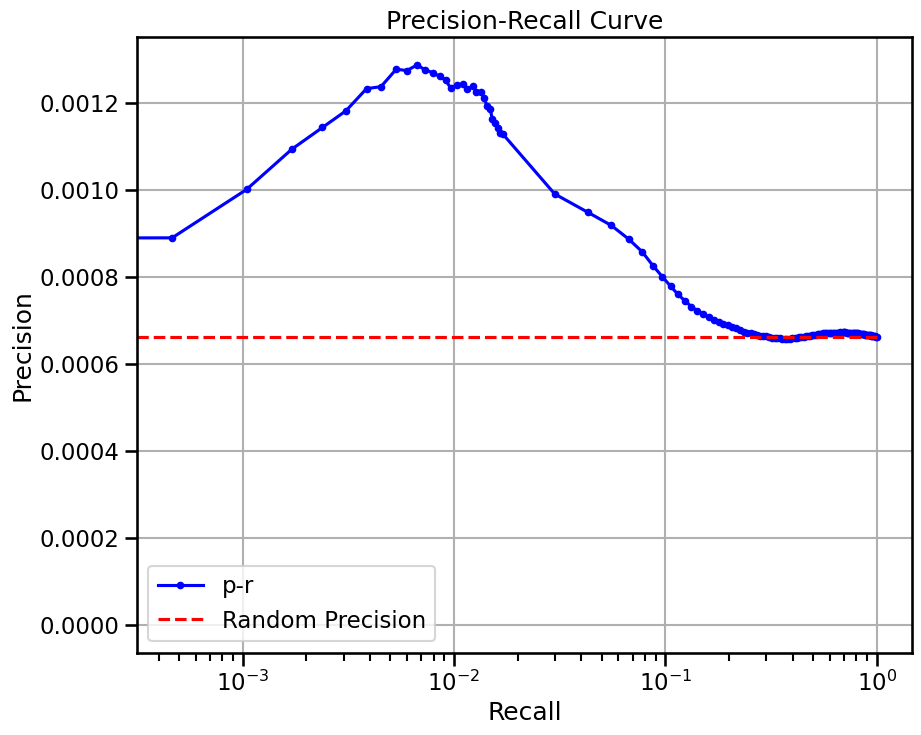


  0%|          | 0/24 [00:00<?, ?it/s]


  4%|▍         | 1/24 [00:02<01:02,  2.71s/it]


  8%|▊         | 2/24 [00:03<00:33,  1.54s/it]


 12%|█▎        | 3/24 [00:04<00:24,  1.16s/it]


 17%|█▋        | 4/24 [00:04<00:19,  1.01it/s]


 21%|██        | 5/24 [00:05<00:16,  1.13it/s]


 25%|██▌       | 6/24 [00:06<00:14,  1.20it/s]


 29%|██▉       | 7/24 [00:07<00:13,  1.26it/s]


 33%|███▎      | 8/24 [00:07<00:12,  1.30it/s]


 38%|███▊      | 9/24 [00:08<00:11,  1.34it/s]


 42%|████▏     | 10/24 [00:09<00:10,  1.35it/s]


 46%|████▌     | 11/24 [00:09<00:09,  1.38it/s]


 50%|█████     | 12/24 [00:10<00:08,  1.37it/s]


 54%|█████▍    | 13/24 [00:11<00:07,  1.39it/s]


 58%|█████▊    | 14/24 [00:11<00:07,  1.40it/s]


 62%|██████▎   | 15/24 [00:12<00:06,  1.39it/s]


 67%|██████▋   | 16/24 [00:13<00:05,  1.40it/s]


 71%|███████   | 17/24 [00:14<00:04,  1.41it/s]


 75%|███████▌  | 18/24 [00:14<00:04,  1.39it/s]


 79%|███████▉  | 19/24 [00:15<00:03,  1.41it/s]


 83%|████████▎ | 20/24 [00:16<00:02,  1.40it/s]


 88%|████████▊ | 21/24 [00:16<00:02,  1.40it/s]


 92%|█████████▏| 22/24 [00:17<00:01,  1.42it/s]


 96%|█████████▌| 23/24 [00:18<00:00,  1.42it/s]


100%|██████████| 24/24 [00:18<00:00,  1.55it/s]


100%|██████████| 24/24 [00:19<00:00,  1.26it/s]

(379, 3145) glial cell


base enrichment


Top central genes: []
The DataFrame contains only the same values.


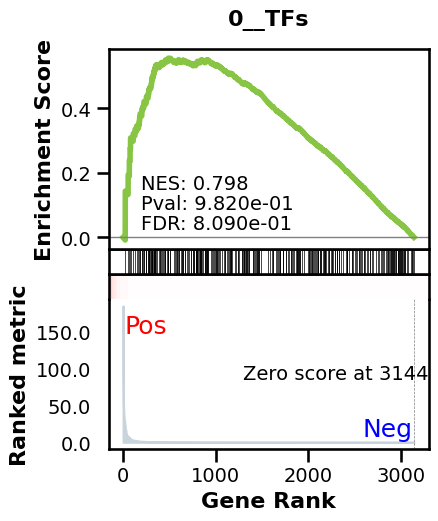

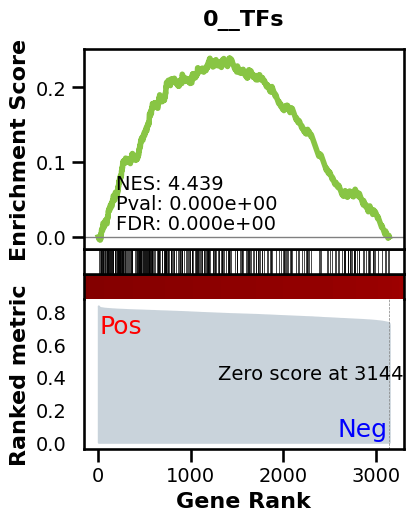

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2155 genes
intersection pct: 0.685214626391097
precision:  0.0009412094034808167 
recall:  1.0 
random precision: 0.0009416463623496565



  0%|          | 0/128 [00:00<?, ?it/s]


 12%|█▏        | 15/128 [00:00<00:00, 147.43it/s]


 23%|██▎       | 30/128 [00:00<00:00, 146.66it/s]


 35%|███▌      | 45/128 [00:00<00:00, 145.67it/s]


 47%|████▋     | 60/128 [00:00<00:00, 146.24it/s]


 59%|█████▊    | 75/128 [00:00<00:00, 145.41it/s]


 70%|███████   | 90/128 [00:00<00:00, 146.41it/s]


 82%|████████▏ | 105/128 [00:00<00:00, 146.71it/s]


 94%|█████████▍| 120/128 [00:00<00:00, 146.92it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 146.28it/s]

Average Precision (AP):  0.0010870584883288666
Area Under Precision-Recall Curve (AUPRC):  0.001078758725982031
EPR: 2.926058007520809


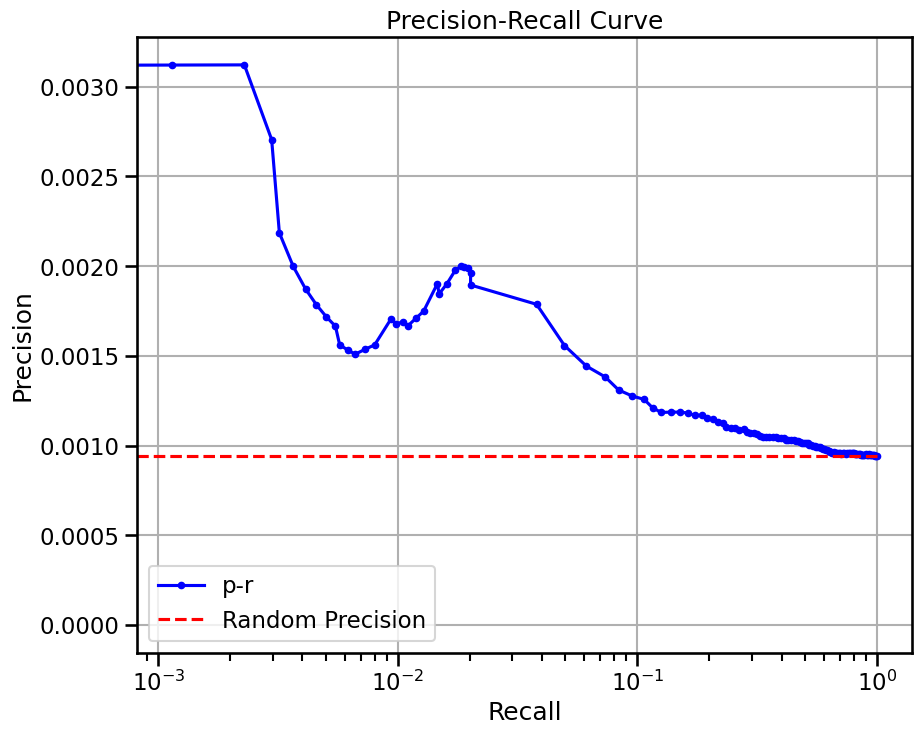

base enrichment


Top central genes: []


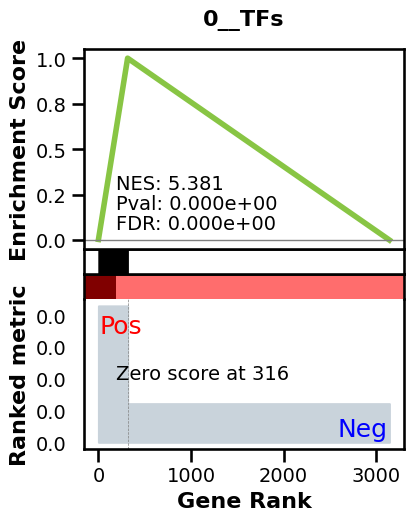

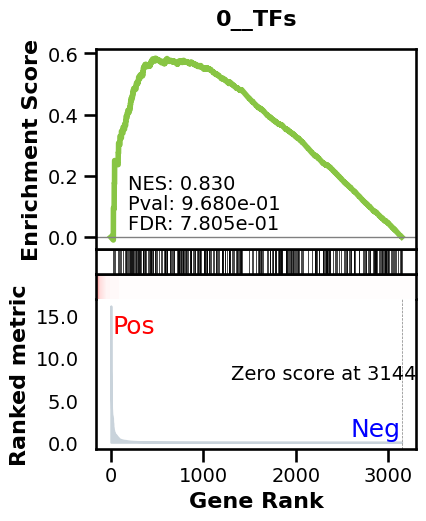

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2155 genes
intersection pct: 0.685214626391097
precision:  0.0037479921470640726 
recall:  0.5044612216884008 
random precision: 0.0009416463623496565



  0%|          | 0/128 [00:00<?, ?it/s]


 12%|█▏        | 15/128 [00:00<00:00, 149.25it/s]


 23%|██▎       | 30/128 [00:00<00:00, 149.38it/s]


 35%|███▌      | 45/128 [00:00<00:00, 149.27it/s]


 48%|████▊     | 61/128 [00:00<00:00, 149.90it/s]


 60%|██████    | 77/128 [00:00<00:00, 150.97it/s]


 73%|███████▎  | 93/128 [00:00<00:00, 151.80it/s]


 85%|████████▌ | 109/128 [00:00<00:00, 151.42it/s]


 98%|█████████▊| 125/128 [00:00<00:00, 150.31it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 150.13it/s]

Average Precision (AP):  0.0029375108579160506
Area Under Precision-Recall Curve (AUPRC):  0.0026008504056914527
EPR: 9.12644575925879


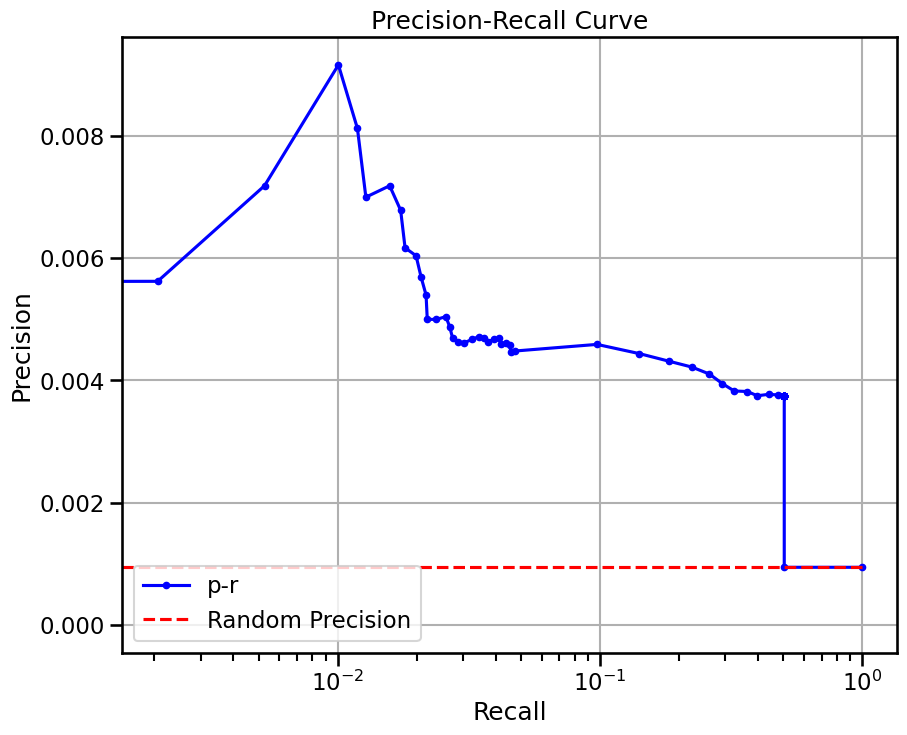

base enrichment


Top central genes: []
The DataFrame contains only the same values.


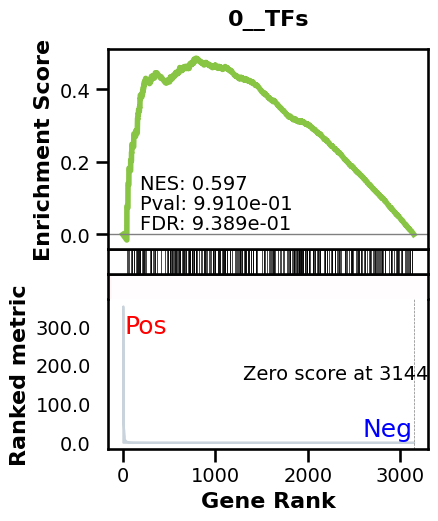

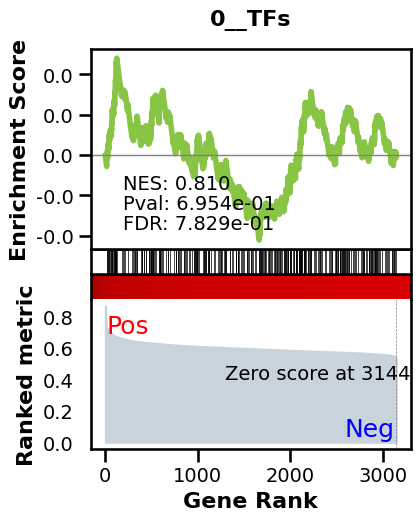

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2155 genes
intersection pct: 0.685214626391097
precision:  0.0009412094034808167 
recall:  1.0 
random precision: 0.0009416463623496565



  0%|          | 0/128 [00:00<?, ?it/s]


 12%|█▎        | 16/128 [00:00<00:00, 151.45it/s]


 25%|██▌       | 32/128 [00:00<00:00, 150.45it/s]


 38%|███▊      | 48/128 [00:00<00:00, 149.99it/s]


 49%|████▉     | 63/128 [00:00<00:00, 149.77it/s]


 62%|██████▏   | 79/128 [00:00<00:00, 150.43it/s]


 74%|███████▍  | 95/128 [00:00<00:00, 151.05it/s]


 87%|████████▋ | 111/128 [00:00<00:00, 151.39it/s]


 99%|█████████▉| 127/128 [00:00<00:00, 151.30it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 150.66it/s]

Average Precision (AP):  0.0011649312860322902
Area Under Precision-Recall Curve (AUPRC):  0.0011603931554352933
EPR: 4.894721681947173


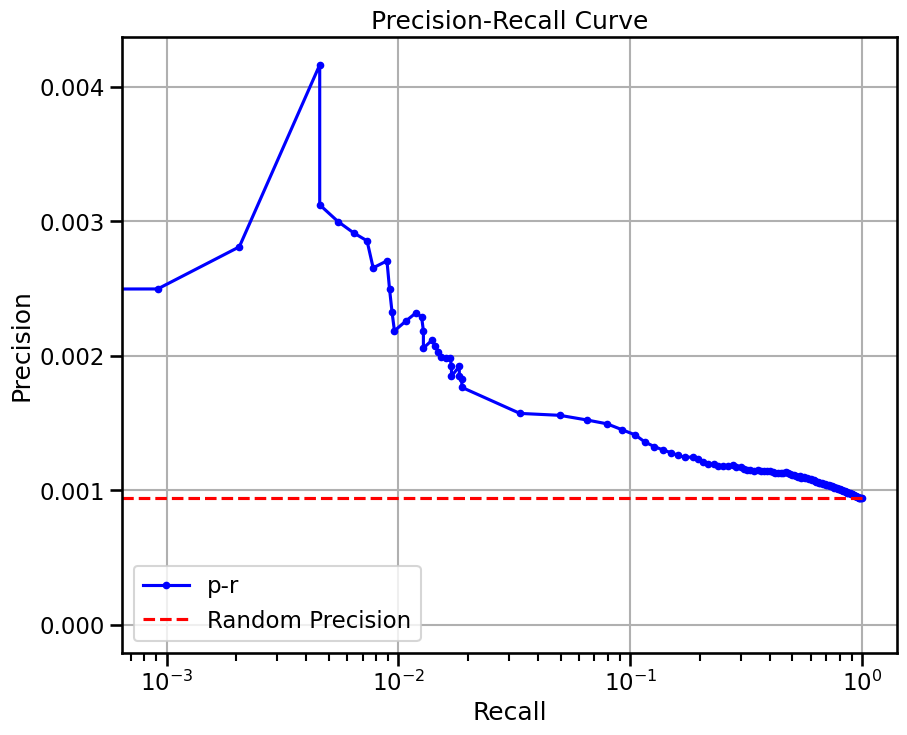

base enrichment


Top central genes: []


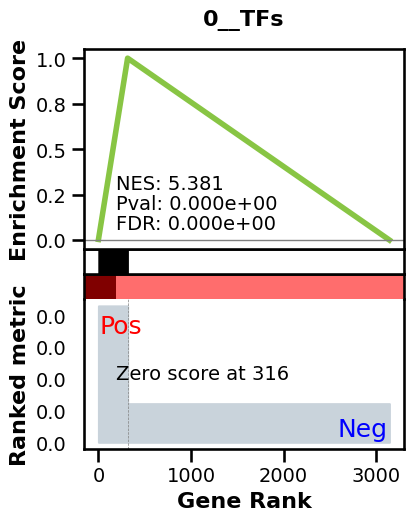

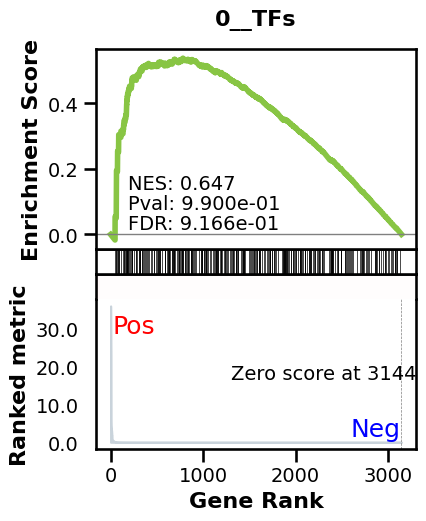

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2155 genes
intersection pct: 0.685214626391097
precision:  0.0037479921470640726 
recall:  0.5044612216884008 
random precision: 0.0009416463623496565



  0%|          | 0/128 [00:00<?, ?it/s]


 11%|█         | 14/128 [00:00<00:00, 132.36it/s]


 22%|██▏       | 28/128 [00:00<00:00, 131.91it/s]


 33%|███▎      | 42/128 [00:00<00:00, 133.34it/s]


 44%|████▍     | 56/128 [00:00<00:00, 133.90it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 133.74it/s]


 66%|██████▌   | 84/128 [00:00<00:00, 133.19it/s]


 77%|███████▋  | 98/128 [00:00<00:00, 131.09it/s]


 88%|████████▊ | 112/128 [00:00<00:00, 131.42it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 131.28it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 131.91it/s]

Average Precision (AP):  0.003475153098553542
Area Under Precision-Recall Curve (AUPRC):  0.0031249468161075366
EPR: 9.880107547031301


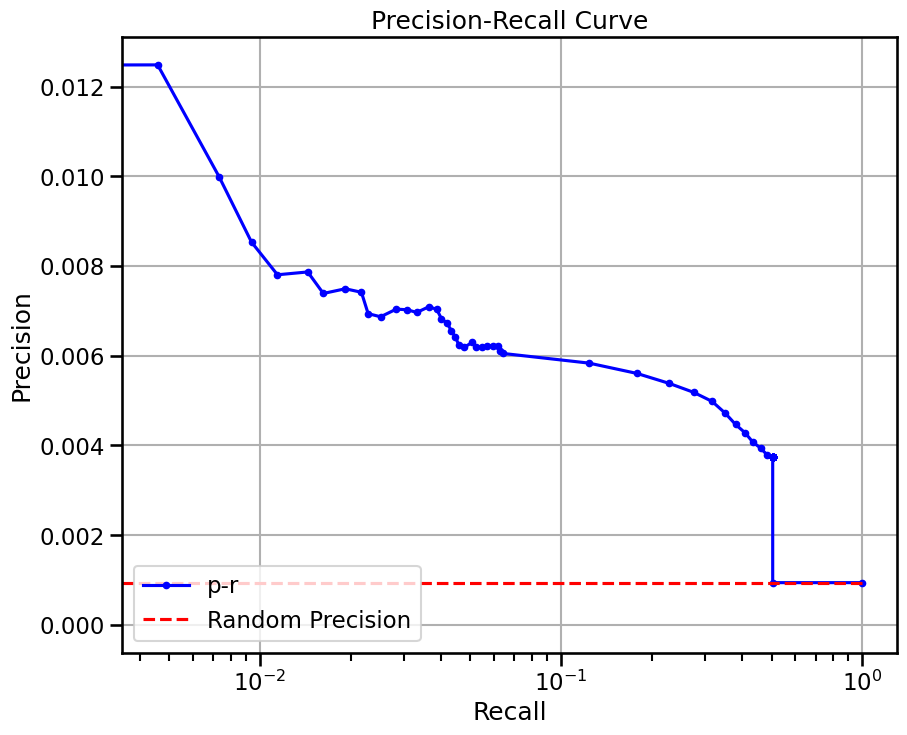


  0%|          | 0/8 [00:00<?, ?it/s]


 12%|█▎        | 1/8 [00:02<00:15,  2.28s/it]


 25%|██▌       | 2/8 [00:03<00:08,  1.41s/it]


 38%|███▊      | 3/8 [00:03<00:05,  1.13s/it]


 50%|█████     | 4/8 [00:04<00:04,  1.00s/it]


 62%|██████▎   | 5/8 [00:05<00:02,  1.08it/s]


 75%|███████▌  | 6/8 [00:06<00:01,  1.13it/s]


 88%|████████▊ | 7/8 [00:07<00:00,  1.17it/s]


100%|██████████| 8/8 [00:07<00:00,  1.26it/s]


100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


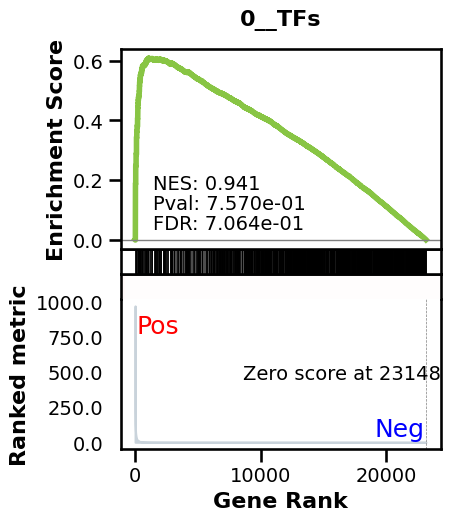

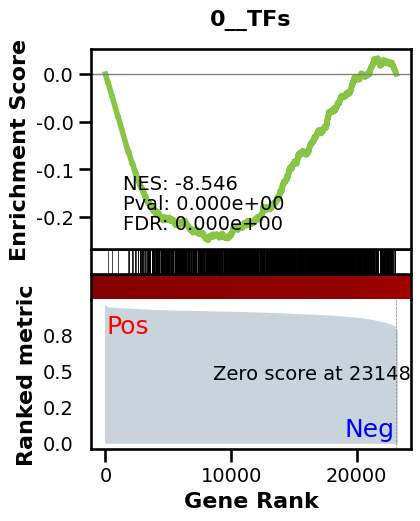

_________________________________________
TF specific enrichment


found some significant results for  53.57142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:38,  3.27it/s]


  2%|▏         | 2/128 [00:00<00:38,  3.30it/s]


  2%|▏         | 3/128 [00:00<00:37,  3.29it/s]


  3%|▎         | 4/128 [00:01<00:37,  3.31it/s]


  4%|▍         | 5/128 [00:01<00:37,  3.30it/s]


  5%|▍         | 6/128 [00:01<00:37,  3.30it/s]


  5%|▌         | 7/128 [00:02<00:36,  3.29it/s]


  6%|▋         | 8/128 [00:02<00:36,  3.29it/s]


  7%|▋         | 9/128 [00:02<00:36,  3.30it/s]


  8%|▊         | 10/128 [00:03<00:35,  3.30it/s]


  9%|▊         | 11/128 [00:03<00:35,  3.28it/s]


  9%|▉         | 12/128 [00:03<00:35,  3.28it/s]


 10%|█         | 13/128 [00:03<00:34,  3.30it/s]


 11%|█         | 14/128 [00:04<00:34,  3.30it/s]


 12%|█▏        | 15/128 [00:04<00:34,  3.31it/s]


 12%|█▎        | 16/128 [00:04<00:34,  3.27it/s]


 13%|█▎        | 17/128 [00:05<00:33,  3.28it/s]


 14%|█▍        | 18/128 [00:05<00:33,  3.30it/s]


 15%|█▍        | 19/128 [00:05<00:33,  3.29it/s]


 16%|█▌        | 20/128 [00:06<00:32,  3.29it/s]


 16%|█▋        | 21/128 [00:06<00:32,  3.28it/s]


 17%|█▋        | 22/128 [00:06<00:32,  3.30it/s]


 18%|█▊        | 23/128 [00:06<00:31,  3.29it/s]


 19%|█▉        | 24/128 [00:07<00:31,  3.29it/s]


 20%|█▉        | 25/128 [00:07<00:31,  3.26it/s]


 20%|██        | 26/128 [00:07<00:31,  3.27it/s]


 21%|██        | 27/128 [00:08<00:30,  3.29it/s]


 22%|██▏       | 28/128 [00:08<00:30,  3.29it/s]


 23%|██▎       | 29/128 [00:08<00:29,  3.30it/s]


 23%|██▎       | 30/128 [00:09<00:29,  3.29it/s]


 24%|██▍       | 31/128 [00:09<00:29,  3.29it/s]


 25%|██▌       | 32/128 [00:09<00:29,  3.31it/s]


 26%|██▌       | 33/128 [00:10<00:28,  3.31it/s]


 27%|██▋       | 34/128 [00:10<00:28,  3.31it/s]


 27%|██▋       | 35/128 [00:10<00:28,  3.28it/s]


 28%|██▊       | 36/128 [00:10<00:28,  3.27it/s]


 29%|██▉       | 37/128 [00:11<00:27,  3.28it/s]


 30%|██▉       | 38/128 [00:11<00:27,  3.30it/s]


 30%|███       | 39/128 [00:11<00:26,  3.31it/s]


 31%|███▏      | 40/128 [00:12<00:26,  3.28it/s]


 32%|███▏      | 41/128 [00:12<00:26,  3.29it/s]


 33%|███▎      | 42/128 [00:12<00:26,  3.29it/s]


 34%|███▎      | 43/128 [00:13<00:25,  3.30it/s]


 34%|███▍      | 44/128 [00:13<00:25,  3.29it/s]


 35%|███▌      | 45/128 [00:13<00:25,  3.29it/s]


 36%|███▌      | 46/128 [00:13<00:24,  3.31it/s]


 37%|███▋      | 47/128 [00:14<00:24,  3.30it/s]


 38%|███▊      | 48/128 [00:14<00:24,  3.31it/s]


 38%|███▊      | 49/128 [00:14<00:24,  3.28it/s]


 39%|███▉      | 50/128 [00:15<00:23,  3.29it/s]


 40%|███▉      | 51/128 [00:15<00:23,  3.31it/s]


 41%|████      | 52/128 [00:15<00:22,  3.31it/s]


 41%|████▏     | 53/128 [00:16<00:22,  3.28it/s]


 42%|████▏     | 54/128 [00:16<00:22,  3.29it/s]


 43%|████▎     | 55/128 [00:16<00:22,  3.30it/s]


 44%|████▍     | 56/128 [00:17<00:21,  3.31it/s]


 45%|████▍     | 57/128 [00:17<00:21,  3.30it/s]


 45%|████▌     | 58/128 [00:17<00:21,  3.29it/s]


 46%|████▌     | 59/128 [00:17<00:20,  3.30it/s]


 47%|████▋     | 60/128 [00:18<00:20,  3.30it/s]


 48%|████▊     | 61/128 [00:18<00:20,  3.30it/s]


 48%|████▊     | 62/128 [00:18<00:20,  3.29it/s]


 49%|████▉     | 63/128 [00:19<00:19,  3.27it/s]


 50%|█████     | 64/128 [00:19<00:19,  3.27it/s]


 51%|█████     | 65/128 [00:19<00:19,  3.29it/s]


 52%|█████▏    | 66/128 [00:20<00:18,  3.30it/s]


 52%|█████▏    | 67/128 [00:20<00:18,  3.30it/s]


 53%|█████▎    | 68/128 [00:20<00:18,  3.31it/s]


 54%|█████▍    | 69/128 [00:20<00:17,  3.29it/s]


 55%|█████▍    | 70/128 [00:21<00:17,  3.30it/s]


 55%|█████▌    | 71/128 [00:21<00:17,  3.29it/s]


 56%|█████▋    | 72/128 [00:21<00:16,  3.29it/s]


 57%|█████▋    | 73/128 [00:22<00:16,  3.30it/s]


 58%|█████▊    | 74/128 [00:22<00:16,  3.28it/s]


 59%|█████▊    | 75/128 [00:22<00:16,  3.29it/s]


 59%|█████▉    | 76/128 [00:23<00:15,  3.30it/s]


 60%|██████    | 77/128 [00:23<00:15,  3.31it/s]


 61%|██████    | 78/128 [00:23<00:15,  3.29it/s]


 62%|██████▏   | 79/128 [00:23<00:14,  3.29it/s]


 62%|██████▎   | 80/128 [00:24<00:14,  3.28it/s]


 63%|██████▎   | 81/128 [00:24<00:14,  3.30it/s]


 64%|██████▍   | 82/128 [00:24<00:13,  3.32it/s]


 65%|██████▍   | 83/128 [00:25<00:13,  3.31it/s]


 66%|██████▌   | 84/128 [00:25<00:13,  3.32it/s]


 66%|██████▋   | 85/128 [00:25<00:13,  3.29it/s]


 67%|██████▋   | 86/128 [00:26<00:12,  3.31it/s]


 68%|██████▊   | 87/128 [00:26<00:12,  3.31it/s]


 69%|██████▉   | 88/128 [00:26<00:12,  3.32it/s]


 70%|██████▉   | 89/128 [00:27<00:12,  3.18it/s]


 70%|███████   | 90/128 [00:27<00:11,  3.21it/s]


 71%|███████   | 91/128 [00:27<00:11,  3.23it/s]


 72%|███████▏  | 92/128 [00:27<00:11,  3.27it/s]


 73%|███████▎  | 93/128 [00:28<00:10,  3.30it/s]


 73%|███████▎  | 94/128 [00:28<00:10,  3.31it/s]


 74%|███████▍  | 95/128 [00:28<00:09,  3.32it/s]


 75%|███████▌  | 96/128 [00:29<00:09,  3.33it/s]


 76%|███████▌  | 97/128 [00:29<00:09,  3.35it/s]


 77%|███████▋  | 98/128 [00:29<00:08,  3.37it/s]


 77%|███████▋  | 99/128 [00:30<00:08,  3.37it/s]


 78%|███████▊  | 100/128 [00:30<00:08,  3.36it/s]


 79%|███████▉  | 101/128 [00:30<00:08,  3.35it/s]


 80%|███████▉  | 102/128 [00:30<00:07,  3.36it/s]


 80%|████████  | 103/128 [00:31<00:07,  3.37it/s]


 81%|████████▏ | 104/128 [00:31<00:07,  3.36it/s]


 82%|████████▏ | 105/128 [00:31<00:06,  3.34it/s]


 83%|████████▎ | 106/128 [00:32<00:06,  3.33it/s]


 84%|████████▎ | 107/128 [00:32<00:06,  3.34it/s]


 84%|████████▍ | 108/128 [00:32<00:05,  3.34it/s]


 85%|████████▌ | 109/128 [00:33<00:05,  3.33it/s]


 86%|████████▌ | 110/128 [00:33<00:05,  3.30it/s]


 87%|████████▋ | 111/128 [00:33<00:05,  3.32it/s]


 88%|████████▊ | 112/128 [00:33<00:04,  3.32it/s]


 88%|████████▊ | 113/128 [00:34<00:04,  3.33it/s]


 89%|████████▉ | 114/128 [00:34<00:04,  3.30it/s]


 90%|████████▉ | 115/128 [00:34<00:03,  3.28it/s]


 91%|█████████ | 116/128 [00:35<00:03,  3.29it/s]


 91%|█████████▏| 117/128 [00:35<00:03,  3.31it/s]


 92%|█████████▏| 118/128 [00:35<00:03,  3.33it/s]


 93%|█████████▎| 119/128 [00:36<00:02,  3.32it/s]


 94%|█████████▍| 120/128 [00:36<00:02,  3.31it/s]


 95%|█████████▍| 121/128 [00:36<00:02,  3.31it/s]


 95%|█████████▌| 122/128 [00:36<00:01,  3.34it/s]


 96%|█████████▌| 123/128 [00:37<00:01,  3.33it/s]


 97%|█████████▋| 124/128 [00:37<00:01,  3.35it/s]


 98%|█████████▊| 125/128 [00:37<00:00,  3.34it/s]


 98%|█████████▊| 126/128 [00:38<00:00,  3.33it/s]


 99%|█████████▉| 127/128 [00:38<00:00,  3.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:38<00:00,  3.33it/s]


100%|██████████| 128/128 [00:38<00:00,  3.30it/s]

Average Precision (AP):  0.0006837658126526915
Area Under Precision-Recall Curve (AUPRC):  0.0006836681486433293


EPR: 1.5224691190858954


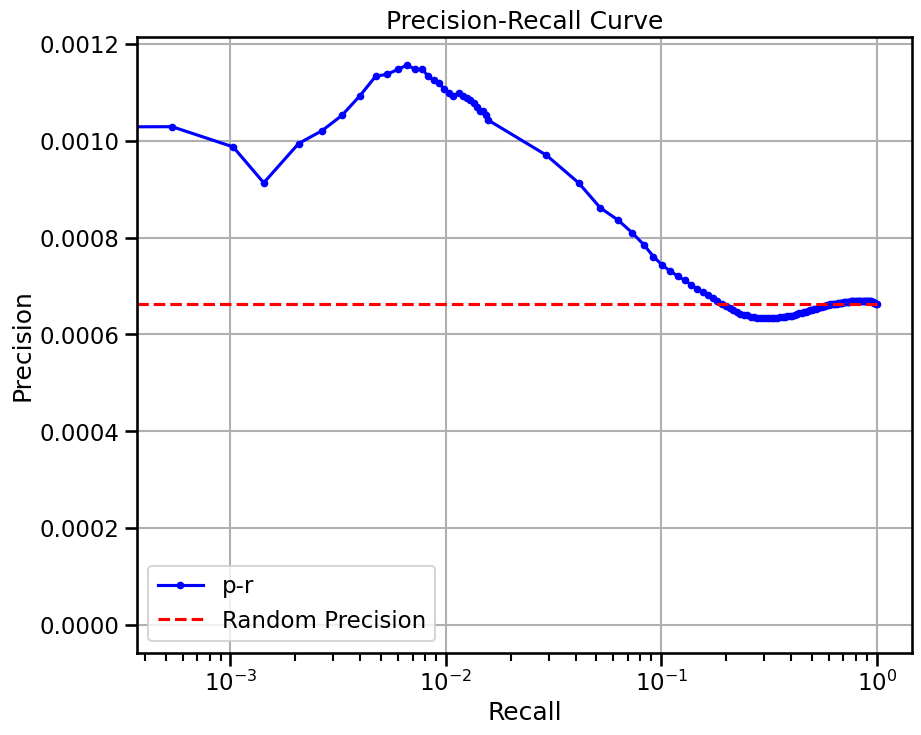


  0%|          | 0/16 [00:00<?, ?it/s]


  6%|▋         | 1/16 [00:02<00:33,  2.23s/it]


 12%|█▎        | 2/16 [00:05<00:39,  2.79s/it]


 19%|█▉        | 3/16 [00:06<00:23,  1.84s/it]


 25%|██▌       | 4/16 [00:06<00:16,  1.39s/it]


 31%|███▏      | 5/16 [00:07<00:12,  1.14s/it]


 38%|███▊      | 6/16 [00:08<00:09,  1.01it/s]


 44%|████▍     | 7/16 [00:08<00:08,  1.11it/s]


 50%|█████     | 8/16 [00:09<00:06,  1.20it/s]


 56%|█████▋    | 9/16 [00:10<00:05,  1.27it/s]


 62%|██████▎   | 10/16 [00:11<00:04,  1.31it/s]


 69%|██████▉   | 11/16 [00:11<00:03,  1.35it/s]


 75%|███████▌  | 12/16 [00:12<00:02,  1.39it/s]


 81%|████████▏ | 13/16 [00:13<00:02,  1.40it/s]


 88%|████████▊ | 14/16 [00:13<00:01,  1.43it/s]


 94%|█████████▍| 15/16 [00:14<00:00,  1.44it/s]


100%|██████████| 16/16 [00:14<00:00,  1.64it/s]


100%|██████████| 16/16 [00:15<00:00,  1.06it/s]

(250, 3211) pericyte


base enrichment


Top central genes: []
The DataFrame contains only the same values.


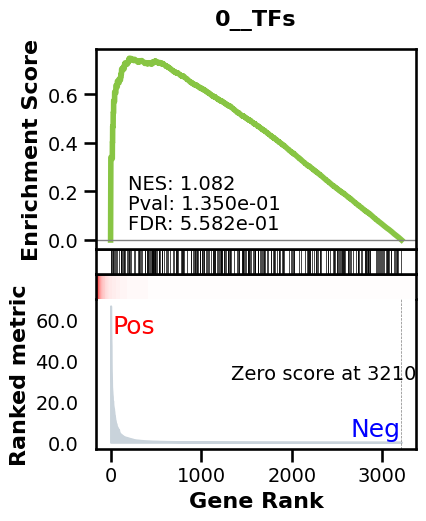

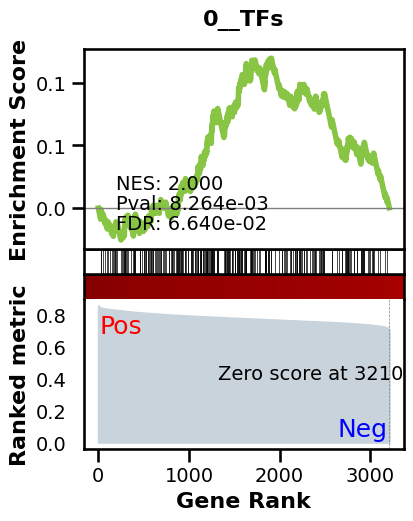

_________________________________________
TF specific enrichment


found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2230 genes
intersection pct: 0.6944876985362816
precision:  0.0011560658770536306 
recall:  1.0 
random precision: 0.0011565845248226094



  0%|          | 0/128 [00:00<?, ?it/s]


 11%|█         | 14/128 [00:00<00:00, 137.79it/s]


 22%|██▏       | 28/128 [00:00<00:00, 138.92it/s]


 33%|███▎      | 42/128 [00:00<00:00, 138.11it/s]


 44%|████▍     | 56/128 [00:00<00:00, 137.34it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 137.42it/s]


 66%|██████▌   | 84/128 [00:00<00:00, 137.10it/s]


 77%|███████▋  | 98/128 [00:00<00:00, 137.93it/s]


 88%|████████▊ | 112/128 [00:00<00:00, 138.12it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 138.16it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 137.75it/s]

Average Precision (AP):  0.0013696263569295654
Area Under Precision-Recall Curve (AUPRC):  0.0013661655011117017
EPR: 1.3546549369301557


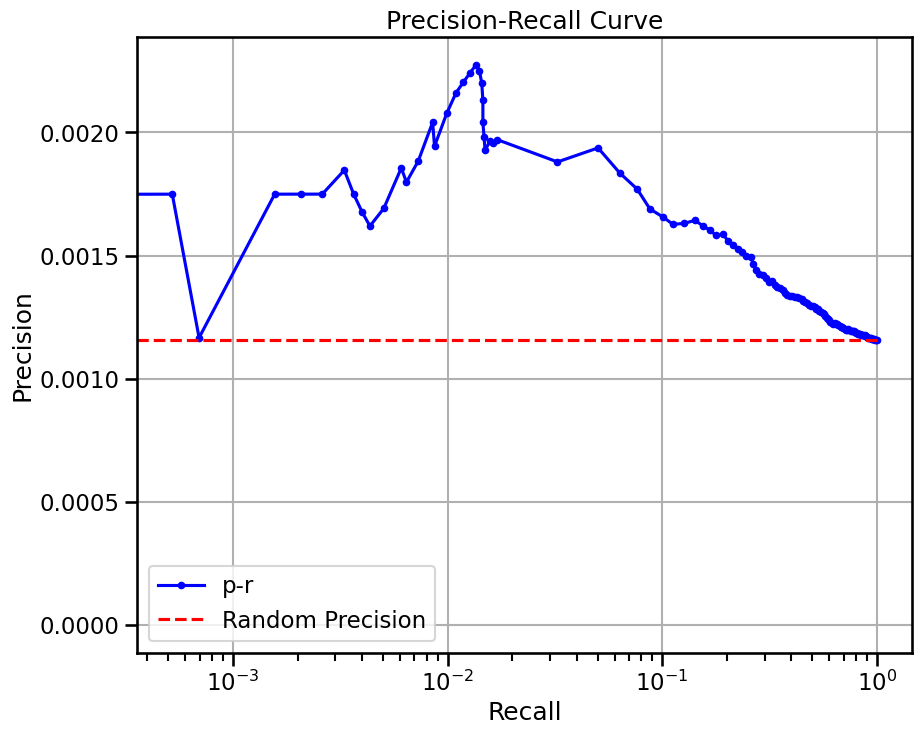

base enrichment


Top central genes: []


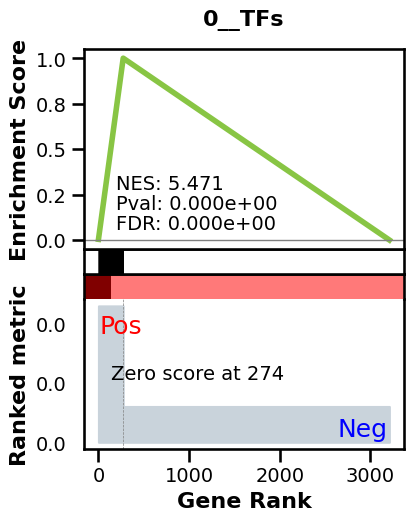

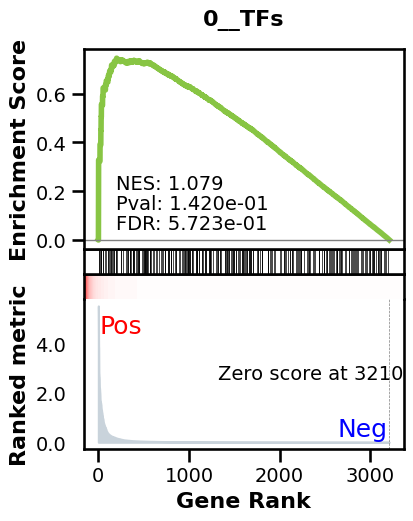

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2230 genes
intersection pct: 0.6944876985362816
precision:  0.005769555509690977 
recall:  0.5348756305444425 
random precision: 0.0011565845248226094



  0%|          | 0/128 [00:00<?, ?it/s]


 11%|█         | 14/128 [00:00<00:00, 135.15it/s]


 22%|██▏       | 28/128 [00:00<00:00, 133.79it/s]


 33%|███▎      | 42/128 [00:00<00:00, 134.90it/s]


 44%|████▍     | 56/128 [00:00<00:00, 135.07it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 134.63it/s]


 66%|██████▌   | 84/128 [00:00<00:00, 134.89it/s]


 77%|███████▋  | 98/128 [00:00<00:00, 135.32it/s]


 88%|████████▊ | 112/128 [00:00<00:00, 135.97it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 136.21it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 135.35it/s]

Average Precision (AP):  0.0049591785984598475
Area Under Precision-Recall Curve (AUPRC):  0.004502855585165025
EPR: 9.350291982182739


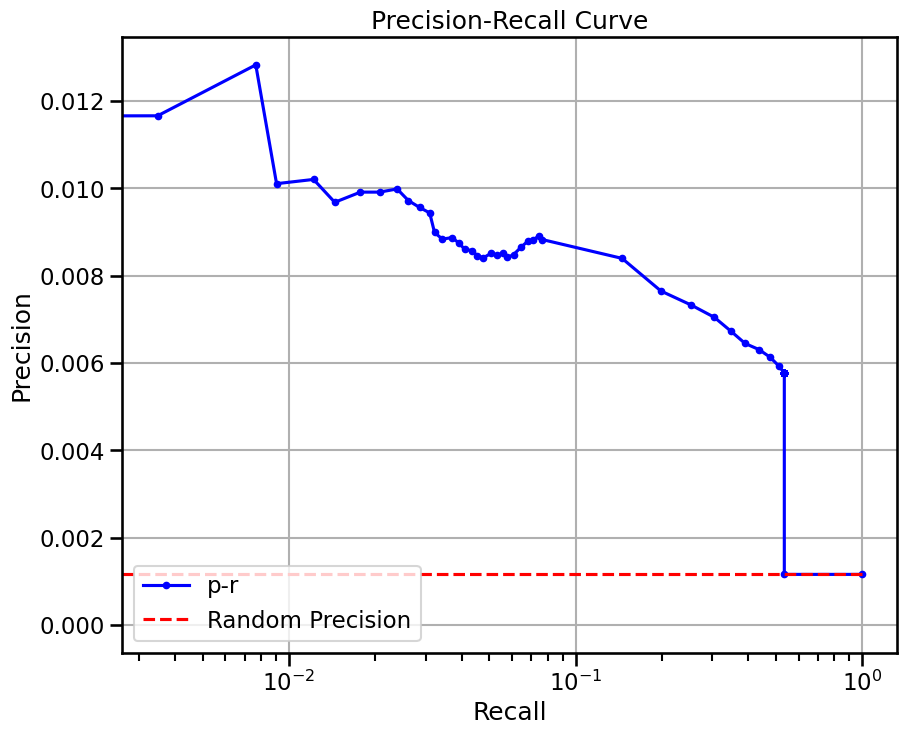

base enrichment


Top central genes: []
The DataFrame contains only the same values.


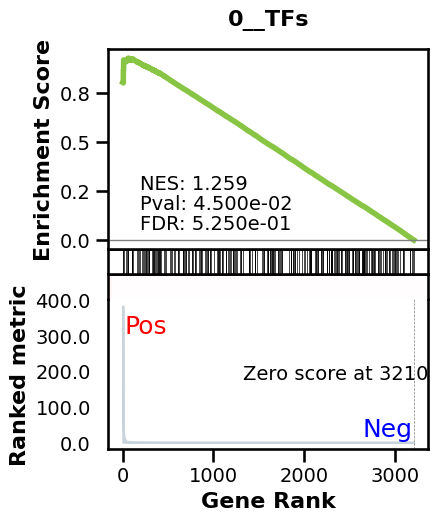

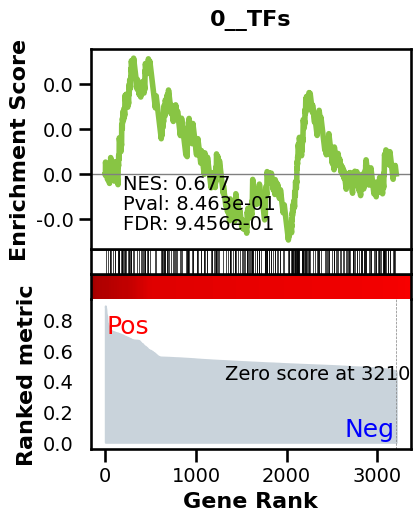

_________________________________________
TF specific enrichment


found some significant results for  9.523809523809524 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2230 genes
intersection pct: 0.6944876985362816
precision:  0.0011560658770536306 
recall:  1.0 
random precision: 0.0011565845248226094



  0%|          | 0/128 [00:00<?, ?it/s]


 10%|█         | 13/128 [00:00<00:00, 128.13it/s]


 20%|██        | 26/128 [00:00<00:00, 127.43it/s]


 30%|███       | 39/128 [00:00<00:00, 126.99it/s]


 41%|████      | 52/128 [00:00<00:00, 126.96it/s]


 51%|█████     | 65/128 [00:00<00:00, 127.13it/s]


 61%|██████    | 78/128 [00:00<00:00, 126.96it/s]


 72%|███████▏  | 92/128 [00:00<00:00, 128.14it/s]


 82%|████████▏ | 105/128 [00:00<00:00, 128.44it/s]


 93%|█████████▎| 119/128 [00:00<00:00, 128.93it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 127.52it/s]

Average Precision (AP):  0.0014546866203252204
Area Under Precision-Recall Curve (AUPRC):  0.0014407178911236235
EPR: 3.9367451793100967


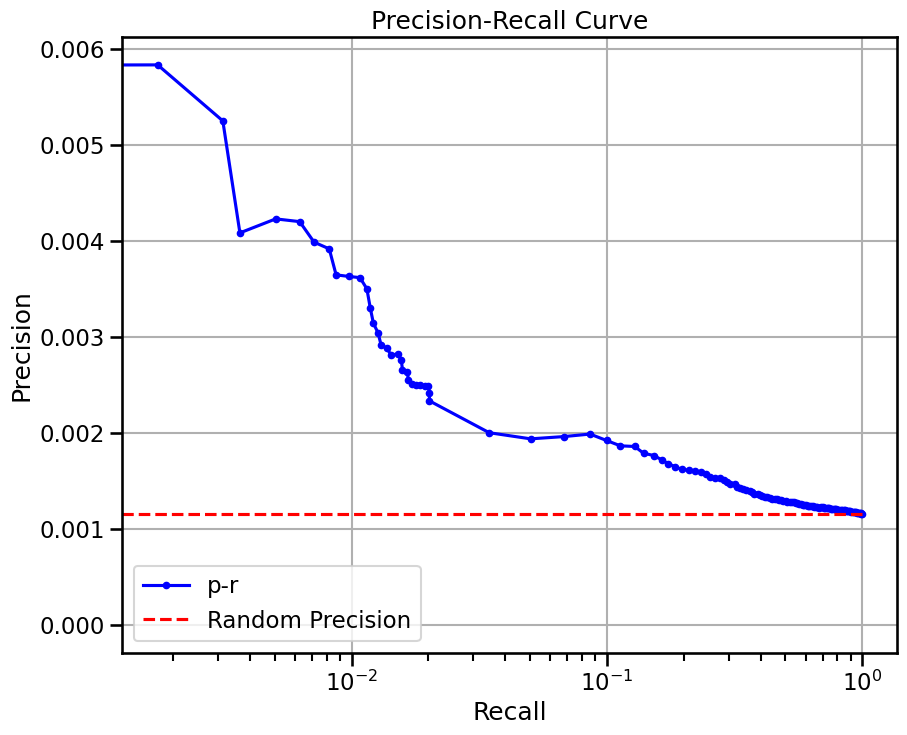

base enrichment


Top central genes: []


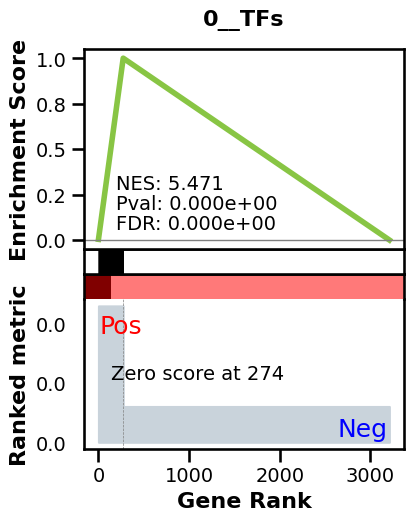

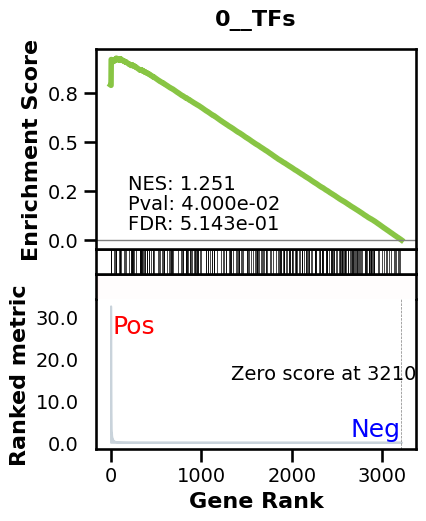

_________________________________________
TF specific enrichment


found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2230 genes
intersection pct: 0.6944876985362816
precision:  0.005769555509690977 
recall:  0.5348756305444425 
random precision: 0.0011565845248226094



  0%|          | 0/128 [00:00<?, ?it/s]


 11%|█         | 14/128 [00:00<00:00, 137.48it/s]


 22%|██▏       | 28/128 [00:00<00:00, 137.91it/s]


 34%|███▎      | 43/128 [00:00<00:00, 139.16it/s]


 45%|████▌     | 58/128 [00:00<00:00, 139.74it/s]


 57%|█████▋    | 73/128 [00:00<00:00, 140.49it/s]


 69%|██████▉   | 88/128 [00:00<00:00, 140.28it/s]


 80%|████████  | 103/128 [00:00<00:00, 140.68it/s]


 92%|█████████▏| 118/128 [00:00<00:00, 139.96it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 139.71it/s]

Average Precision (AP):  0.0051063520969437
Area Under Precision-Recall Curve (AUPRC):  0.004540755156575988
EPR: 10.606391000049593


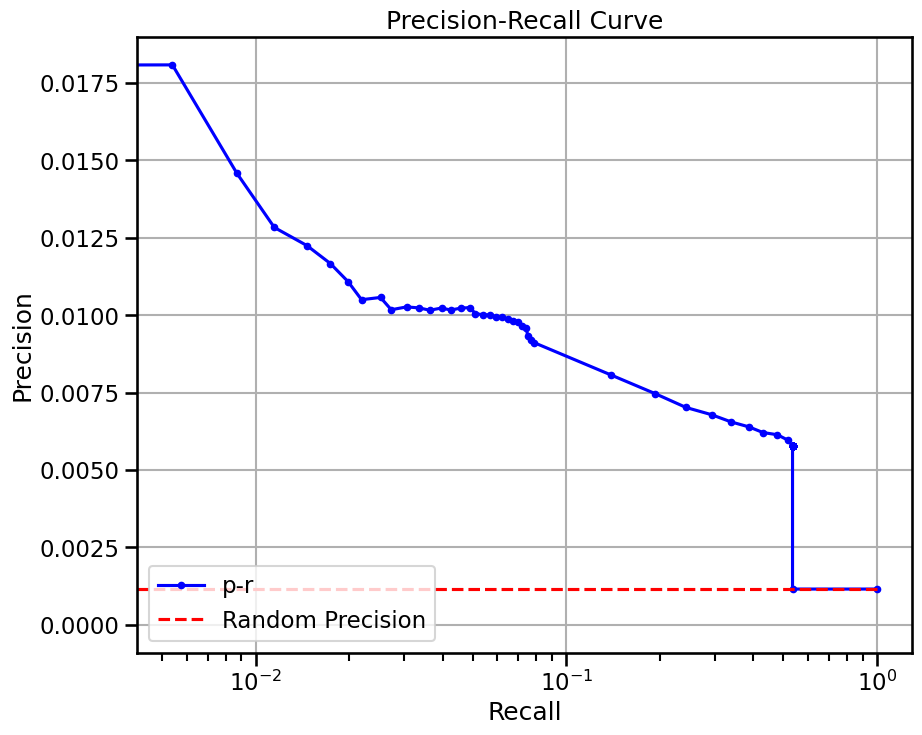


  0%|          | 0/8 [00:00<?, ?it/s]


 12%|█▎        | 1/8 [00:01<00:13,  1.99s/it]


 25%|██▌       | 2/8 [00:02<00:07,  1.29s/it]


 38%|███▊      | 3/8 [00:03<00:05,  1.09s/it]


 50%|█████     | 4/8 [00:04<00:03,  1.02it/s]


 62%|██████▎   | 5/8 [00:05<00:02,  1.07it/s]


 75%|███████▌  | 6/8 [00:06<00:01,  1.12it/s]


 88%|████████▊ | 7/8 [00:06<00:00,  1.16it/s]


100%|██████████| 8/8 [00:07<00:00,  1.61it/s]


100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

avg link count: 536200336, sparsity: 1.0


base enrichment


too many genes for central computation


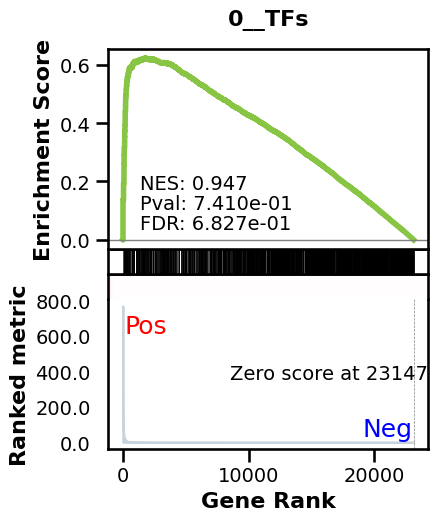

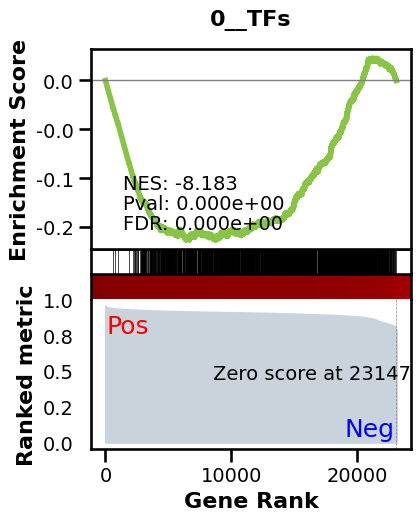

_________________________________________
TF specific enrichment


found some significant results for  55.357142857142854 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5384050457922931


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:39,  3.21it/s]


  2%|▏         | 2/128 [00:00<00:39,  3.23it/s]


  2%|▏         | 3/128 [00:00<00:38,  3.24it/s]


  3%|▎         | 4/128 [00:01<00:38,  3.25it/s]


  4%|▍         | 5/128 [00:01<00:37,  3.26it/s]


  5%|▍         | 6/128 [00:01<00:37,  3.21it/s]


  5%|▌         | 7/128 [00:02<00:37,  3.22it/s]


  6%|▋         | 8/128 [00:02<00:37,  3.23it/s]


  7%|▋         | 9/128 [00:02<00:36,  3.25it/s]


  8%|▊         | 10/128 [00:03<00:36,  3.25it/s]


  9%|▊         | 11/128 [00:03<00:36,  3.22it/s]


  9%|▉         | 12/128 [00:03<00:36,  3.22it/s]


 10%|█         | 13/128 [00:04<00:35,  3.24it/s]


 11%|█         | 14/128 [00:04<00:35,  3.26it/s]


 12%|█▏        | 15/128 [00:04<00:34,  3.24it/s]


 12%|█▎        | 16/128 [00:04<00:34,  3.22it/s]


 13%|█▎        | 17/128 [00:05<00:34,  3.24it/s]


 14%|█▍        | 18/128 [00:05<00:33,  3.25it/s]


 15%|█▍        | 19/128 [00:05<00:33,  3.26it/s]


 16%|█▌        | 20/128 [00:06<00:33,  3.26it/s]


 16%|█▋        | 21/128 [00:06<00:33,  3.22it/s]


 17%|█▋        | 22/128 [00:06<00:32,  3.22it/s]


 18%|█▊        | 23/128 [00:07<00:32,  3.24it/s]


 19%|█▉        | 24/128 [00:07<00:31,  3.25it/s]


 20%|█▉        | 25/128 [00:07<00:31,  3.24it/s]


 20%|██        | 26/128 [00:08<00:31,  3.22it/s]


 21%|██        | 27/128 [00:08<00:31,  3.24it/s]


 22%|██▏       | 28/128 [00:08<00:30,  3.25it/s]


 23%|██▎       | 29/128 [00:08<00:30,  3.24it/s]


 23%|██▎       | 30/128 [00:09<00:30,  3.23it/s]


 24%|██▍       | 31/128 [00:09<00:29,  3.24it/s]


 25%|██▌       | 32/128 [00:09<00:29,  3.25it/s]


 26%|██▌       | 33/128 [00:10<00:29,  3.24it/s]


 27%|██▋       | 34/128 [00:10<00:28,  3.25it/s]


 27%|██▋       | 35/128 [00:10<00:28,  3.24it/s]


 28%|██▊       | 36/128 [00:11<00:28,  3.25it/s]


 29%|██▉       | 37/128 [00:11<00:27,  3.25it/s]


 30%|██▉       | 38/128 [00:11<00:27,  3.24it/s]


 30%|███       | 39/128 [00:12<00:27,  3.24it/s]


 31%|███▏      | 40/128 [00:12<00:27,  3.25it/s]


 32%|███▏      | 41/128 [00:12<00:26,  3.25it/s]


 33%|███▎      | 42/128 [00:12<00:26,  3.22it/s]


 34%|███▎      | 43/128 [00:13<00:26,  3.23it/s]


 34%|███▍      | 44/128 [00:13<00:25,  3.23it/s]


 35%|███▌      | 45/128 [00:13<00:25,  3.24it/s]


 36%|███▌      | 46/128 [00:14<00:25,  3.26it/s]


 37%|███▋      | 47/128 [00:14<00:24,  3.24it/s]


 38%|███▊      | 48/128 [00:14<00:24,  3.23it/s]


 38%|███▊      | 49/128 [00:15<00:24,  3.23it/s]


 39%|███▉      | 50/128 [00:15<00:24,  3.24it/s]


 40%|███▉      | 51/128 [00:15<00:23,  3.26it/s]


 41%|████      | 52/128 [00:16<00:23,  3.24it/s]


 41%|████▏     | 53/128 [00:16<00:23,  3.23it/s]


 42%|████▏     | 54/128 [00:16<00:22,  3.23it/s]


 43%|████▎     | 55/128 [00:16<00:22,  3.24it/s]


 44%|████▍     | 56/128 [00:17<00:22,  3.26it/s]


 45%|████▍     | 57/128 [00:17<00:21,  3.26it/s]


 45%|████▌     | 58/128 [00:17<00:21,  3.24it/s]


 46%|████▌     | 59/128 [00:18<00:21,  3.23it/s]


 47%|████▋     | 60/128 [00:18<00:20,  3.24it/s]


 48%|████▊     | 61/128 [00:18<00:20,  3.25it/s]


 48%|████▊     | 62/128 [00:19<00:20,  3.25it/s]


 49%|████▉     | 63/128 [00:19<00:20,  3.24it/s]


 50%|█████     | 64/128 [00:19<00:19,  3.23it/s]


 51%|█████     | 65/128 [00:20<00:19,  3.25it/s]


 52%|█████▏    | 66/128 [00:20<00:18,  3.27it/s]


 52%|█████▏    | 67/128 [00:20<00:18,  3.27it/s]


 53%|█████▎    | 68/128 [00:20<00:18,  3.24it/s]


 54%|█████▍    | 69/128 [00:21<00:18,  3.22it/s]


 55%|█████▍    | 70/128 [00:21<00:17,  3.24it/s]


 55%|█████▌    | 71/128 [00:21<00:17,  3.26it/s]


 56%|█████▋    | 72/128 [00:22<00:17,  3.26it/s]


 57%|█████▋    | 73/128 [00:22<00:16,  3.24it/s]


 58%|█████▊    | 74/128 [00:22<00:16,  3.21it/s]


 59%|█████▊    | 75/128 [00:23<00:16,  3.21it/s]


 59%|█████▉    | 76/128 [00:23<00:16,  3.23it/s]


 60%|██████    | 77/128 [00:23<00:15,  3.25it/s]


 61%|██████    | 78/128 [00:24<00:15,  3.23it/s]


 62%|██████▏   | 79/128 [00:24<00:15,  3.22it/s]


 62%|██████▎   | 80/128 [00:24<00:14,  3.21it/s]


 63%|██████▎   | 81/128 [00:25<00:14,  3.22it/s]


 64%|██████▍   | 82/128 [00:25<00:14,  3.23it/s]


 65%|██████▍   | 83/128 [00:25<00:13,  3.25it/s]


 66%|██████▌   | 84/128 [00:25<00:13,  3.24it/s]


 66%|██████▋   | 85/128 [00:26<00:13,  3.24it/s]


 67%|██████▋   | 86/128 [00:26<00:12,  3.25it/s]


 68%|██████▊   | 87/128 [00:26<00:12,  3.26it/s]


 69%|██████▉   | 88/128 [00:27<00:12,  3.24it/s]


 70%|██████▉   | 89/128 [00:27<00:12,  3.23it/s]


 70%|███████   | 90/128 [00:27<00:11,  3.23it/s]


 71%|███████   | 91/128 [00:28<00:11,  3.25it/s]


 72%|███████▏  | 92/128 [00:28<00:11,  3.25it/s]


 73%|███████▎  | 93/128 [00:28<00:10,  3.24it/s]


 73%|███████▎  | 94/128 [00:29<00:10,  3.24it/s]


 74%|███████▍  | 95/128 [00:29<00:10,  3.23it/s]


 75%|███████▌  | 96/128 [00:29<00:09,  3.24it/s]


 76%|███████▌  | 97/128 [00:29<00:09,  3.25it/s]


 77%|███████▋  | 98/128 [00:30<00:09,  3.22it/s]


 77%|███████▋  | 99/128 [00:30<00:09,  3.22it/s]


 78%|███████▊  | 100/128 [00:30<00:08,  3.21it/s]


 79%|███████▉  | 101/128 [00:31<00:08,  3.22it/s]


 80%|███████▉  | 102/128 [00:31<00:08,  3.22it/s]


 80%|████████  | 103/128 [00:31<00:07,  3.21it/s]


 81%|████████▏ | 104/128 [00:32<00:07,  3.18it/s]


 82%|████████▏ | 105/128 [00:32<00:07,  3.19it/s]


 83%|████████▎ | 106/128 [00:32<00:06,  3.23it/s]


 84%|████████▎ | 107/128 [00:33<00:06,  3.23it/s]


 84%|████████▍ | 108/128 [00:33<00:06,  3.21it/s]


 85%|████████▌ | 109/128 [00:33<00:05,  3.20it/s]


 86%|████████▌ | 110/128 [00:33<00:05,  3.22it/s]


 87%|████████▋ | 111/128 [00:34<00:05,  3.24it/s]


 88%|████████▊ | 112/128 [00:34<00:04,  3.24it/s]


 88%|████████▊ | 113/128 [00:34<00:04,  3.21it/s]


 89%|████████▉ | 114/128 [00:35<00:04,  3.20it/s]


 90%|████████▉ | 115/128 [00:35<00:04,  3.22it/s]


 91%|█████████ | 116/128 [00:35<00:03,  3.23it/s]


 91%|█████████▏| 117/128 [00:36<00:03,  3.22it/s]


 92%|█████████▏| 118/128 [00:36<00:03,  3.23it/s]


 93%|█████████▎| 119/128 [00:36<00:02,  3.22it/s]


 94%|█████████▍| 120/128 [00:37<00:02,  3.23it/s]


 95%|█████████▍| 121/128 [00:37<00:02,  3.25it/s]


 95%|█████████▌| 122/128 [00:37<00:01,  3.24it/s]


 96%|█████████▌| 123/128 [00:38<00:01,  3.24it/s]


 97%|█████████▋| 124/128 [00:38<00:01,  3.24it/s]


 98%|█████████▊| 125/128 [00:38<00:00,  3.23it/s]


 98%|█████████▊| 126/128 [00:38<00:00,  3.25it/s]


 99%|█████████▉| 127/128 [00:39<00:00,  3.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:39<00:00,  3.23it/s]


100%|██████████| 128/128 [00:39<00:00,  3.24it/s]

Average Precision (AP):  0.0006678132009620262
Area Under Precision-Recall Curve (AUPRC):  0.0006669764005544967


EPR: 1.138535375618601


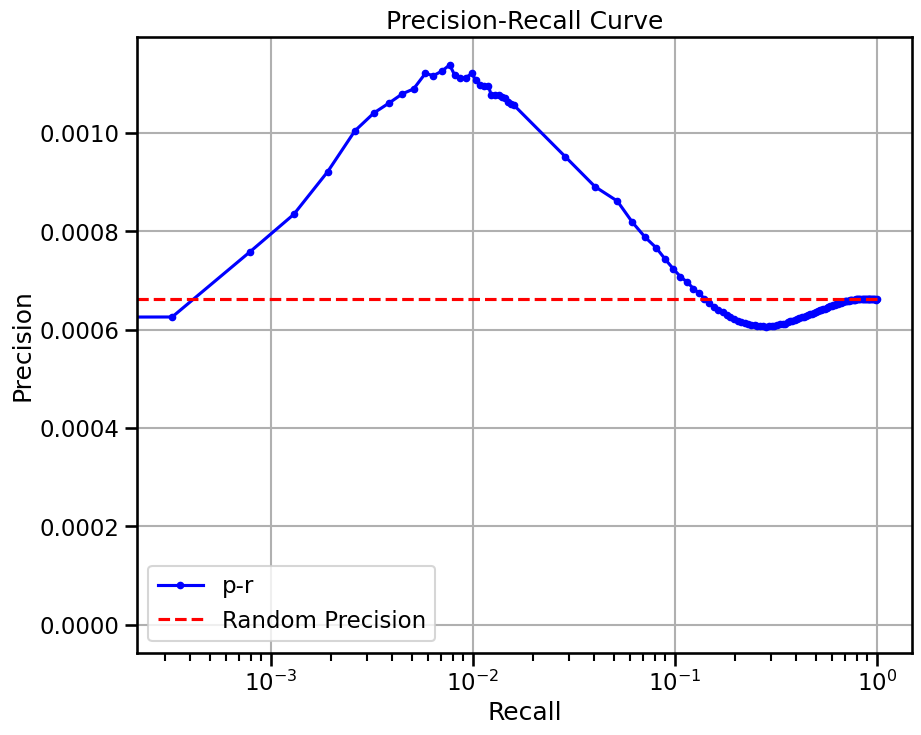


  0%|          | 0/15 [00:00<?, ?it/s]


  7%|▋         | 1/15 [00:02<00:29,  2.08s/it]


 13%|█▎        | 2/15 [00:03<00:19,  1.48s/it]


 20%|██        | 3/15 [00:04<00:15,  1.27s/it]


 27%|██▋       | 4/15 [00:05<00:12,  1.18s/it]


 33%|███▎      | 5/15 [00:06<00:11,  1.13s/it]


 40%|████      | 6/15 [00:08<00:13,  1.45s/it]


 47%|████▋     | 7/15 [00:09<00:10,  1.32s/it]


 53%|█████▎    | 8/15 [00:10<00:08,  1.24s/it]


 60%|██████    | 9/15 [00:11<00:07,  1.19s/it]


 67%|██████▋   | 10/15 [00:12<00:05,  1.15s/it]


 73%|███████▎  | 11/15 [00:13<00:04,  1.12s/it]


 80%|████████  | 12/15 [00:14<00:03,  1.11s/it]


 87%|████████▋ | 13/15 [00:15<00:02,  1.09s/it]


 93%|█████████▎| 14/15 [00:16<00:01,  1.09s/it]


100%|██████████| 15/15 [00:17<00:00,  1.17it/s]


100%|██████████| 15/15 [00:17<00:00,  1.16s/it]

(228, 5000) lymphocyte


base enrichment


Top central genes: []
The DataFrame contains only the same values.


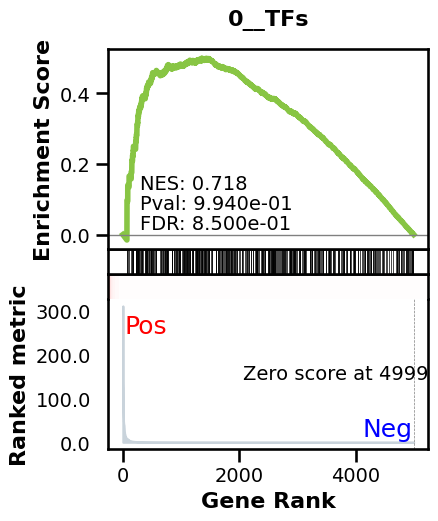

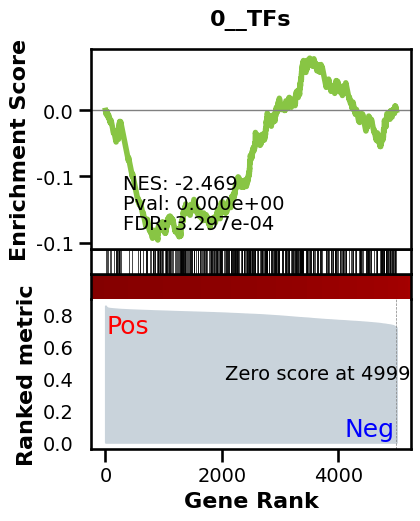

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.001192520141082607 
recall:  1.0 
random precision: 0.0011928575831146055



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.75it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.31it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.14it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.79it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.95it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.04it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.90it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.76it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.95it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.14it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.30it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.40it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.40it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.16it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.74it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.80it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.06it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.17it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.22it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.36it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.00it/s]

Average Precision (AP):  0.0013094038138155046
Area Under Precision-Recall Curve (AUPRC):  0.0013076222767196615


EPR: 1.351268309941605


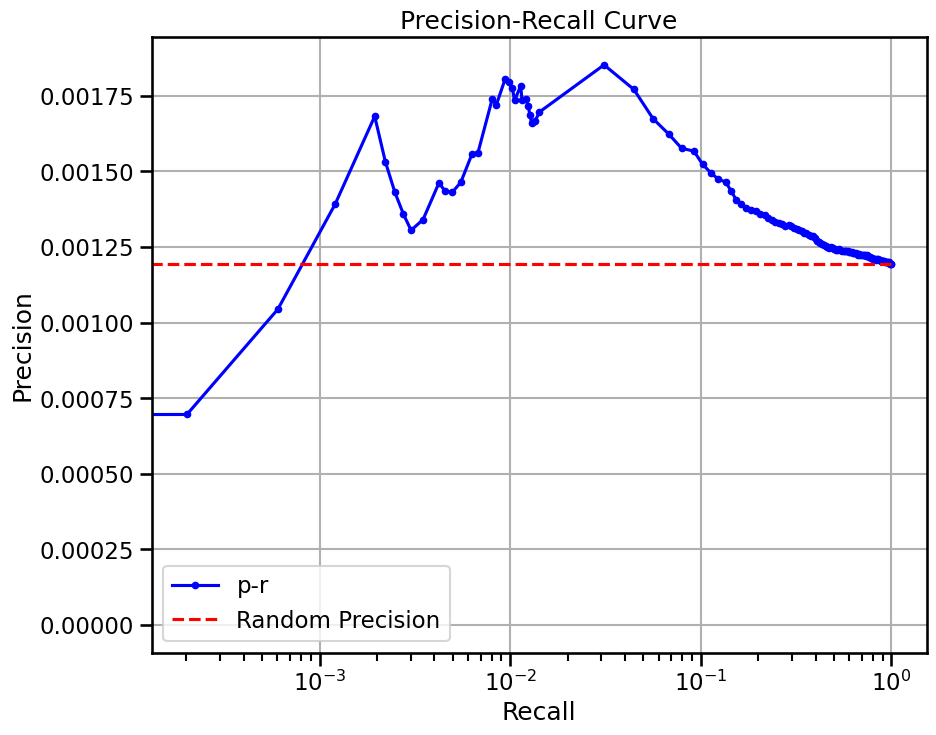

base enrichment


Top central genes: []


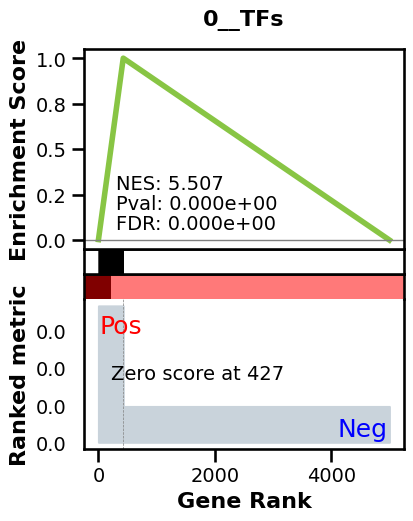

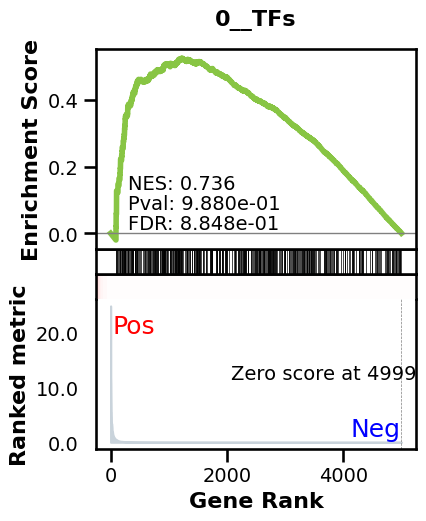

_________________________________________
TF specific enrichment


found some significant results for  17.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.0052568900331060745 
recall:  0.4576566903771306 
random precision: 0.0011928575831146055



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.74it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.04it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.14it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.69it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.40it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.18it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.32it/s]


 38%|███▊      | 48/128 [00:00<00:01, 52.97it/s]


 42%|████▏     | 54/128 [00:01<00:01, 52.87it/s]


 47%|████▋     | 60/128 [00:01<00:01, 52.84it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.01it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.09it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.06it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 52.73it/s]


 70%|███████   | 90/128 [00:01<00:00, 52.81it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 52.91it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.08it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.15it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.19it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.26it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.13it/s]

Average Precision (AP):  0.00383226940589671
Area Under Precision-Recall Curve (AUPRC):  0.0034681754824299935
EPR: 7.94857043346332


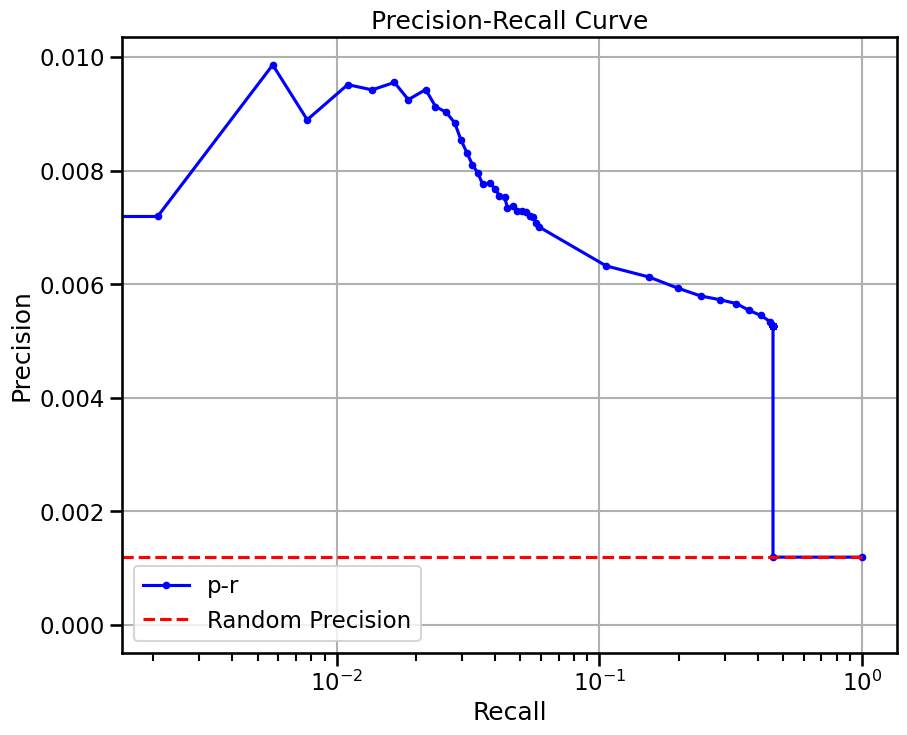

base enrichment


Top central genes: []
The DataFrame contains only the same values.


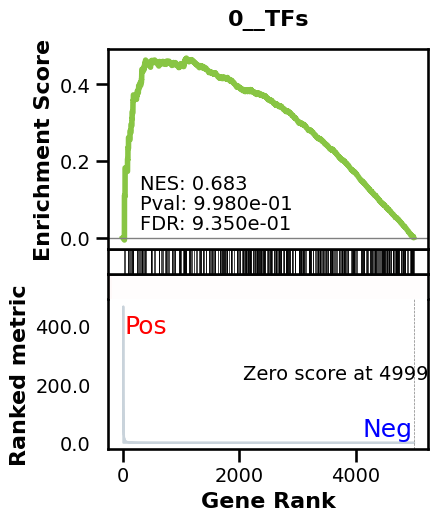

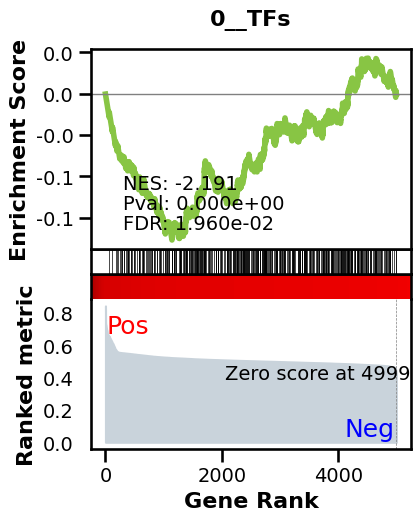

_________________________________________
TF specific enrichment


found some significant results for  30.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.001192520141082607 
recall:  1.0 
random precision: 0.0011928575831146055



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 52.90it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.62it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.10it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.07it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.67it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.88it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.05it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.13it/s]


 42%|████▏     | 54/128 [00:01<00:01, 54.38it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.50it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.50it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.37it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.43it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.62it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.57it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.71it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.79it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.70it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.67it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.68it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.49it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.28it/s]

Average Precision (AP):  0.0014880787706073686
Area Under Precision-Recall Curve (AUPRC):  0.001486668981611983


EPR: 2.030178016669077


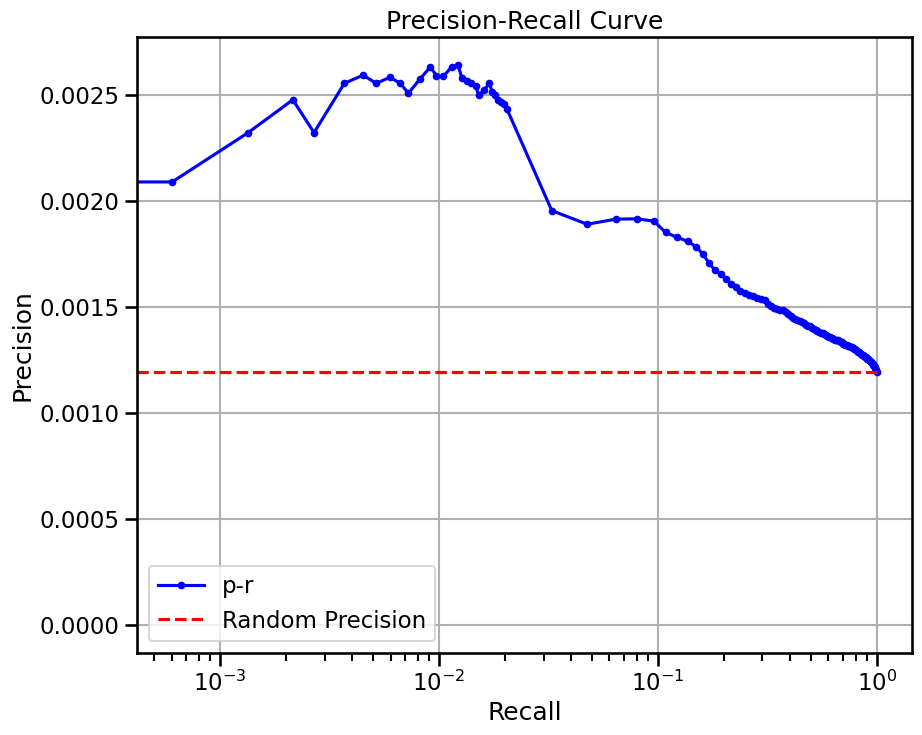

base enrichment


Top central genes: []


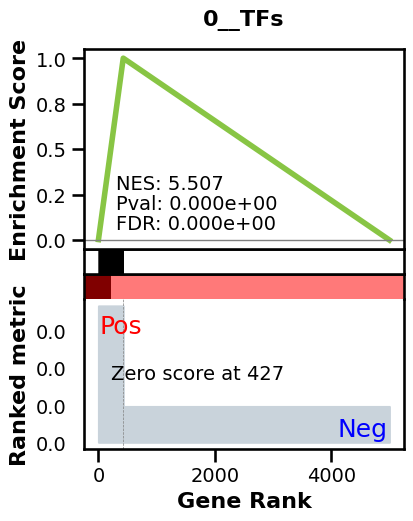

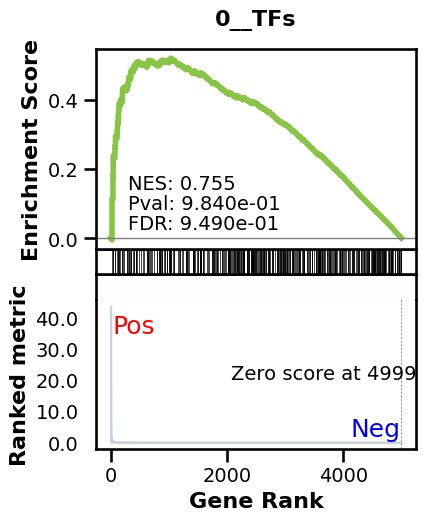

_________________________________________
TF specific enrichment


found some significant results for  7.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.0052568900331060745 
recall:  0.4576566903771306 
random precision: 0.0011928575831146055



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.95it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.16it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.23it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.18it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.80it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.96it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.10it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.09it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.08it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.11it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.19it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.30it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.94it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.12it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.00it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.04it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.91it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.96it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.04it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.02it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.00it/s]

Average Precision (AP):  0.0042295508161709116
Area Under Precision-Recall Curve (AUPRC):  0.0038326913368507314
EPR: 9.70350956959442


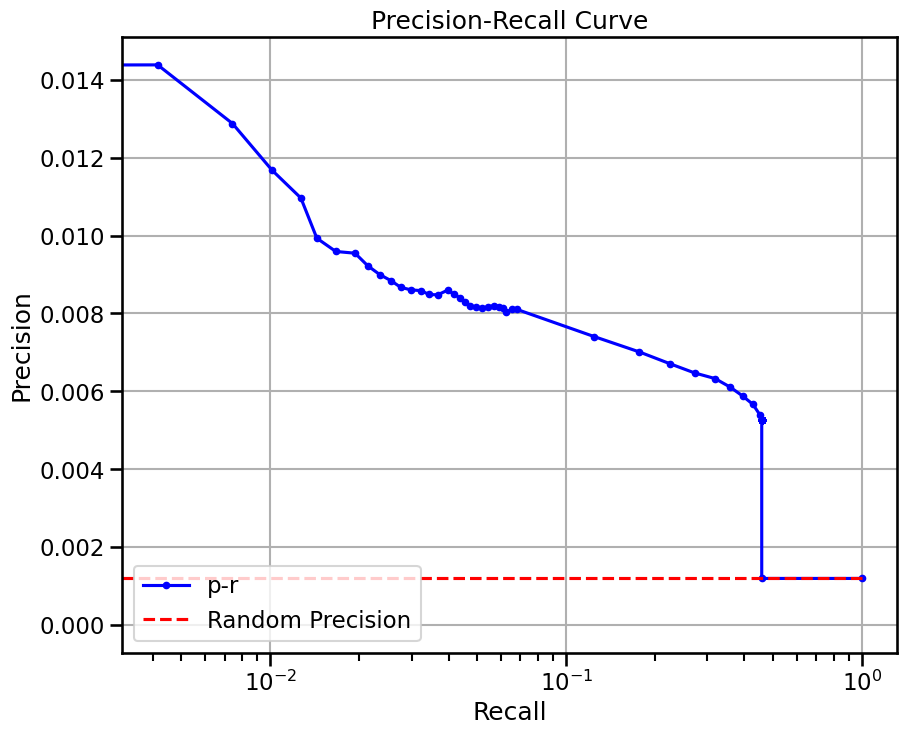


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [00:01<00:01,  1.96s/it]


100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

avg link count: 387971809, sparsity: 1.0


base enrichment


too many genes for central computation


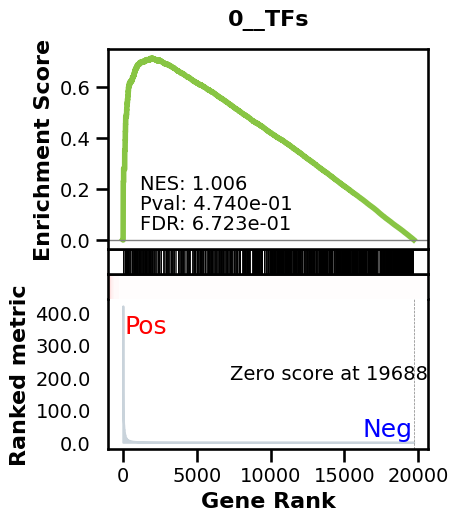

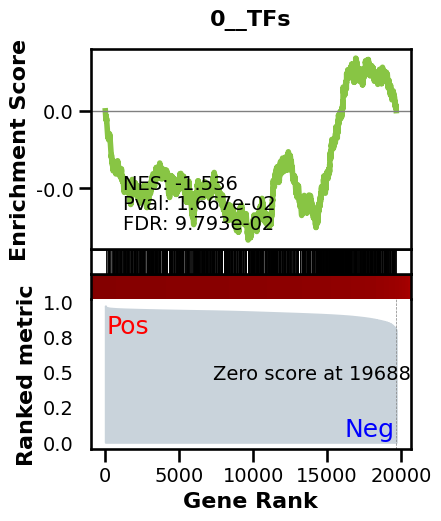

_________________________________________
TF specific enrichment


found some significant results for  60.18518518518518 % TFs

_________________________________________
loading GT,  omnipath


intersection of 11019 genes
intersection pct: 0.559652597897303


precision:  0.0007477974139621749 
recall:  1.0 
random precision: 0.0007478575021432887



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:29,  4.36it/s]


  2%|▏         | 2/128 [00:00<00:29,  4.33it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.33it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.32it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.31it/s]


  5%|▍         | 6/128 [00:01<00:28,  4.35it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.37it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.36it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.34it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.36it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.35it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.34it/s]


 10%|█         | 13/128 [00:02<00:26,  4.34it/s]


 11%|█         | 14/128 [00:03<00:26,  4.36it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.36it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.34it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.34it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.32it/s]


 15%|█▍        | 19/128 [00:04<00:25,  4.32it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.33it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.34it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.34it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.34it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.34it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.31it/s]


 20%|██        | 26/128 [00:05<00:23,  4.30it/s]


 21%|██        | 27/128 [00:06<00:23,  4.33it/s]


 22%|██▏       | 28/128 [00:06<00:23,  4.33it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.34it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.33it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.33it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.31it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.32it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.34it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.35it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.35it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.37it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.34it/s]


 30%|███       | 39/128 [00:08<00:20,  4.33it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.34it/s]


 32%|███▏      | 41/128 [00:09<00:20,  4.34it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.34it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.34it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.36it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.34it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.33it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.35it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.35it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.34it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.33it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.34it/s]


 41%|████      | 52/128 [00:11<00:17,  4.33it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.32it/s]


 42%|████▏     | 54/128 [00:12<00:17,  4.34it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.34it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.36it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.35it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.35it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.34it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.33it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.34it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.35it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.37it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.35it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.34it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.35it/s]


 52%|█████▏    | 67/128 [00:15<00:14,  4.33it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.34it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.34it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.36it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.37it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.36it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.34it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.33it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.32it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.35it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.34it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.35it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.35it/s]


 62%|██████▎   | 80/128 [00:18<00:11,  4.34it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.33it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.34it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.35it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.36it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.35it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.34it/s]


 68%|██████▊   | 87/128 [00:20<00:09,  4.33it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.33it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.34it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.35it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.35it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.34it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.33it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.33it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.33it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.34it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.35it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.34it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.34it/s]


 78%|███████▊  | 100/128 [00:23<00:06,  4.34it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.32it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.35it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.36it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.36it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.35it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.35it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.34it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.34it/s]


 85%|████████▌ | 109/128 [00:25<00:04,  4.35it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.35it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.35it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.33it/s]


 88%|████████▊ | 113/128 [00:26<00:03,  4.34it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.34it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.35it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.36it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.35it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.36it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.34it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.34it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.35it/s]


 95%|█████████▌| 122/128 [00:28<00:01,  4.34it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.34it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.36it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.36it/s]


 98%|█████████▊| 126/128 [00:29<00:00,  4.36it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.36it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.33it/s]


100%|██████████| 128/128 [00:29<00:00,  4.34it/s]

Average Precision (AP):  0.0007979572626560838
Area Under Precision-Recall Curve (AUPRC):  0.0007978637507964387


EPR: 1.143051140583345


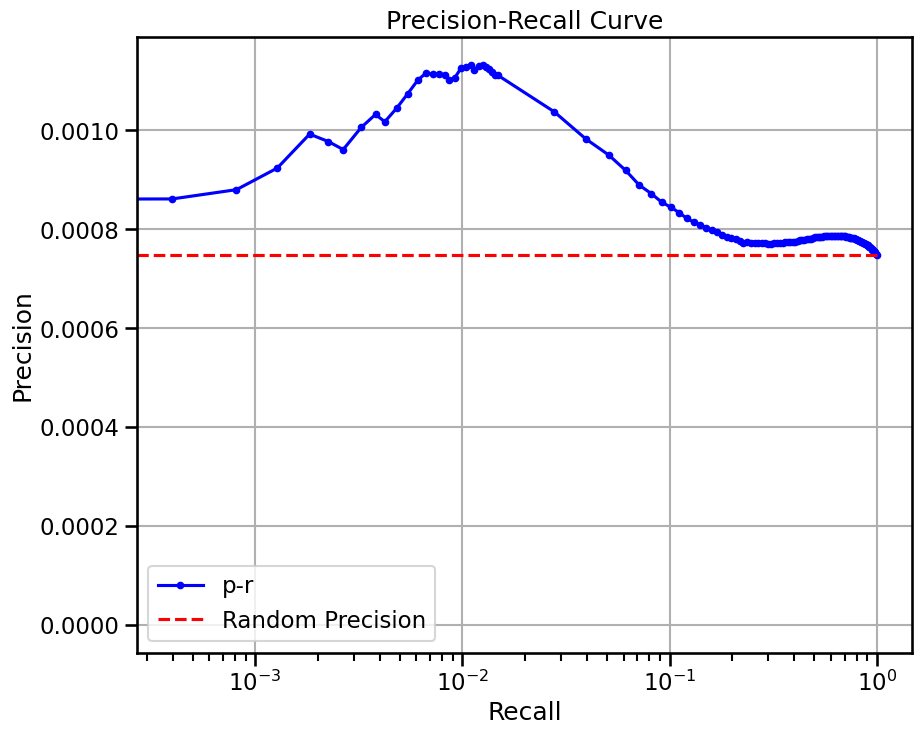


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:01<00:03,  1.94s/it]


 67%|██████▋   | 2/3 [00:02<00:01,  1.35s/it]


100%|██████████| 3/3 [00:03<00:00,  1.05s/it]

(33, 4256) stromal cell


base enrichment


Top central genes: []
The DataFrame contains only the same values.


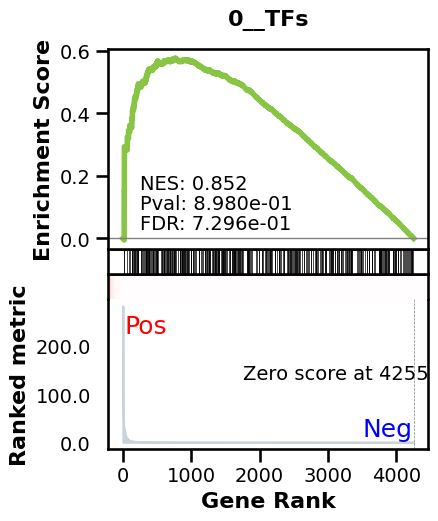

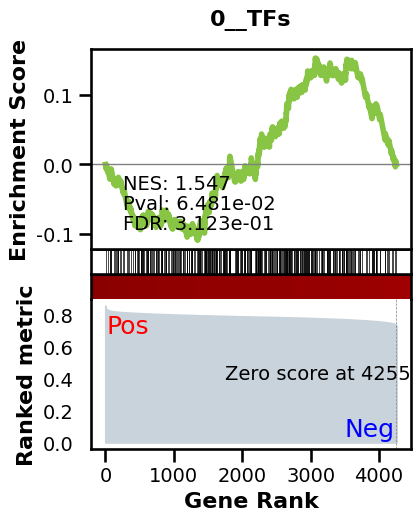

_________________________________________
TF specific enrichment


found some significant results for  25.641025641025642 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3017 genes
intersection pct: 0.7088815789473685
precision:  0.0011826695460889014 
recall:  1.0 
random precision: 0.001183061677901265



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 75.68it/s]


 12%|█▎        | 16/128 [00:00<00:01, 75.53it/s]


 19%|█▉        | 24/128 [00:00<00:01, 75.89it/s]


 25%|██▌       | 32/128 [00:00<00:01, 76.10it/s]


 31%|███▏      | 40/128 [00:00<00:01, 76.31it/s]


 38%|███▊      | 48/128 [00:00<00:01, 75.69it/s]


 44%|████▍     | 56/128 [00:00<00:00, 75.67it/s]


 50%|█████     | 64/128 [00:00<00:00, 75.85it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 75.96it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 75.94it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 75.83it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 76.00it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 76.06it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 76.45it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 76.24it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 75.98it/s]


100%|██████████| 128/128 [00:01<00:00, 75.95it/s]

Average Precision (AP):  0.0013247973179385043
Area Under Precision-Recall Curve (AUPRC):  0.0013232093144118348
EPR: 1.4147402315826934


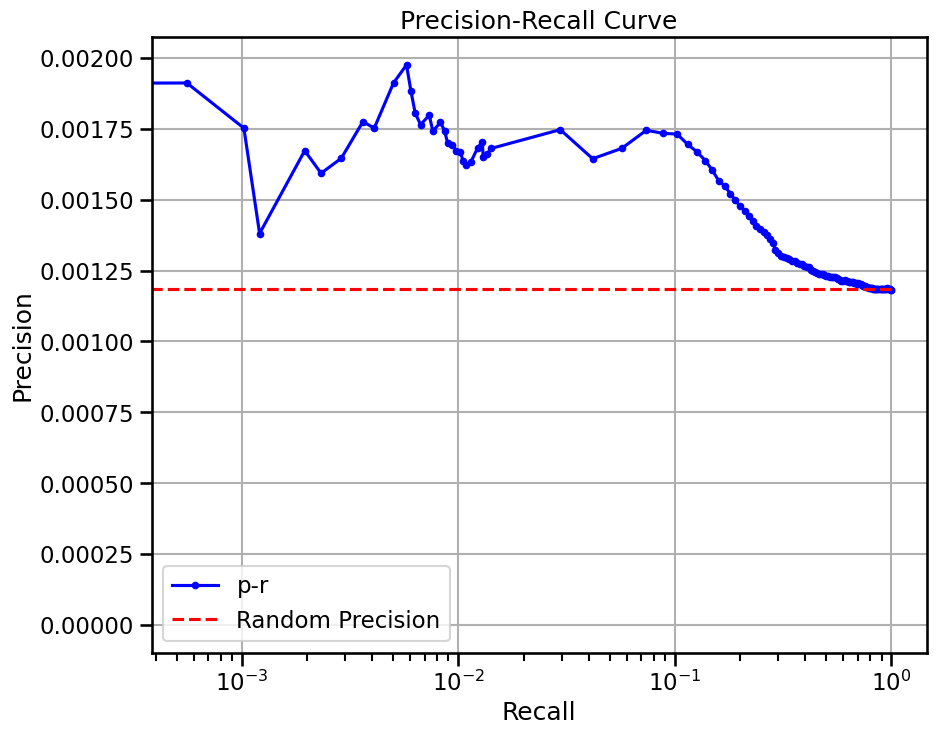

base enrichment


Top central genes: []


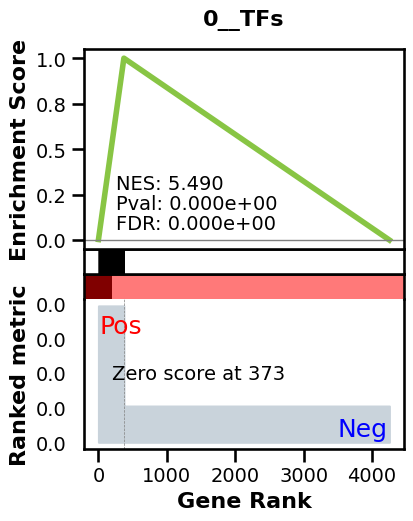

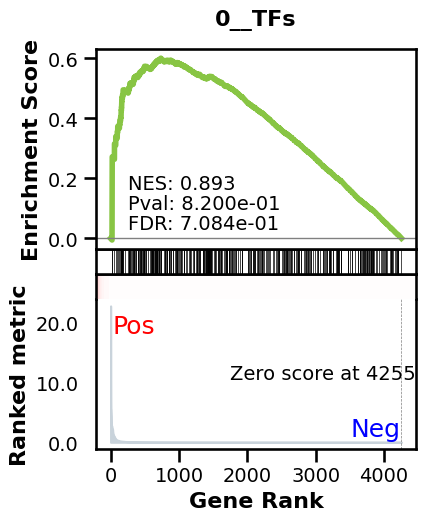

_________________________________________
TF specific enrichment


found some significant results for  5.128205128205129 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3017 genes
intersection pct: 0.7088815789473685
precision:  0.005369166973287963 
recall:  0.49205759405480726 
random precision: 0.001183061677901265



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 69.35it/s]


 12%|█▏        | 15/128 [00:00<00:01, 69.91it/s]


 17%|█▋        | 22/128 [00:00<00:01, 69.78it/s]


 23%|██▎       | 30/128 [00:00<00:01, 69.96it/s]


 30%|██▉       | 38/128 [00:00<00:01, 70.01it/s]


 36%|███▌      | 46/128 [00:00<00:01, 70.07it/s]


 42%|████▏     | 54/128 [00:00<00:01, 70.39it/s]


 48%|████▊     | 62/128 [00:00<00:00, 70.33it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 70.41it/s]


 61%|██████    | 78/128 [00:01<00:00, 70.50it/s]


 67%|██████▋   | 86/128 [00:01<00:00, 70.68it/s]


 73%|███████▎  | 94/128 [00:01<00:00, 70.41it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 70.31it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 70.42it/s]


 92%|█████████▏| 118/128 [00:01<00:00, 70.33it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 70.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 70.27it/s]

Average Precision (AP):  0.004028792772755005
Area Under Precision-Recall Curve (AUPRC):  0.003589062543487008
EPR: 7.331571010697126


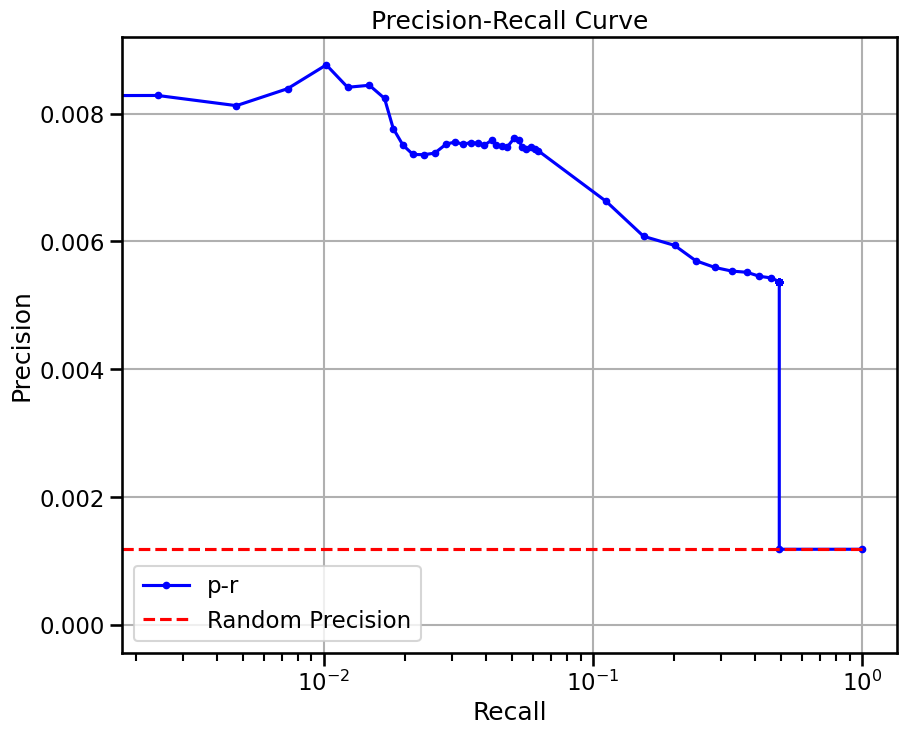

base enrichment


Top central genes: []
The DataFrame contains only the same values.


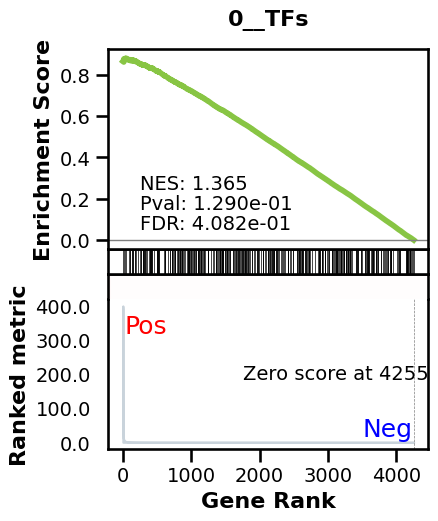

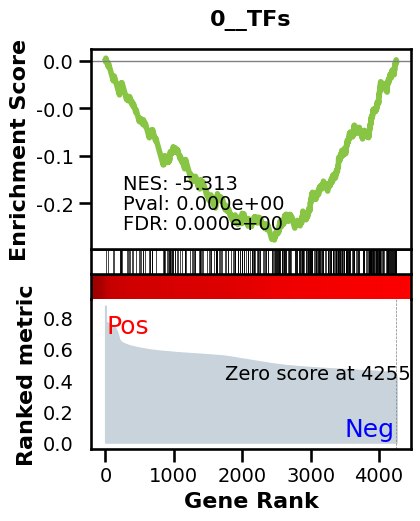

_________________________________________
TF specific enrichment


found some significant results for  25.641025641025642 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3017 genes
intersection pct: 0.7088815789473685
precision:  0.0011826695460889014 
recall:  1.0 
random precision: 0.001183061677901265



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 72.81it/s]


 12%|█▎        | 16/128 [00:00<00:01, 72.52it/s]


 19%|█▉        | 24/128 [00:00<00:01, 72.56it/s]


 25%|██▌       | 32/128 [00:00<00:01, 72.36it/s]


 31%|███▏      | 40/128 [00:00<00:01, 72.39it/s]


 38%|███▊      | 48/128 [00:00<00:01, 72.52it/s]


 44%|████▍     | 56/128 [00:00<00:00, 72.59it/s]


 50%|█████     | 64/128 [00:00<00:00, 72.56it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 72.35it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 72.40it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 72.69it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 72.72it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 72.86it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 72.95it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 72.87it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 72.85it/s]


100%|██████████| 128/128 [00:01<00:00, 72.64it/s]

Average Precision (AP):  0.0012773182086364828
Area Under Precision-Recall Curve (AUPRC):  0.0012738145177646413
EPR: 2.2839795711491178


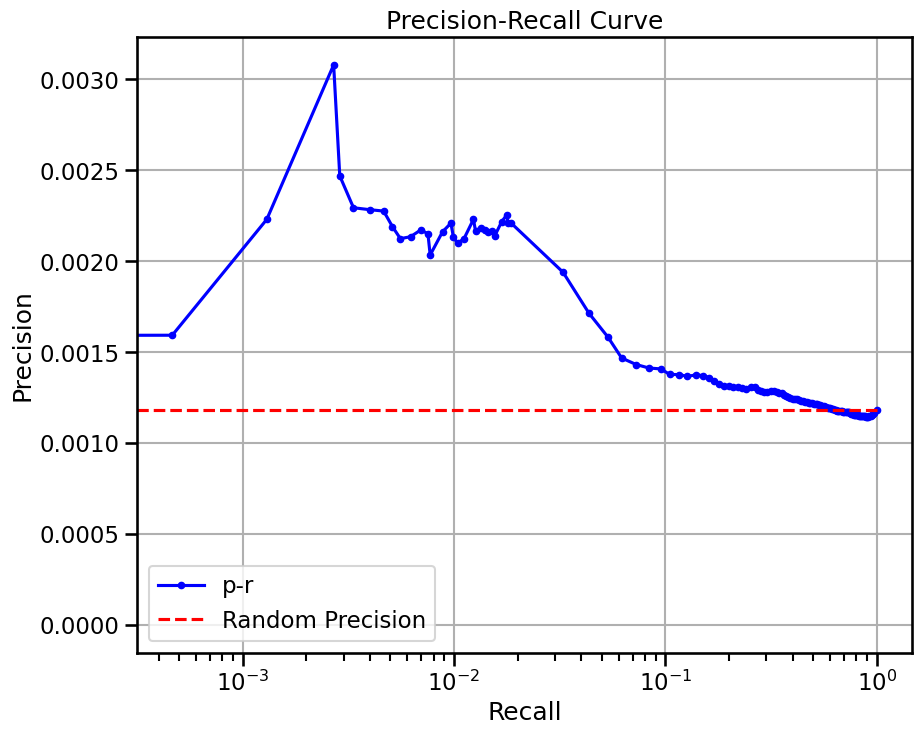

base enrichment


Top central genes: []


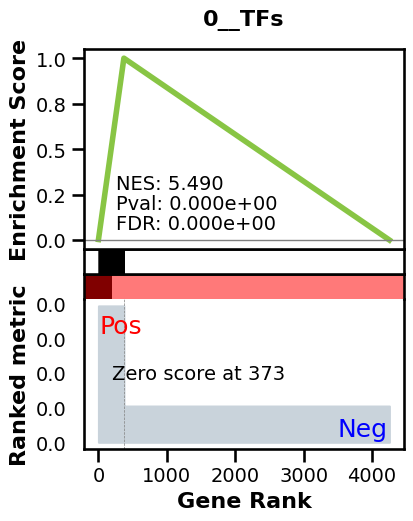

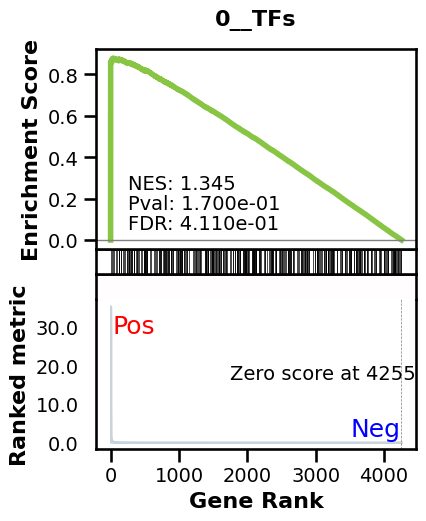

_________________________________________
TF specific enrichment


found some significant results for  12.820512820512821 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3017 genes
intersection pct: 0.7088815789473685
precision:  0.005369166973287963 
recall:  0.49205759405480726 
random precision: 0.001183061677901265



  0%|          | 0/128 [00:00<?, ?it/s]


  6%|▋         | 8/128 [00:00<00:01, 73.27it/s]


 12%|█▎        | 16/128 [00:00<00:01, 73.70it/s]


 19%|█▉        | 24/128 [00:00<00:01, 73.92it/s]


 25%|██▌       | 32/128 [00:00<00:01, 74.28it/s]


 31%|███▏      | 40/128 [00:00<00:01, 74.25it/s]


 38%|███▊      | 48/128 [00:00<00:01, 74.25it/s]


 44%|████▍     | 56/128 [00:00<00:00, 74.24it/s]


 50%|█████     | 64/128 [00:00<00:00, 74.48it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 74.78it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 75.11it/s]


 69%|██████▉   | 88/128 [00:01<00:00, 74.76it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 74.66it/s]


 81%|████████▏ | 104/128 [00:01<00:00, 74.55it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 74.54it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 74.36it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 74.34it/s]


100%|██████████| 128/128 [00:01<00:00, 74.39it/s]

Average Precision (AP):  0.003832508627945047
Area Under Precision-Recall Curve (AUPRC):  0.003375359059254052
EPR: 7.818510241724629


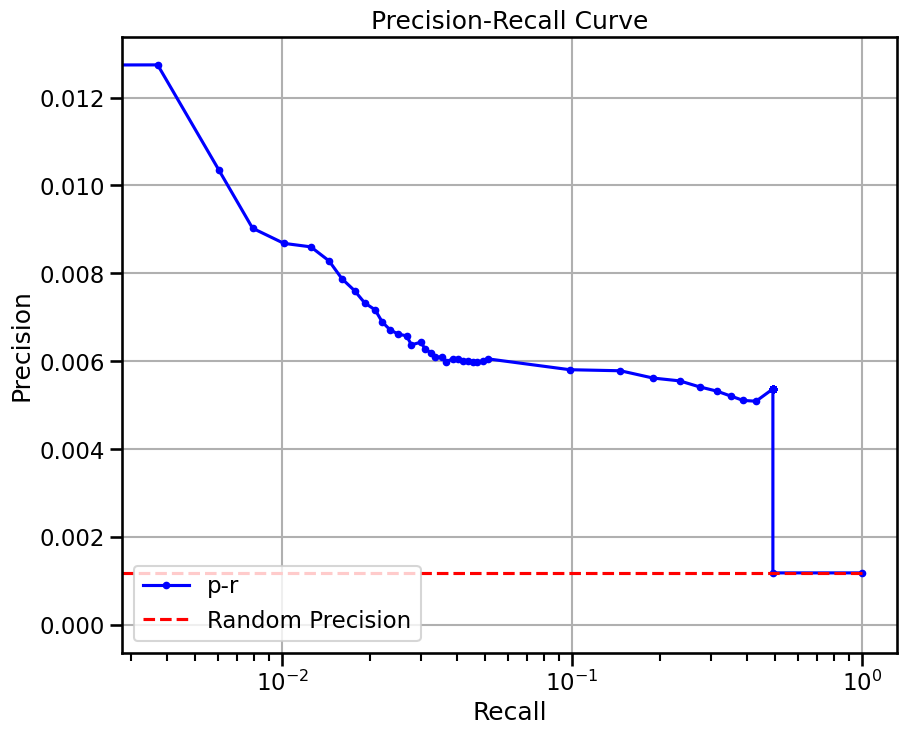

In [6]:
metrics = {}
shapes = []
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata,
                        how="random expr",
                        preprocess="softmax",
                        head_agg='mean',
                        filtration="none",
                        forward_mode="none",
                        num_genes=2200,
                        max_cells=MAXCELLS,
                        doplot=False,
                        batch_size=32,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        drop_unexpressed=True,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    print(grn.shape, celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    shapes.append(grn.shape[1])
    del grn

In [7]:
metrics

{'fibroblast_scprint_full': {'enriched_terms_Regulators': ['celltype.gmt__Naive B cells',
   'celltype.gmt__Memory B cells',
   'celltype.gmt__Plasma B cells',
   'celltype.gmt__Epithelial cells',
   'celltype.gmt__Pre-B cells',
   'celltype.gmt__Pro-B cells',
   'celltype.gmt__Smooth Muscle cells'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 44.642857142857146,
  'precision': 0.0006618214377693767,
  'recall': 1.0,
  'rand_precision': 0.0006618672671051408,
  'auprc': 0.0006551670063546767,
  'ap': 0.0006553132539019206,
  'epr': 1.1056448976975124},
 'fibroblast_scprint_mean': {'TF_enr': True,
  'enriched_terms_Targets': ['celltype.gmt__Peri-islet Schwann cells'],
  'significant_enriched_TFtargets': 36.111111111111114,
  'precision': 0.0012460602944679446,
  'recall': 1.0,
  'rand_precision': 0.0012464244266404952,
  'auprc': 0.0015492695639396418,
  'ap': 0.0015508892071508518,
  'epr': 0.4939416534868757},
 'fibroblast_scprint_tf_mean': {'enriched_terms_Central': ['0__TF

In [8]:
shapes

[5000, 5000, 5000, 3145, 3211, 5000, 4256]

In [9]:
False
False
False
True
False
False
False
True
False
True
True
False
True
False
True
True
False
False
True
False
False
False
False
False
False
True
False
False
True
True
False
False
False
True
False

False

In [10]:
import pandas as pd

In [11]:
print('new')

new


In [12]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['ap'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'AP', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

tools                name        EPR     AUPRC        AP      RAND  \
0    full          fibroblast   1.105645  0.000655  0.000655  0.000662   
1    mean          fibroblast   0.493942  0.001549  0.001551  0.001246   
2    mean          fibroblast  13.657793  0.008304  0.008759  0.001246   
3   class          fibroblast   7.766516  0.001875  0.001879  0.001246   
4   class          fibroblast  21.047204  0.009231  0.010164  0.001246   
5    full    endothelial cell   1.149500  0.000687  0.000687  0.000662   
6    mean    endothelial cell   1.289623  0.001762  0.001763  0.001591   
7    mean    endothelial cell   8.525756  0.004520  0.004901  0.001591   
8   class    endothelial cell   2.271759  0.002033  0.002034  0.001591   
9   class    endothelial cell   8.889567  0.005075  0.005497  0.001591   
10   full  myofibroblast cell   1.215291  0.000668  0.000668  0.000662   
11   mean  myofibroblast cell   2.078615  0.000927  0.000928  0.000804   
12   mean  myofibroblast cell   6.938981  0.001977  0.002231  0.000804   
13  class  myofibroblast cell   4.433726  0.000938  0.000940  0.000804   
14  class  myofibroblast cell   8.265560  0.001886  0.002160  0.000804   
15   full          glial cell   1.511494  0.000703  0.000702  0.000662   
16   mean          glial cell   2.926058  0.001079  0.001087  0.000942   
17   mean          glial cell   9.126446  0.002601  0.002938  0.000942   
18  class          glial cell   4.894722  0.001160  0.001165  0.000942   
19  class          glial cell   9.880108  0.003125  0.003475  0.000942   
20   full            pericyte   1.522469  0.000684  0.000684  0.000662   
21   mean            pericyte   1.354655  0.001366  0.001370  0.001157   
22   mean            pericyte   9.350292  0.004503  0.004959  0.001157   
23  class            pericyte   3.936745  0.001441  0.001455  0.001157   
24  class            pericyte  10.606391  0.004541  0.005106  0.001157   
25   full          lymphocyte   1.138535  0.000667  0.000668  0.000662   
26   mean          lymphocyte   1.351268  0.001308  0.001309  0.001193   
27   mean          lymphocyte   7.948570  0.003468  0.003832  0.001193   
28  class          lymphocyte   2.030178  0.001487  0.001488  0.001193   
29  class          lymphocyte   9.703510  0.003833  0.004230  0.001193   
30   full        stromal cell   1.143051  0.000798  0.000798  0.000748   
31   mean        stromal cell   1.414740  0.001323  0.001325  0.001183   
32   mean        stromal cell   7.331571  0.003589  0.004029  0.001183   
33  class        stromal cell   2.283980  0.001274  0.001277  0.001183   
34  class        stromal cell   7.818510  0.003375  0.003833  0.001183   

      TF_targ  TF_enr  TF_only  
0   44.642857    True    False  
1   36.111111    True    False  
2   11.111111    True     True  
3   30.555556    True    False  
4    5.555556    True     True  
5   58.928571    True    False  
6   28.571429   False    False  
7   14.285714    True     True  
8   30.357143   False    False  
9   14.285714    True     True  
10  51.785714    True    False  
11  17.857143    True    False  
12  10.714286    True     True  
13  17.857143    True    False  
14   3.571429    True     True  
15  60.714286    True    False  
16  12.500000    True    False  
17   0.000000    True     True  
18   6.250000   False    False  
19   0.000000    True     True  
20  53.571429    True    False  
21   4.761905    True    False  
22   0.000000    True     True  
23   9.523810   False    False  
24   4.761905    True     True  
25  55.357143    True    False  
26  25.000000    True    False  
27  17.500000    True     True  
28  30.000000    True    False  
29   7.500000    True     True  
30  60.185185    True    False  
31  25.641026   False    False  
32   5.128205    True     True  
33  25.641026    True    False  
34  12.820513    True     True